In [7]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np

In [8]:
def get_dt():
    dt_stamp = dt.datetime.now()
    dt_stamp = dt_stamp.strftime("%Y_%m_%d_%H%M%S")
    dt_stamp = str(dt_stamp).split(".")[0]
    return dt_stamp

In [9]:
csv_data = pd.read_csv('C:/C_Drive/Bootcamp/Homework/Project-One-1/U.S._Chronic_Disease_Indicators.csv')


In [12]:
csv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2366 entries, 0 to 2365
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     2366 non-null   int64  
 1   LocationAbbr             2366 non-null   object 
 2   LocationDesc             2366 non-null   object 
 3   Topic                    2366 non-null   object 
 4   Question                 2366 non-null   object 
 5   DataValueType            2366 non-null   object 
 6   DataValue                2366 non-null   int64  
 7   StratificationCategory1  2366 non-null   object 
 8   Stratification1          2366 non-null   object 
 9   unemployed_rate          2366 non-null   float64
dtypes: float64(1), int64(2), object(7)
memory usage: 185.0+ KB


In [11]:
csv_data.groupby('Topic', as_index=False)['Topic'].first()

Topic
0  Breast Cancer

In [13]:
csv_data.groupby('Question', as_index=False)['Question'].first()

Question
0  Incidence
1  Mortality

In [16]:
csv_data.groupby('StratificationCategory1', as_index=False)['StratificationCategory1'].first()

StratificationCategory1
0                  Gender
1                 Overall
2          Race/Ethnicity

In [17]:
csv_data.groupby('Stratification1', as_index=False)['Stratification1'].first()

Stratification1
0  Black, non-Hispanic
1               Female
2             Hispanic
3              Overall
4  White, non-Hispanic

In [24]:
df = csv_data.loc[(csv_data['Question'] == 'Incidence')
                   & (csv_data['StratificationCategory1'] == 'Race/Ethnicity')
                    & (csv_data['DataValueType'] == 'Average Annual Number')
                    & (csv_data['StratificationCategory1'] == 'Race/Ethnicity')
                    & ((csv_data['Stratification1'] == 'Black, non-Hispanic')
                    | (csv_data['Stratification1'] == 'Hispanic')
                    | (csv_data['Stratification1'] == 'White, non-Hispanic'))]
# df1 = df.groupby(['YearStart','YearEnd', 'LocationAbbr', 'LocationDesc', 'DataSource', 'Topic',
#                    'Question', 'StratificationCategory1', 'Stratification1', 'DataValueUnit', 'DataValueType'], as_index=False)['DataValue'].first()
df1 = df.groupby(['Question', 'Year', 'LocationDesc', 'Stratification1'], as_index=False)['DataValue'].first()
df2 = df1.sort_values(by= ['Stratification1', 'LocationDesc', 'Year'], ascending=[True, True, True])
df2.head()

Question  Year LocationDesc      Stratification1  DataValue
0    Incidence  2015      Alabama  Black, non-Hispanic        886
141  Incidence  2016      Alabama  Black, non-Hispanic        913
283  Incidence  2017      Alabama  Black, non-Hispanic        937
424  Incidence  2018      Alabama  Black, non-Hispanic        951
566  Incidence  2019      Alabama  Black, non-Hispanic        971

In [25]:
df2.rename(columns={'LocationDesc': 'State', 'Stratification1': 'Race', 'DataValue': 'Insidents'}, inplace=True)

In [27]:
df2.head()

Question  Year    State                 Race  Insidents
0    Incidence  2015  Alabama  Black, non-Hispanic        886
141  Incidence  2016  Alabama  Black, non-Hispanic        913
283  Incidence  2017  Alabama  Black, non-Hispanic        937
424  Incidence  2018  Alabama  Black, non-Hispanic        951
566  Incidence  2019  Alabama  Black, non-Hispanic        971

In [29]:
df3 = df2.groupby('Race', as_index=False)['Race'].first()
df3.head()


Race
0  Black, non-Hispanic
1             Hispanic
2  White, non-Hispanic

In [30]:
df_state = df2.groupby('State', as_index=False)['State'].first()
df_state.head()

State
0     Alabama
1      Alaska
2     Arizona
3    Arkansas
4  California

In [68]:
df2_gb = df2.groupby(['Year', 'Race'], as_index=False)['Insidents'].sum()
df2_gb.sort_values(['Year', 'Insidents'], ascending=[True, False])

Year                 Race  Insidents
2   2015  White, non-Hispanic     344221
0   2015  Black, non-Hispanic      52126
1   2015             Hispanic      36816
5   2016  White, non-Hispanic     348881
3   2016  Black, non-Hispanic      53410
4   2016             Hispanic      38604
8   2017  White, non-Hispanic     353637
6   2017  Black, non-Hispanic      54665
7   2017             Hispanic      40539
11  2018  White, non-Hispanic     357794
9   2018  Black, non-Hispanic      55568
10  2018             Hispanic      42243
14  2019  White, non-Hispanic     361958
12  2019  Black, non-Hispanic      56638
13  2019             Hispanic      44292

<Axes: title={'center': 'Percentage Stacked Bar Graph'}, xlabel='Year'>

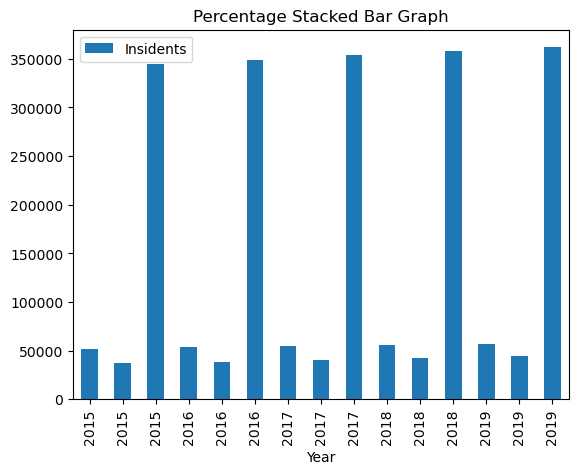

In [69]:
# plot bars in stack manner

# plot data in stack manner of bar type
df2_gb.plot(
  x = 'Year', 
  kind = 'bar', 
  stacked = True, 
  title = 'Percentage Stacked Bar Graph', 
  mark_right = True)
  
# df_total = df["Studied"] + df["Slept"] + df["Other"]
# df_rel = df[df.columns[1:]].div(df_total, 0)*100
  
# for n in df_rel:
#     for i, (cs, ab, pc) in enumerate(zip(df.iloc[:, 1:].cumsum(1)[n], 
#                                          df[n], df_rel[n])):
#         plt.text(cs - ab / 2, i, str(np.round(pc, 1)) + '%', 
#                  va = 'center', ha = 'center') 

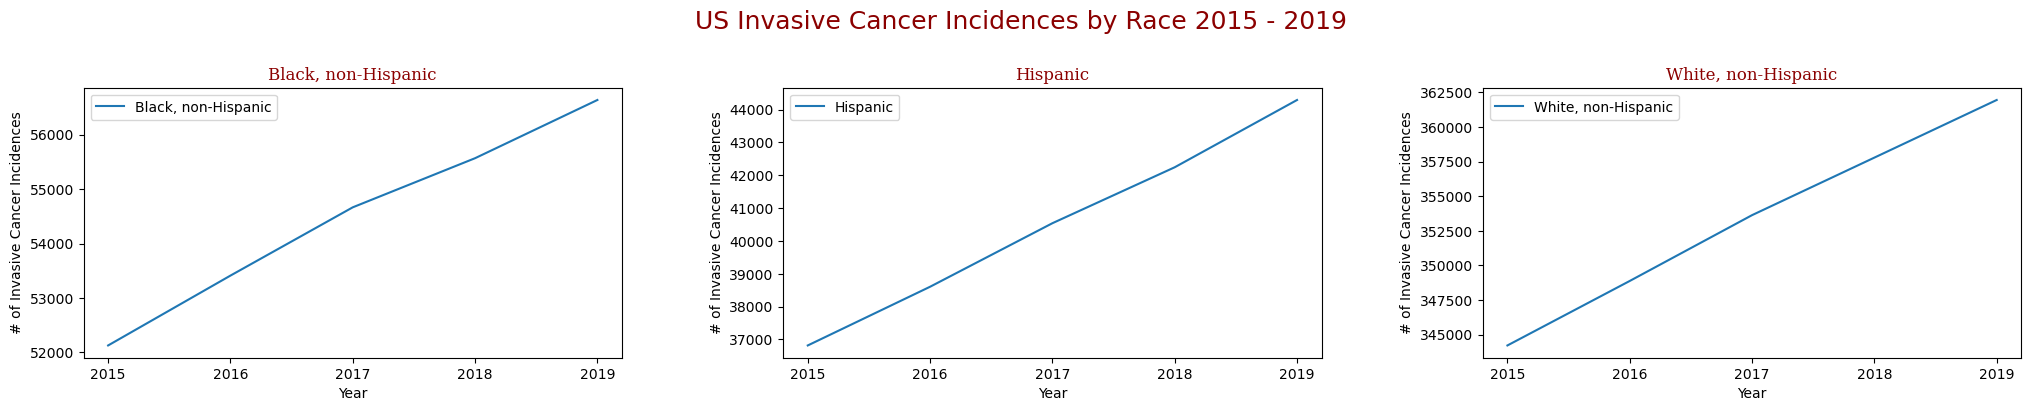

In [55]:
font = {'family': 'serif', 'color': 'darkred', 'weight': 'normal', 'size': 12}

fig = plt.figure(figsize=(25,6))
fig.subplots_adjust(wspace=.3, top=.85, bottom=.4)
fig.suptitle(f'US Invasive Cancer Incidences by Race 2015 - 2019', fontsize=18, ha='center', color='darkred')

for n, race in df3.iterrows():
    ax = fig.add_subplot(1, 3, n + 1)
    x = df2_gb.loc[(df2_gb['Race'] == race[0]), 'Year'].values.astype(str)
    y = df2_gb.loc[(df2_gb['Race'] == race[0]), 'Insidents'].values.astype(int)
    ax.plot(x, y, label=race[0])
    ax.set_xlabel('Year')
    ax.set_ylabel('# of Invasive Cancer Incidences')
    ax.legend()
    ax.set_title(f'{race[0]}', fontdict=font)
    # fig.tight_layout()

In [32]:
for n, race in df3.iterrows():
    for i, state in df_state.iterrows():
        x = df2.loc[(df2['Race'] == race[0]) & (df2['State'] == state[0]), 'Year'].values
        y = df2.loc[(df2['Race'] == race[0]) & (df2['State'] == state[0]), 'Insidents'].values.astype(int)
        print(f'x: {x}, y: {y}, race: {race[0]}, state: {state[0]}')

x: [2015 2016 2017 2018 2019], y: [886 913 937 951 971], race: Black, non-Hispanic, state: Alabama
x: [2015 2016 2017 2018 2019], y: [12 13 11 11 10], race: Black, non-Hispanic, state: Alaska
x: [2015 2016 2017 2018 2019], y: [137 140 145 146 149], race: Black, non-Hispanic, state: Arizona
x: [2015 2016 2017 2018 2019], y: [279 286 298 304 311], race: Black, non-Hispanic, state: Arkansas
x: [2015 2016 2017 2018 2019], y: [1685 1679 1696 1697 1711], race: Black, non-Hispanic, state: California
x: [2015 2016 2017 2018 2019], y: [110 117 120 118 126], race: Black, non-Hispanic, state: Colorado
x: [2015 2016 2017 2018 2019], y: [248 258 258 270 280], race: Black, non-Hispanic, state: Connecticut
x: [2015 2016 2017 2018 2019], y: [147 155 161 168 174], race: Black, non-Hispanic, state: Delaware
x: [2015 2016 2017 2018 2019], y: [296 286 293 296 290], race: Black, non-Hispanic, state: District of Columbia
x: [2015 2016 2017 2018 2019], y: [1742 1813 1875 1932 1982], race: Black, non-Hispanic

C:\Users\inlik\AppData\Local\Temp\ipykernel_1108\3194059324.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(25,6))


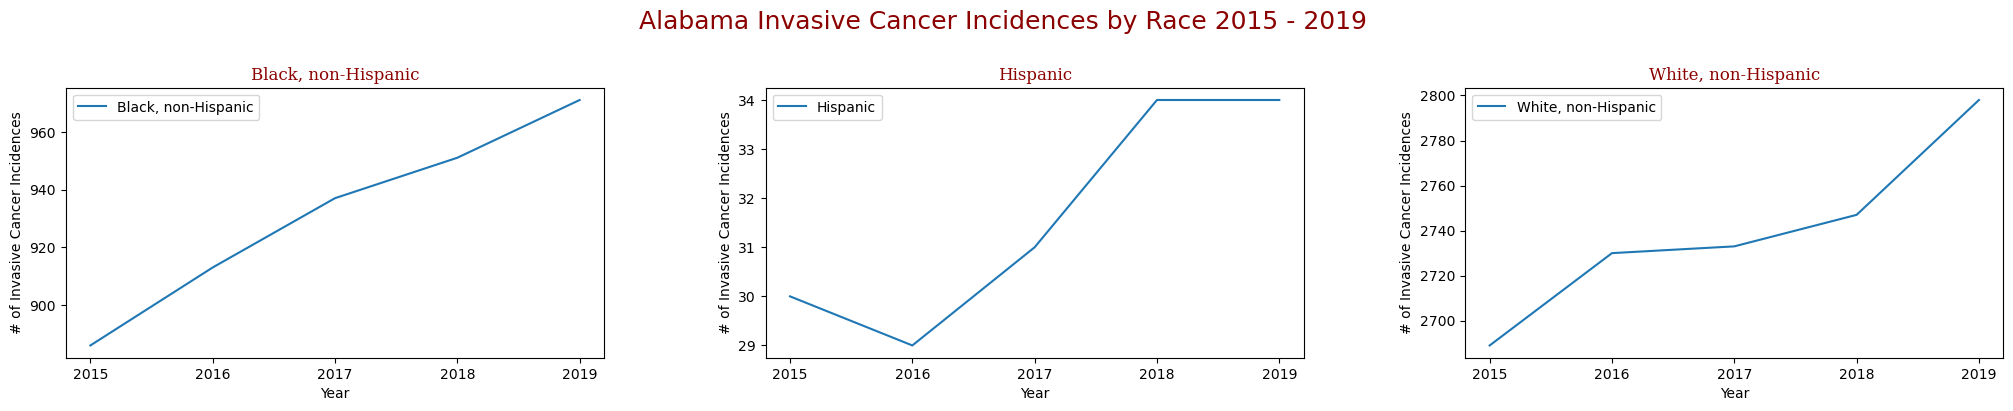

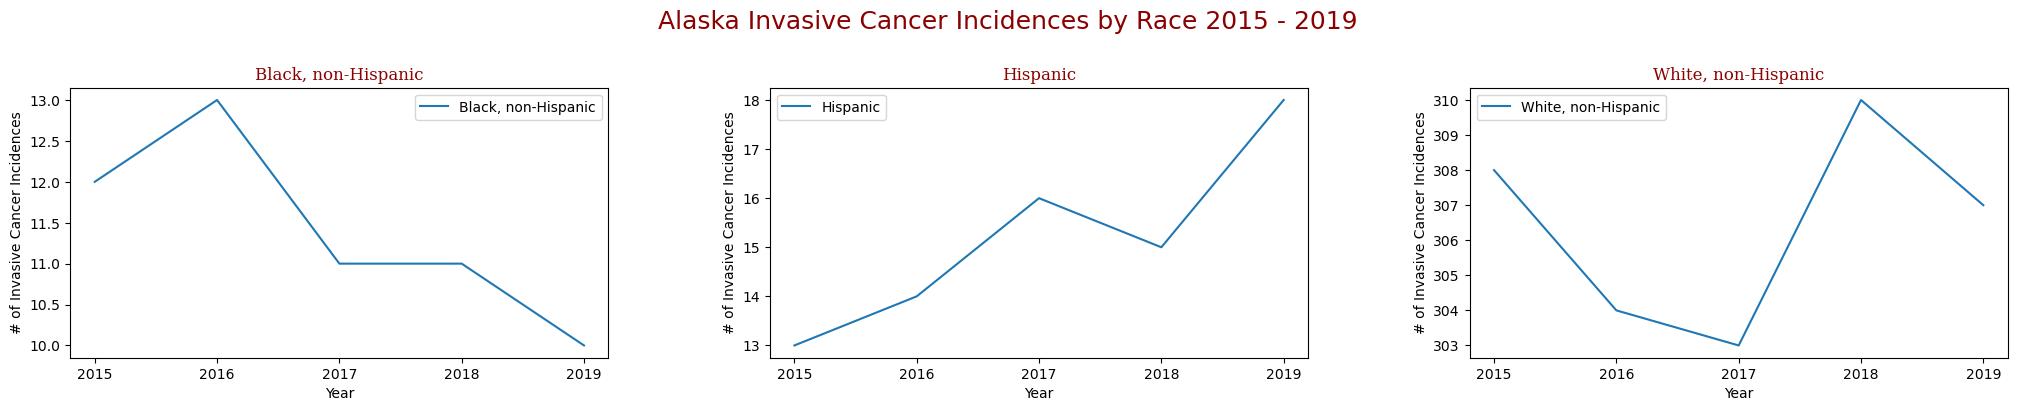

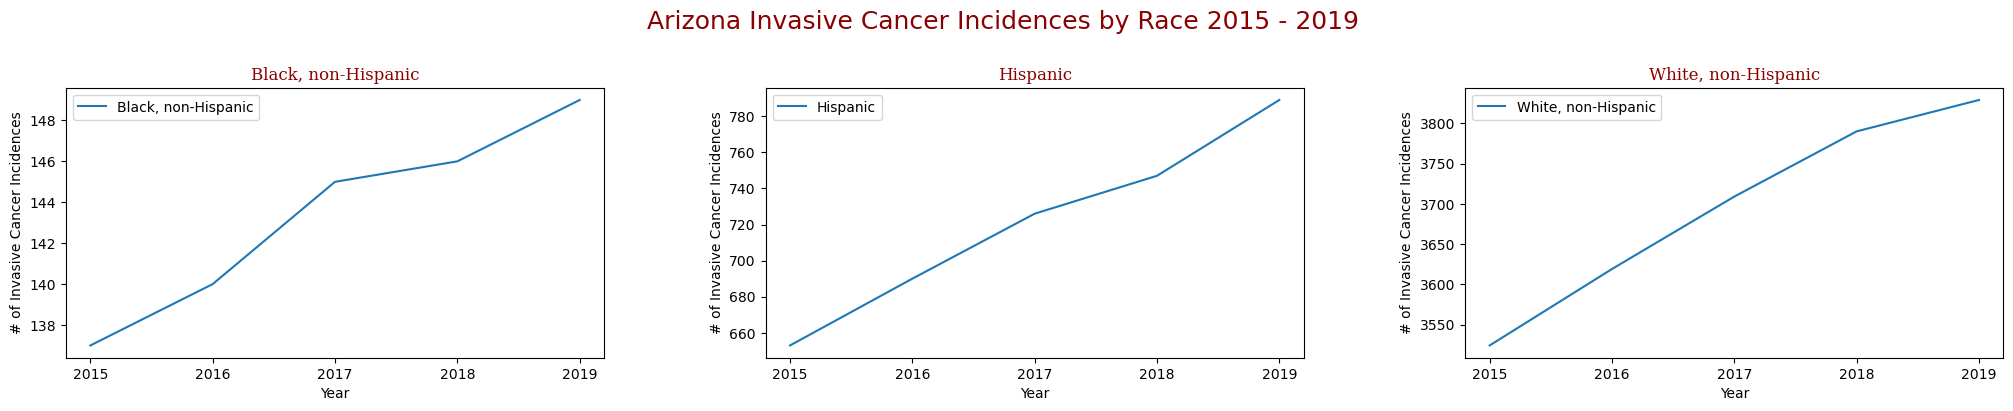

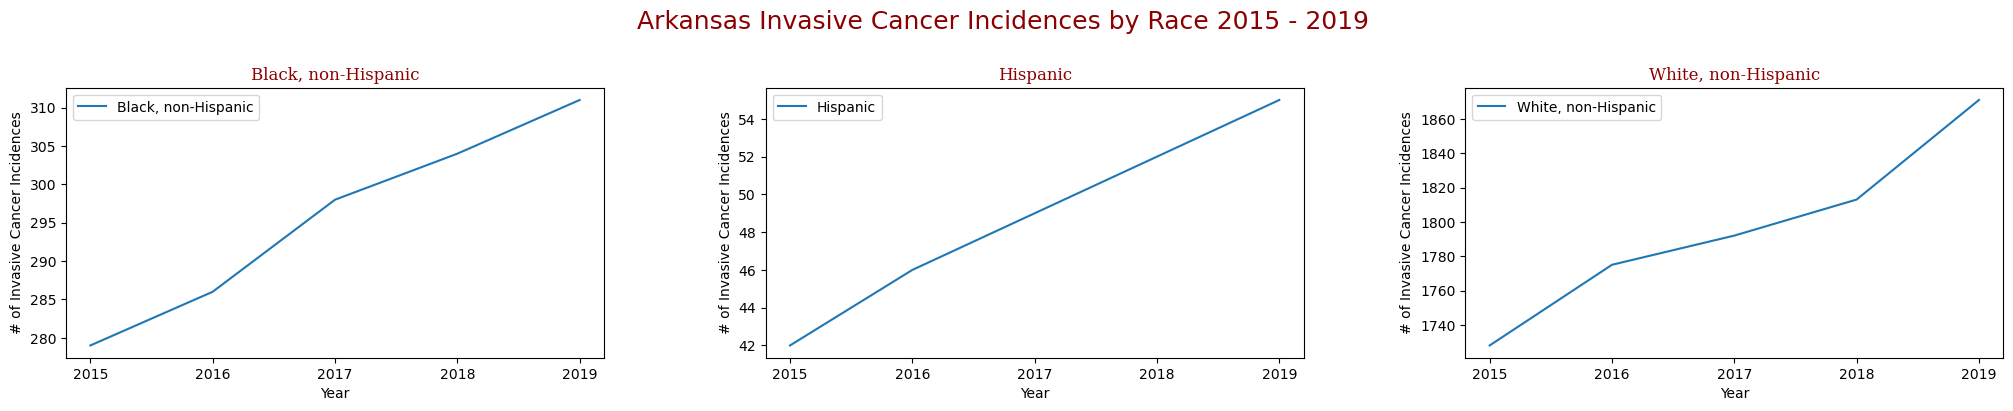

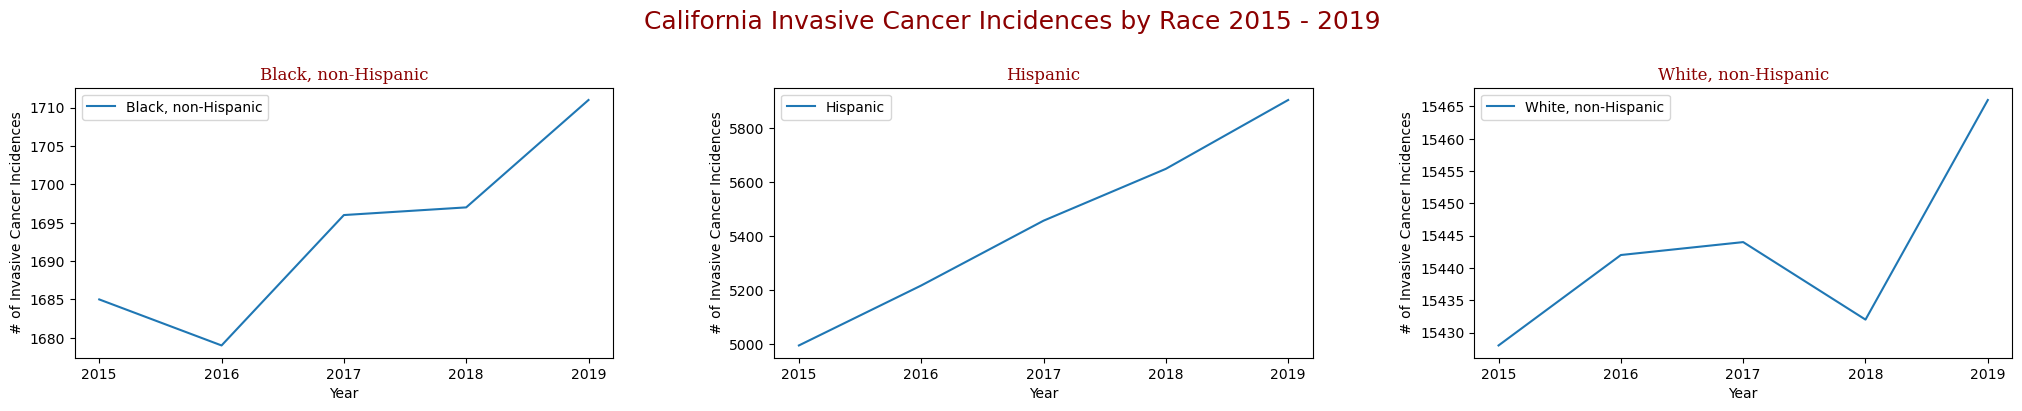

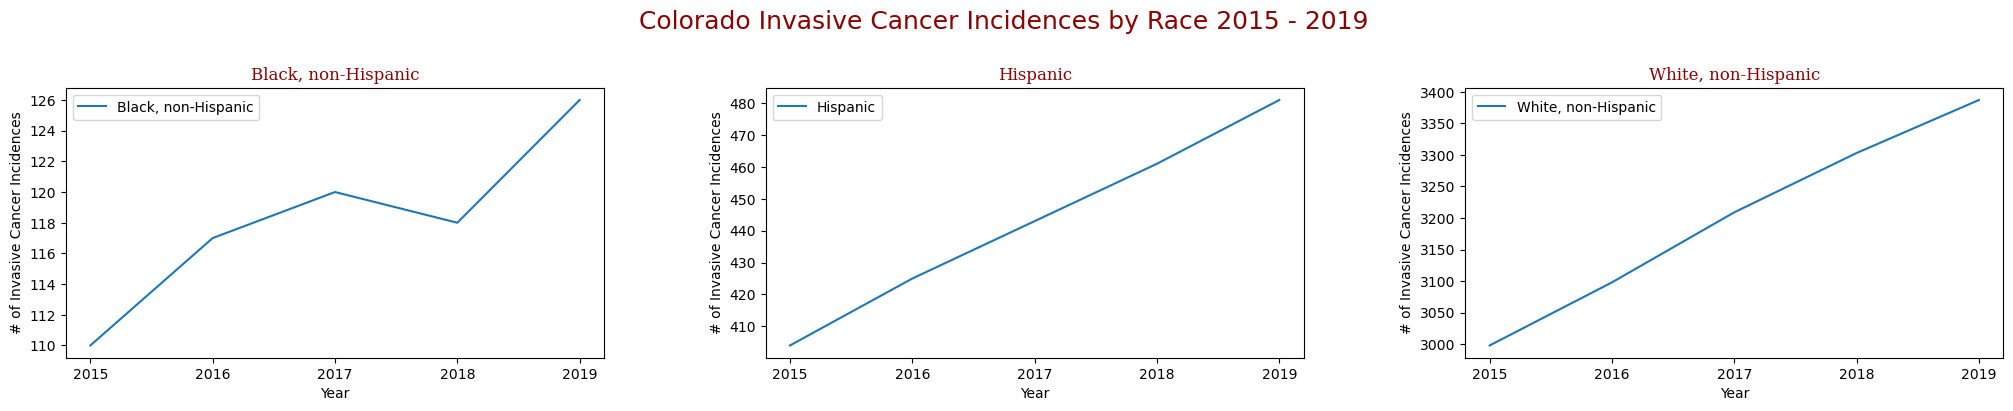

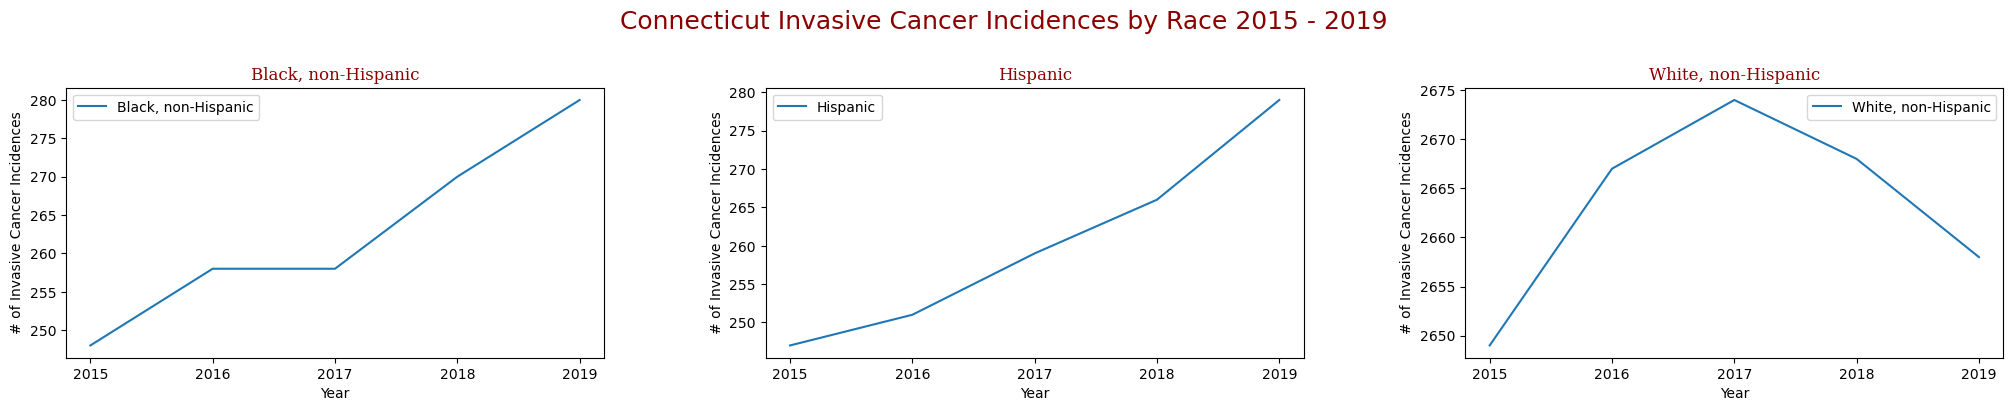

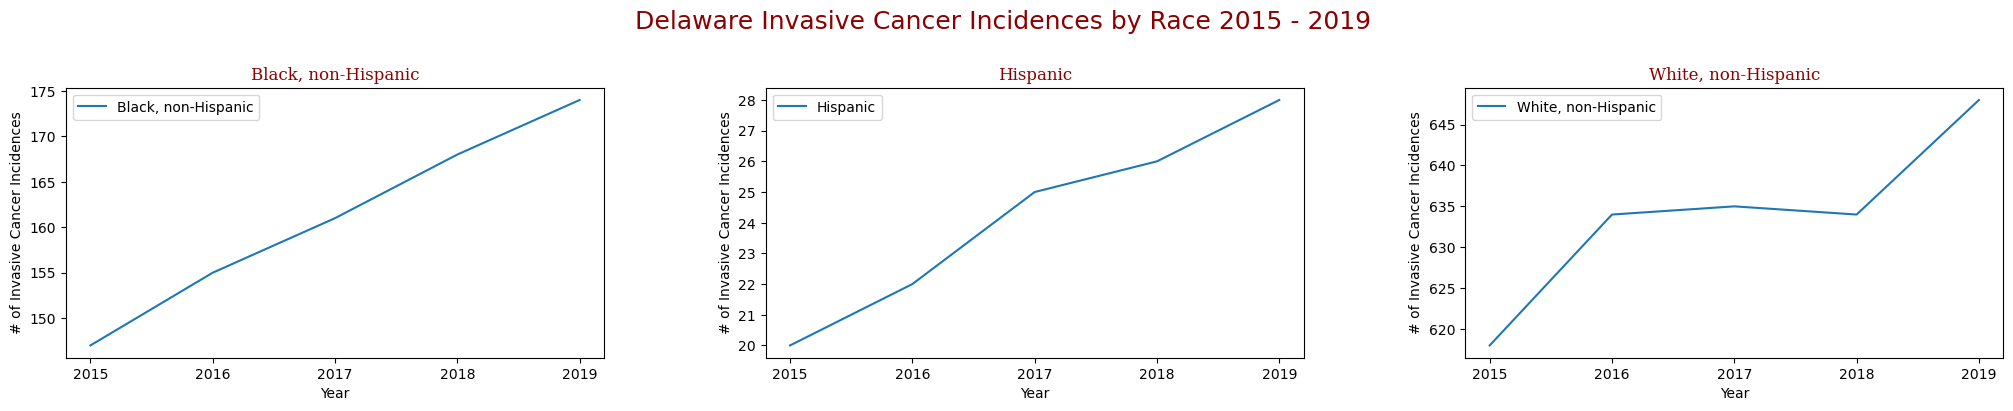

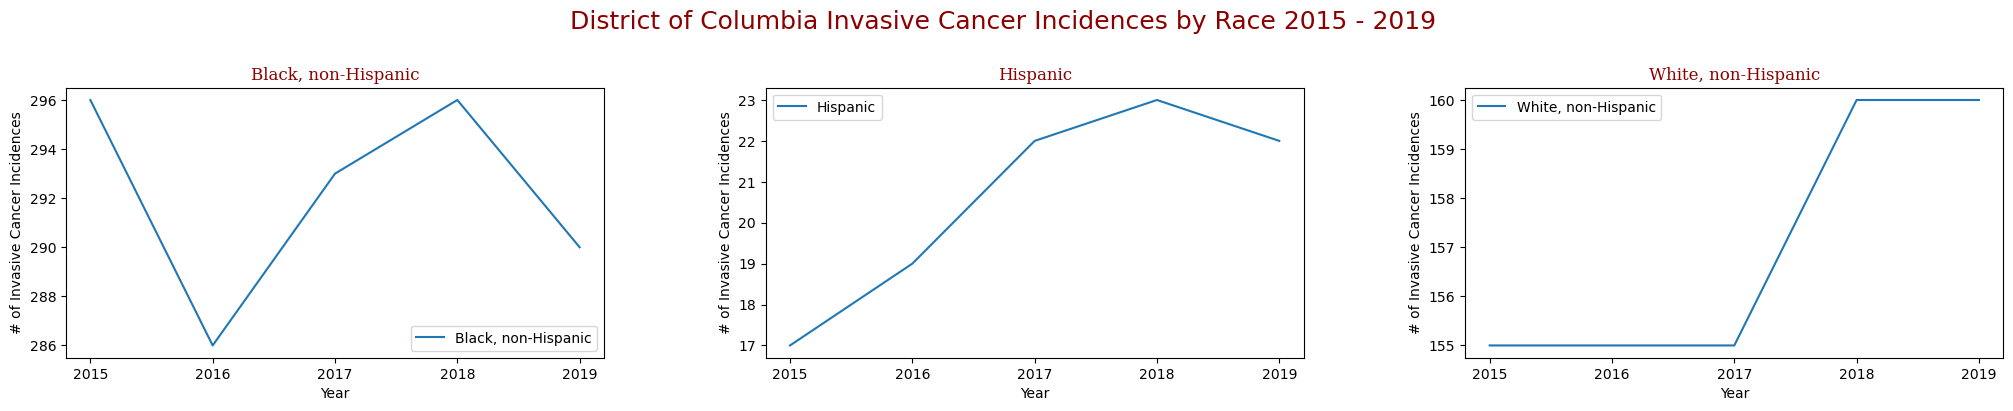

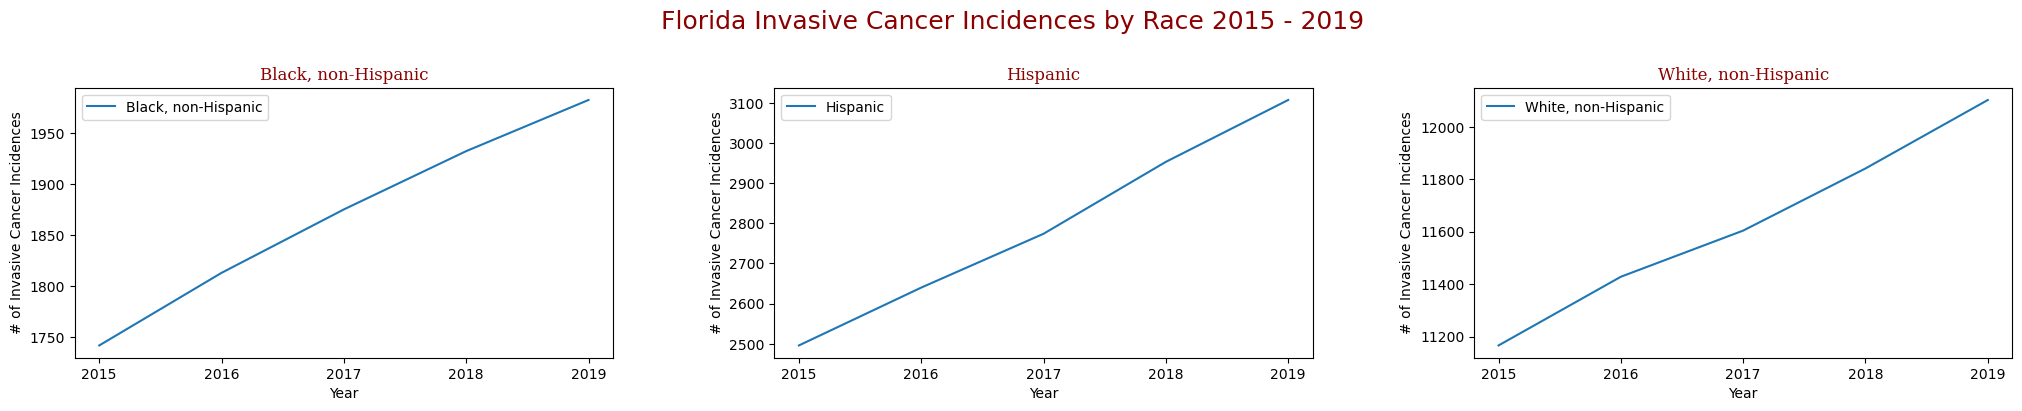

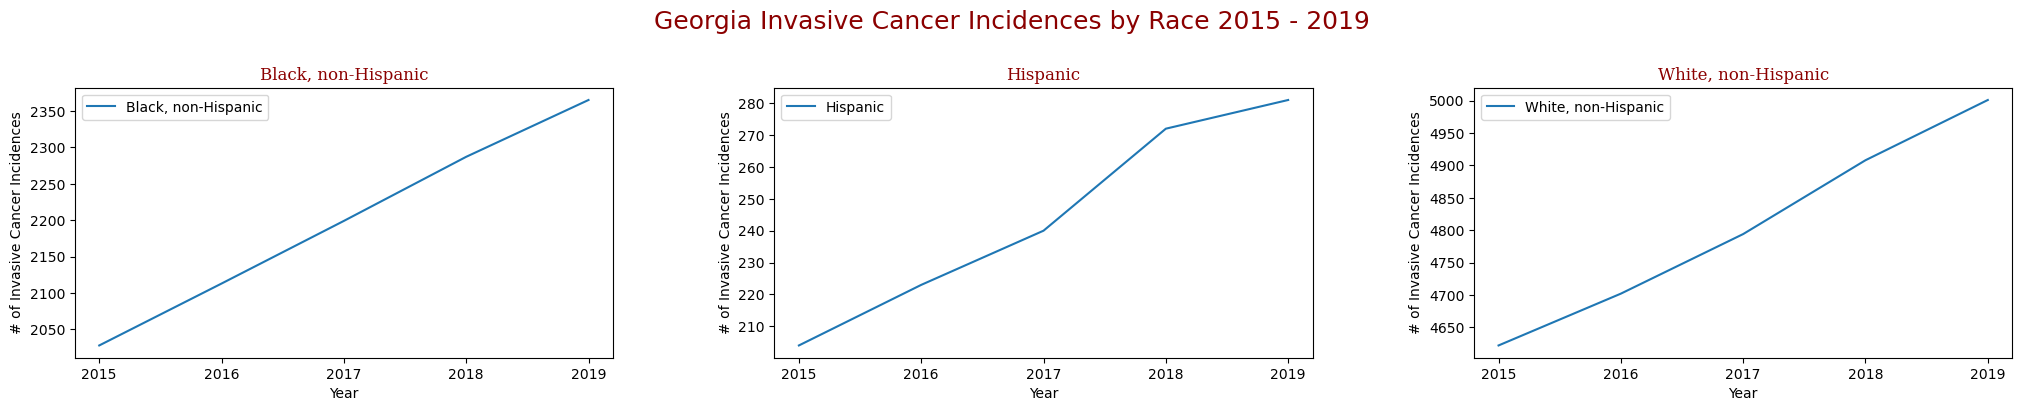

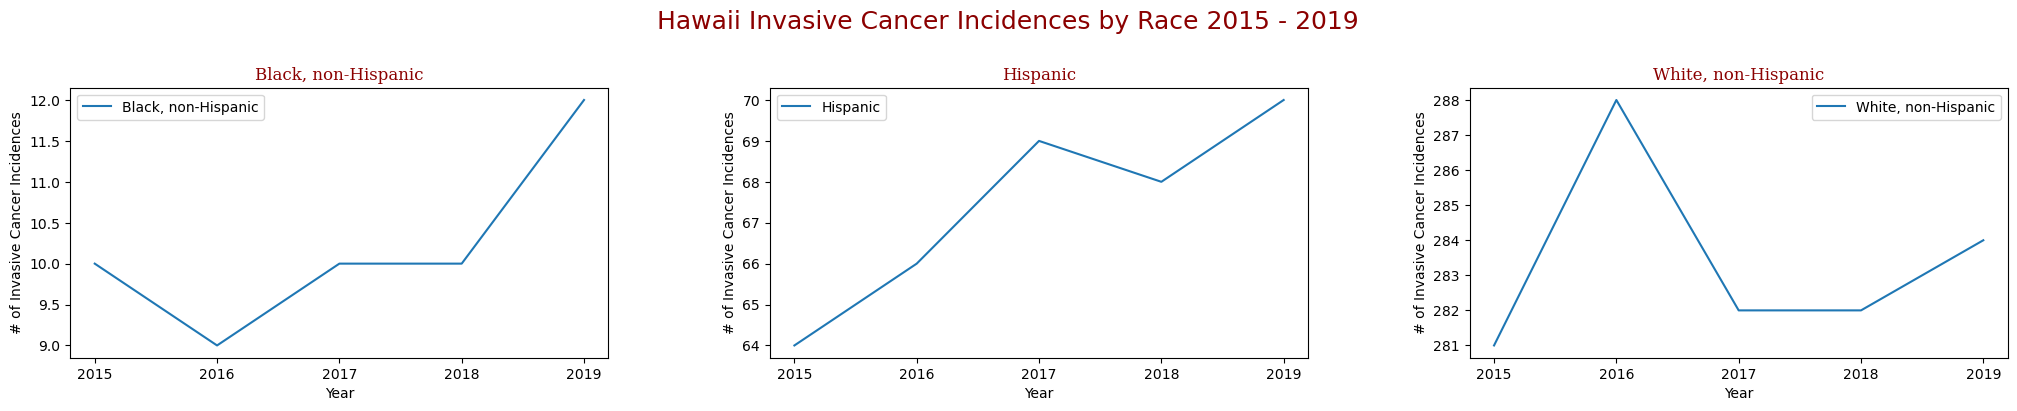

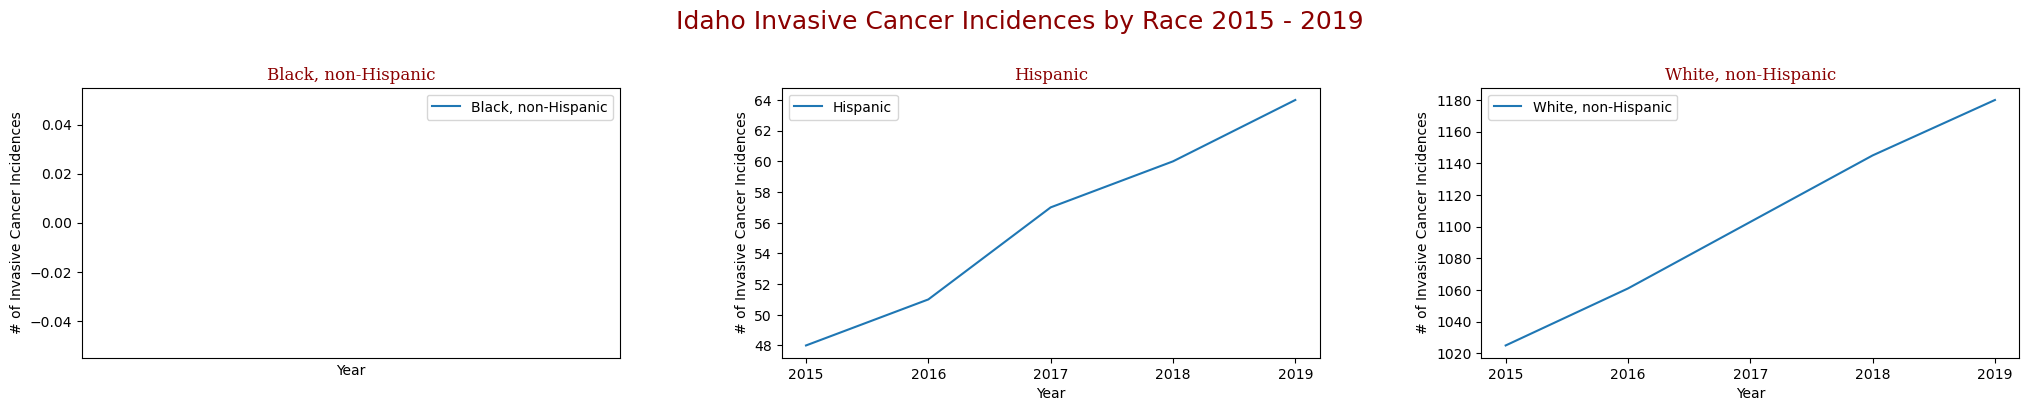

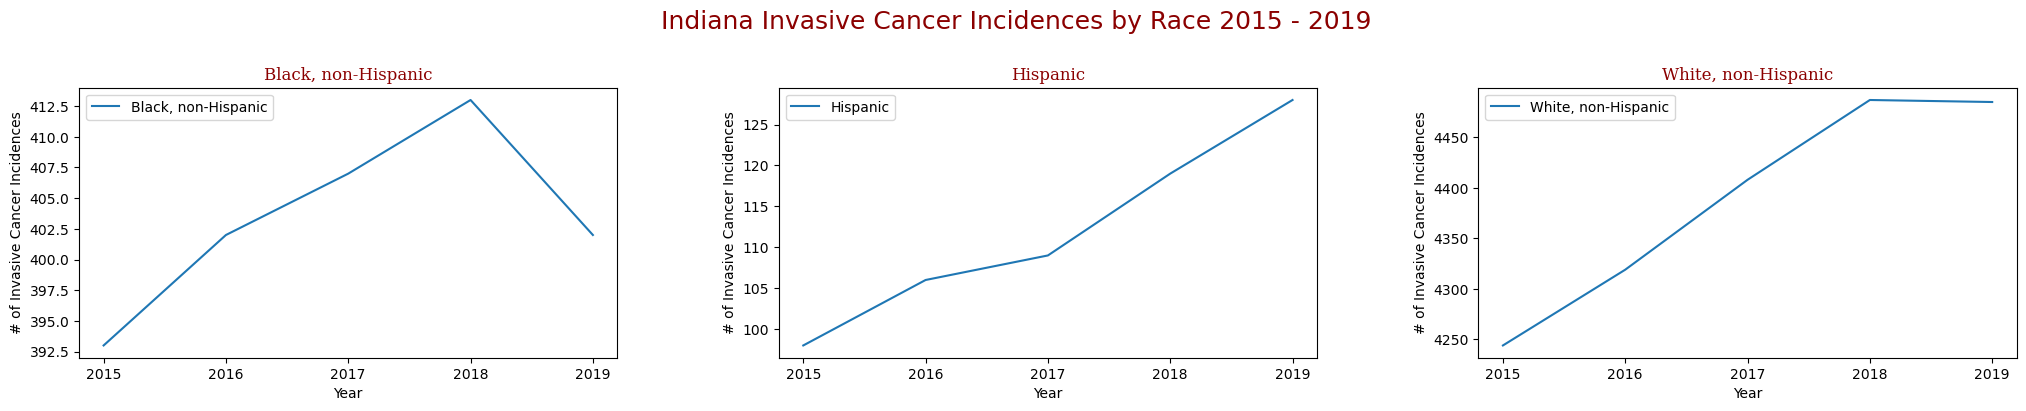

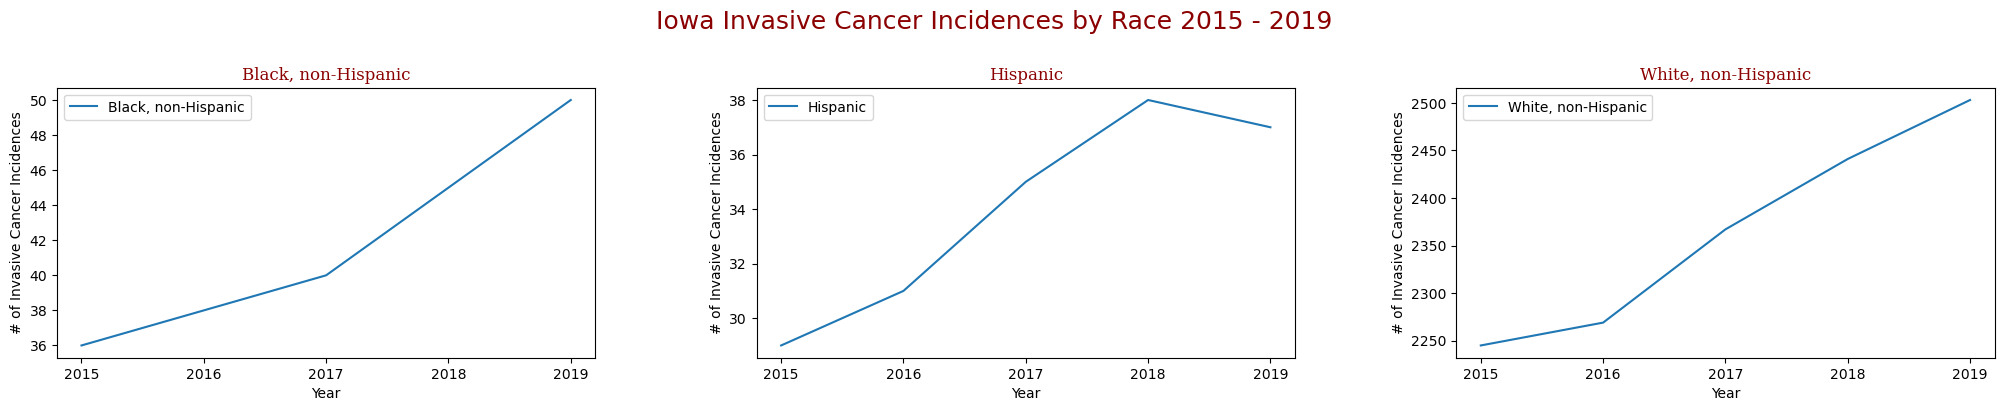

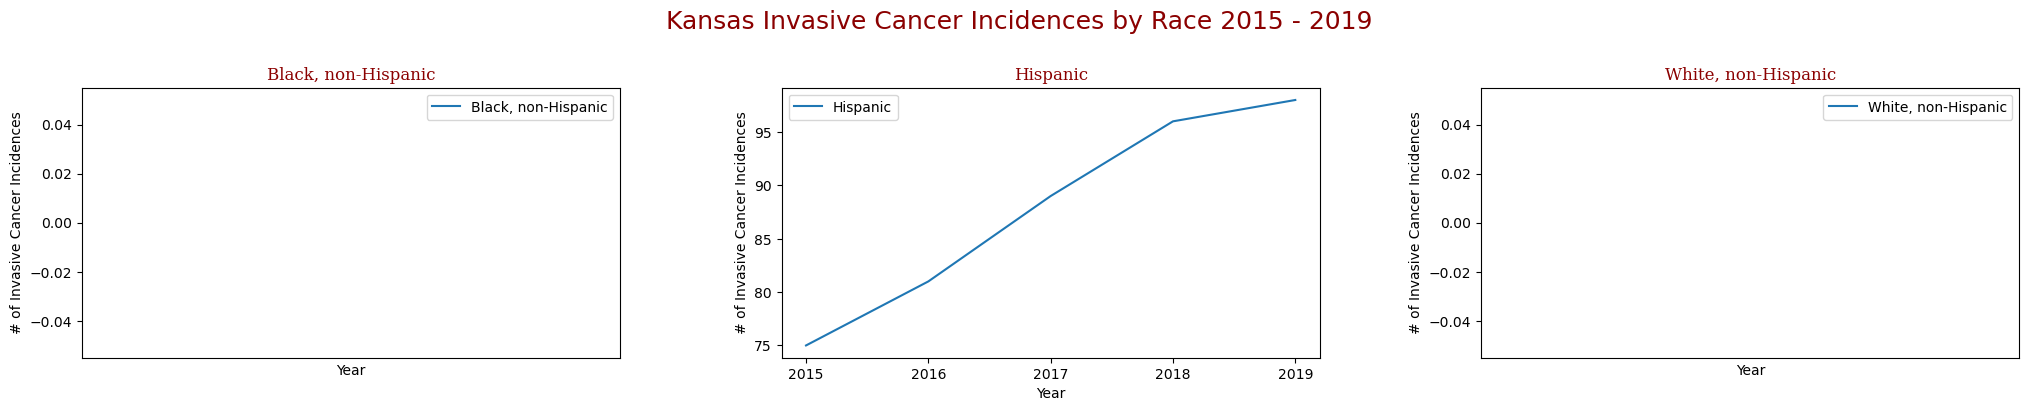

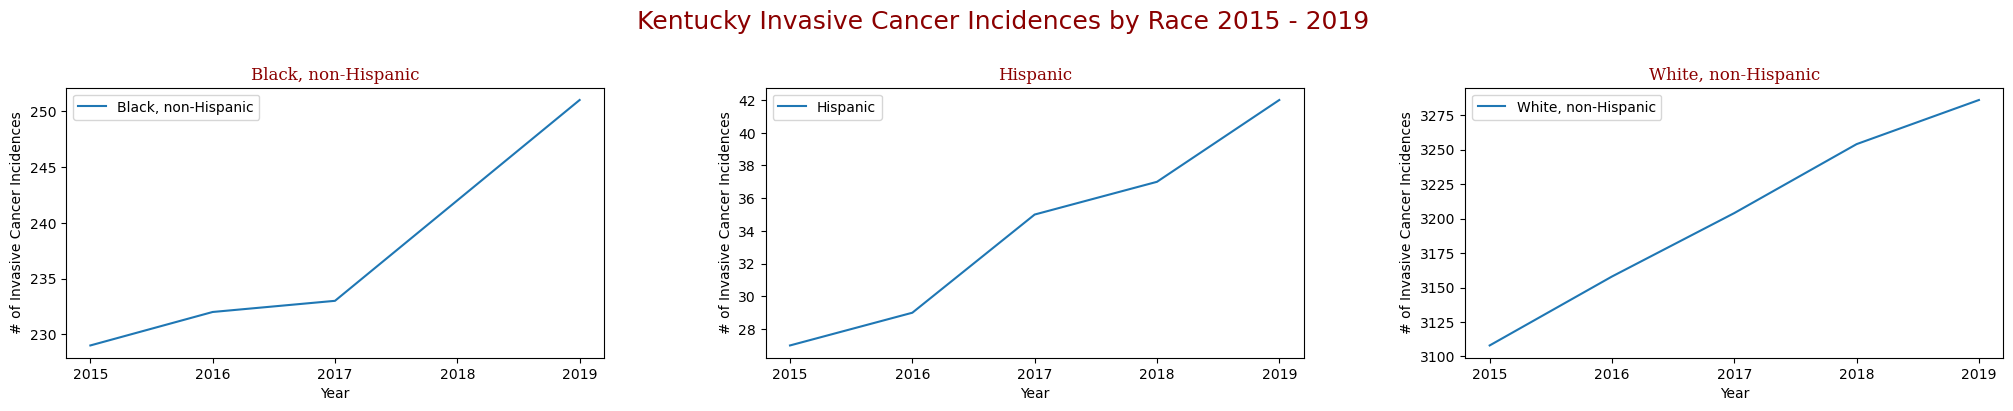

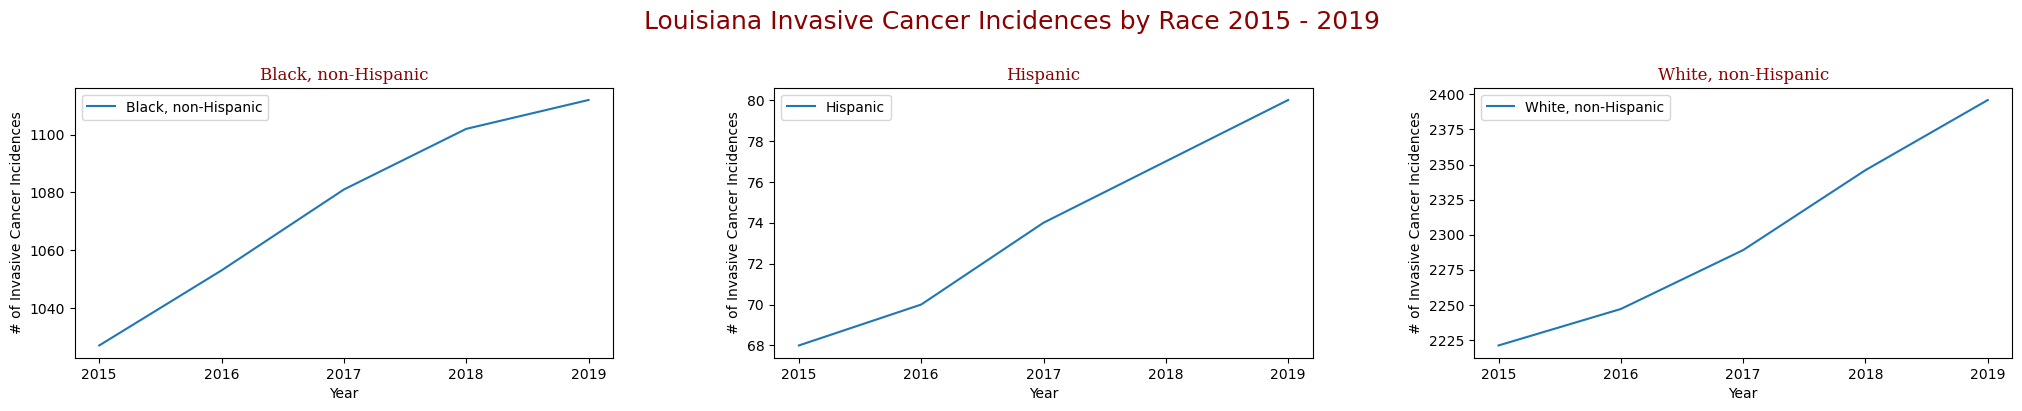

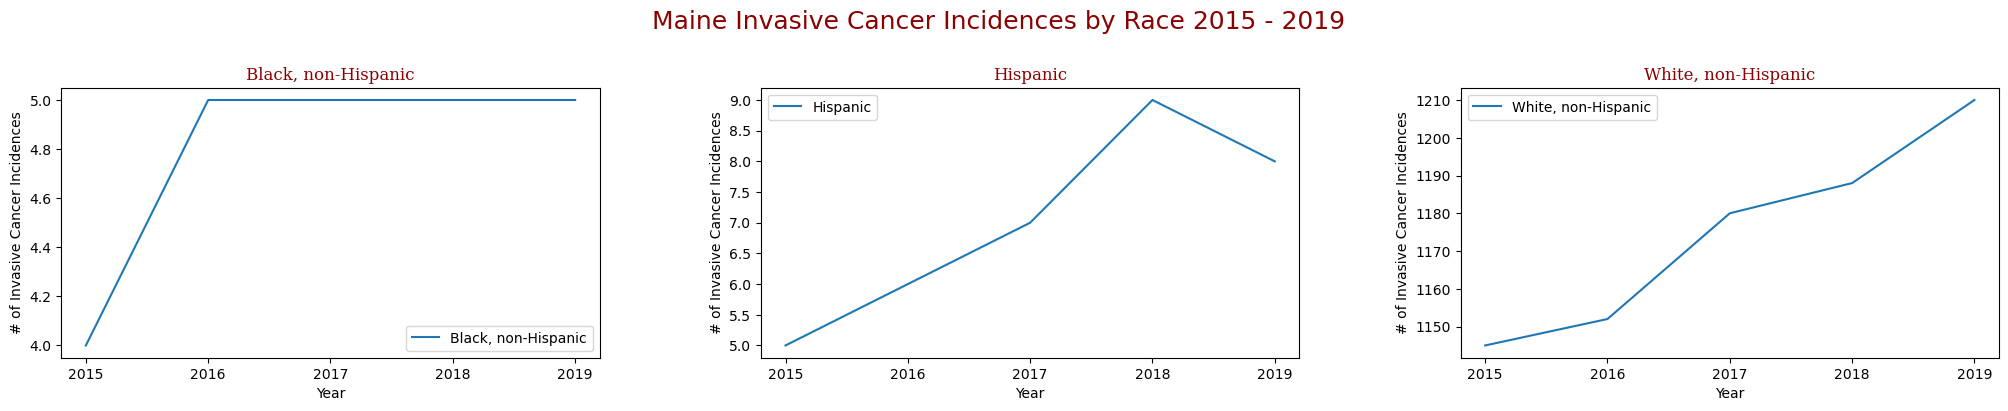

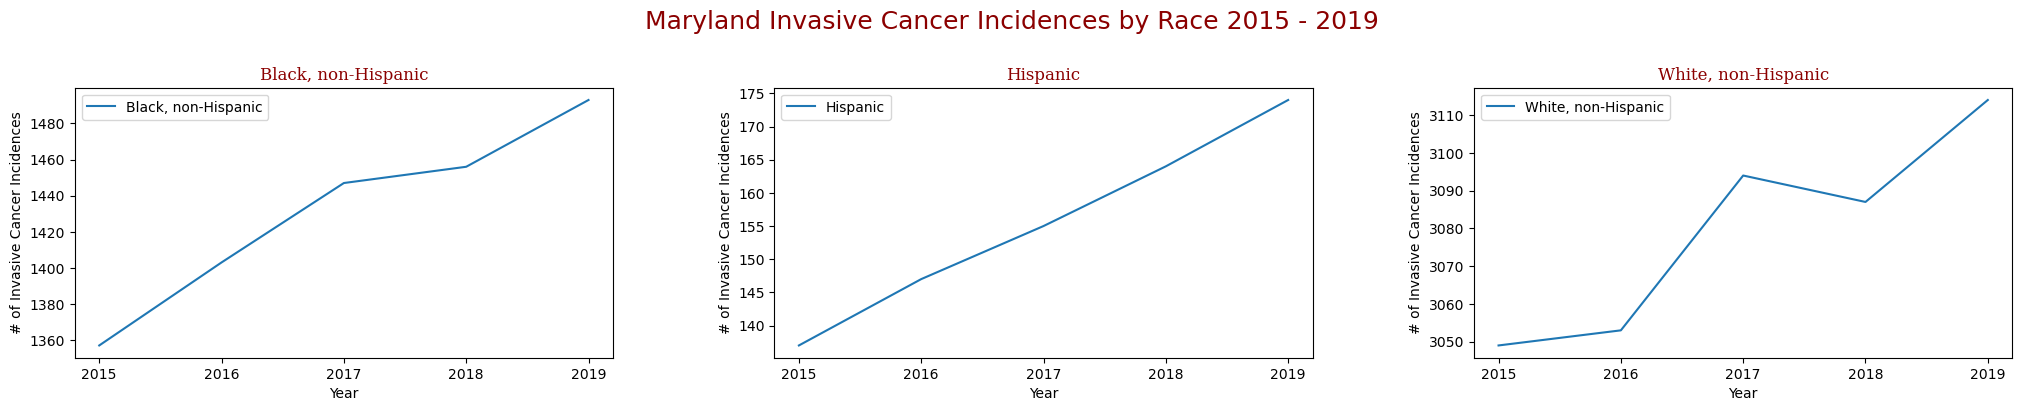

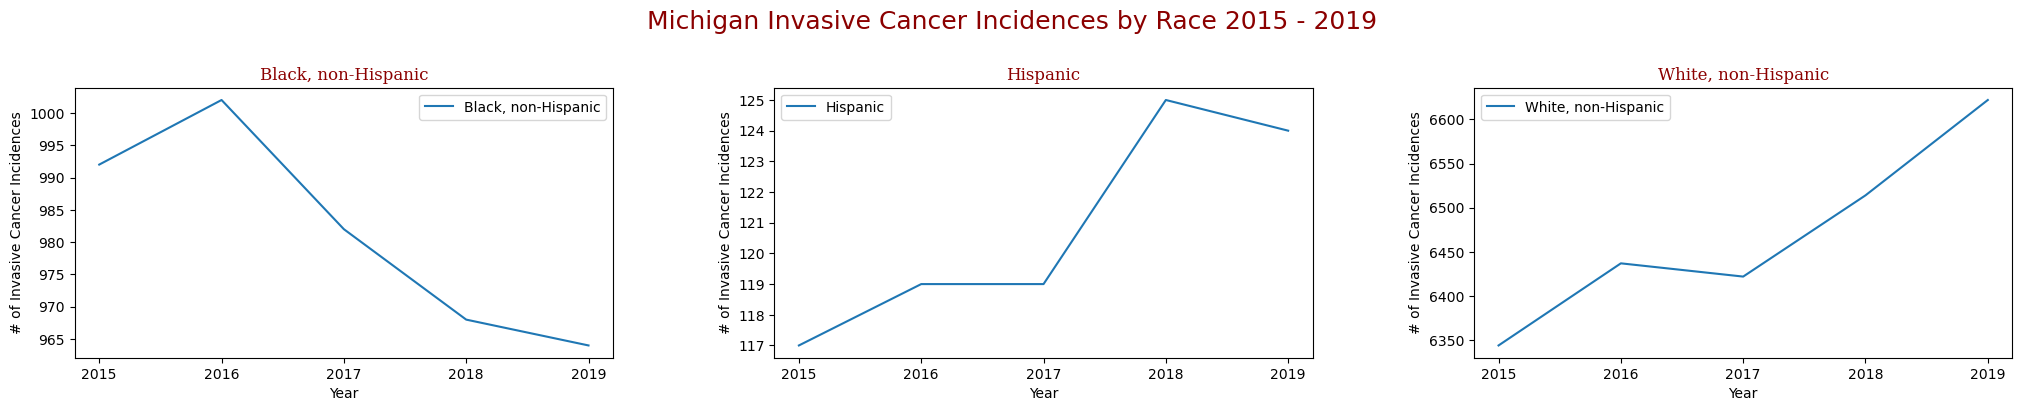

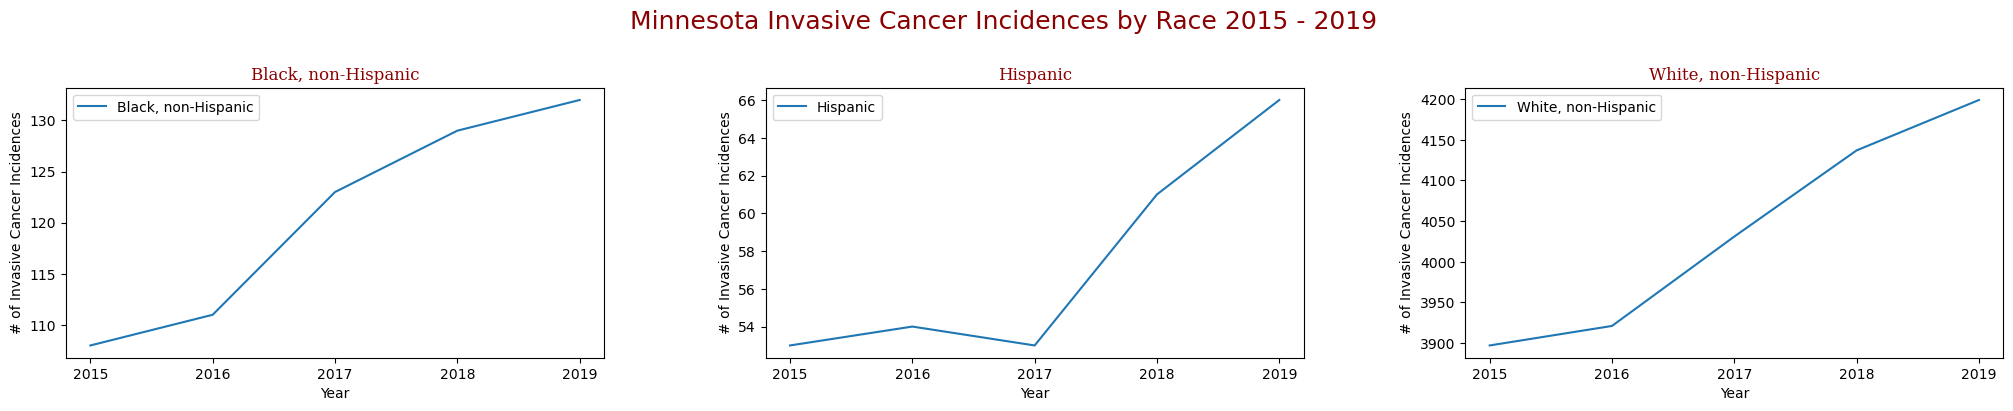

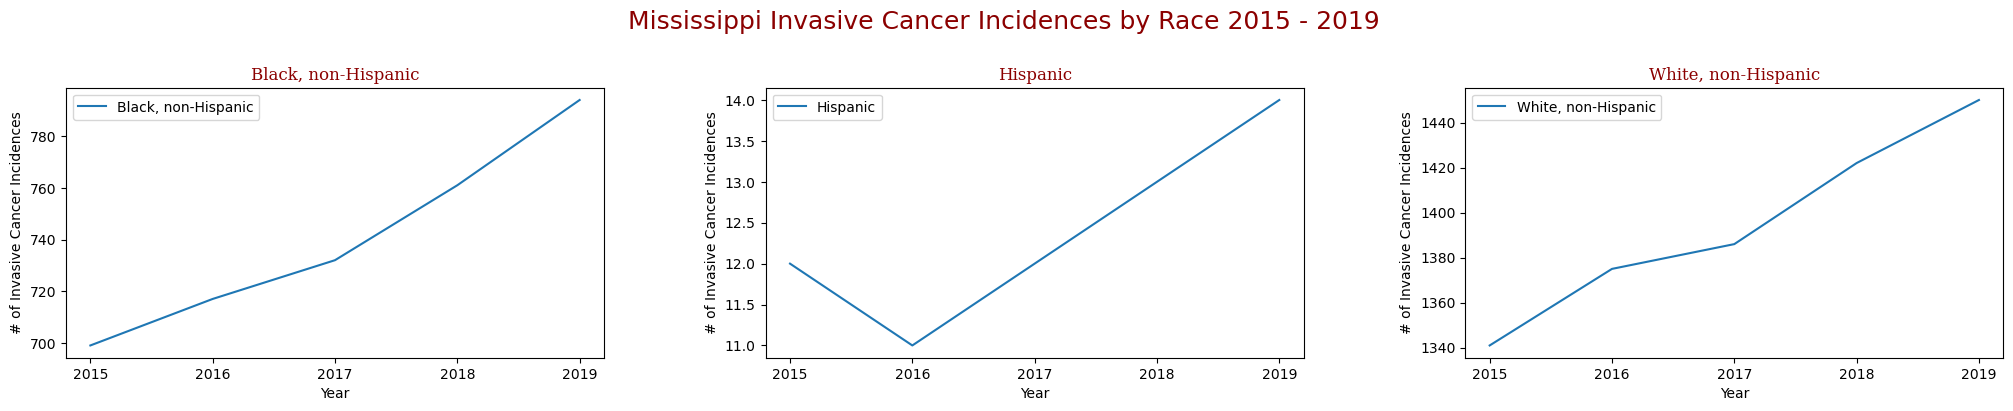

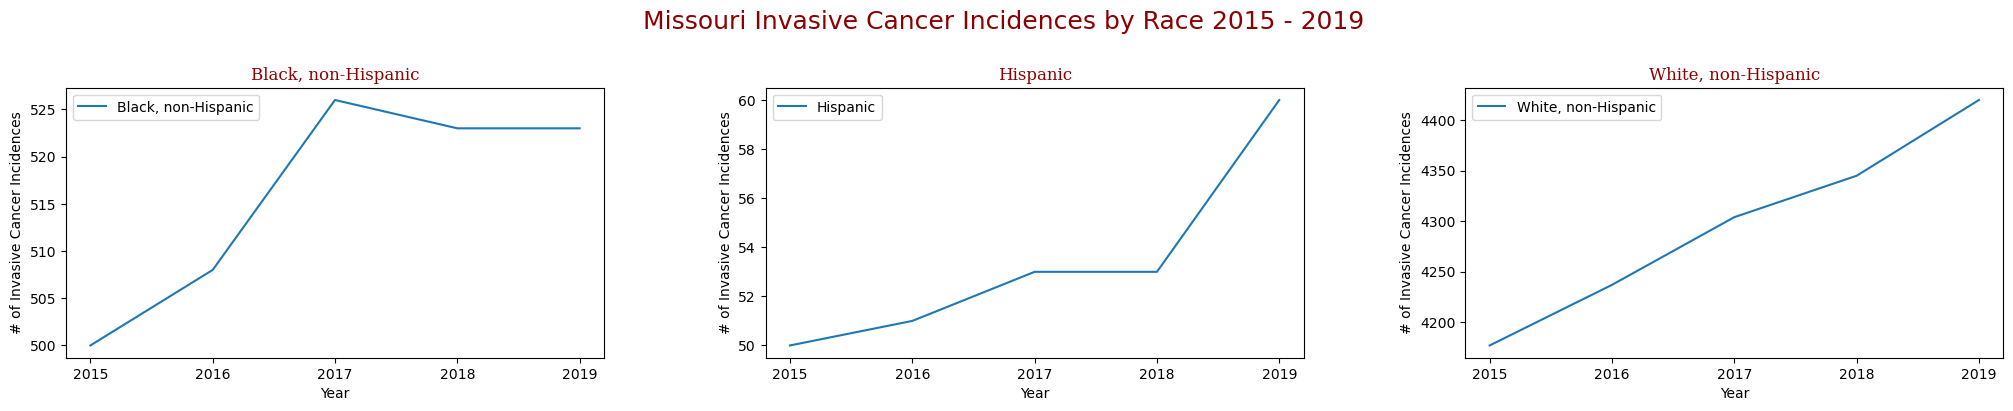

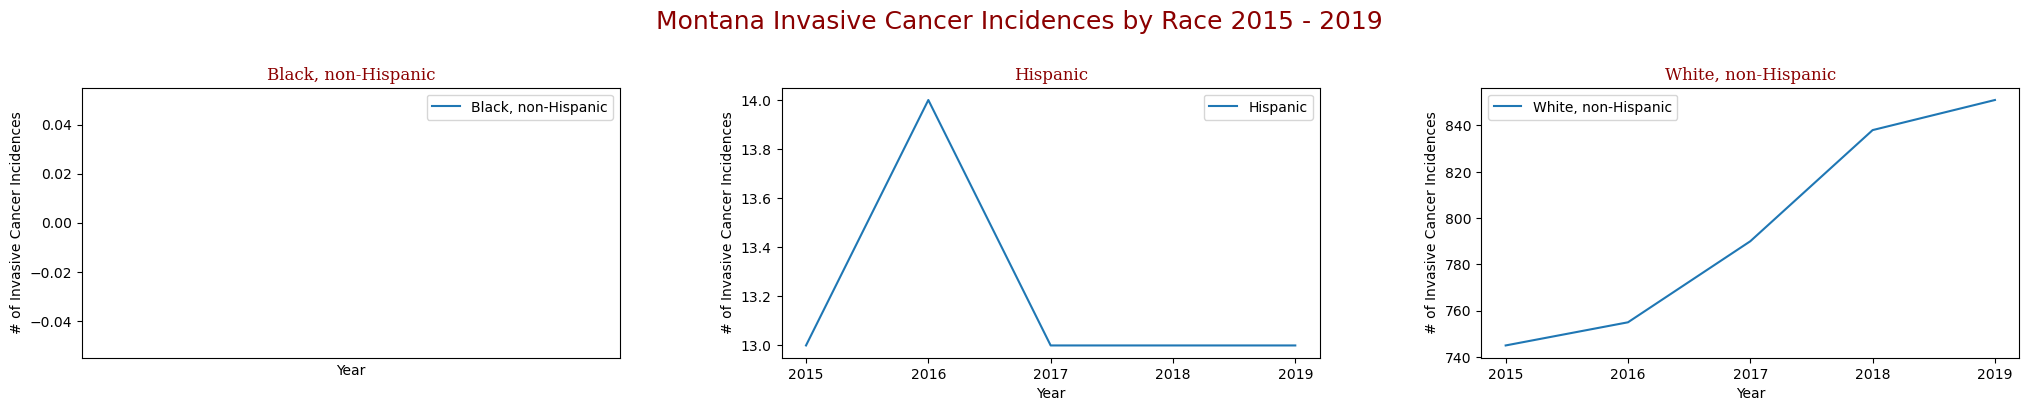

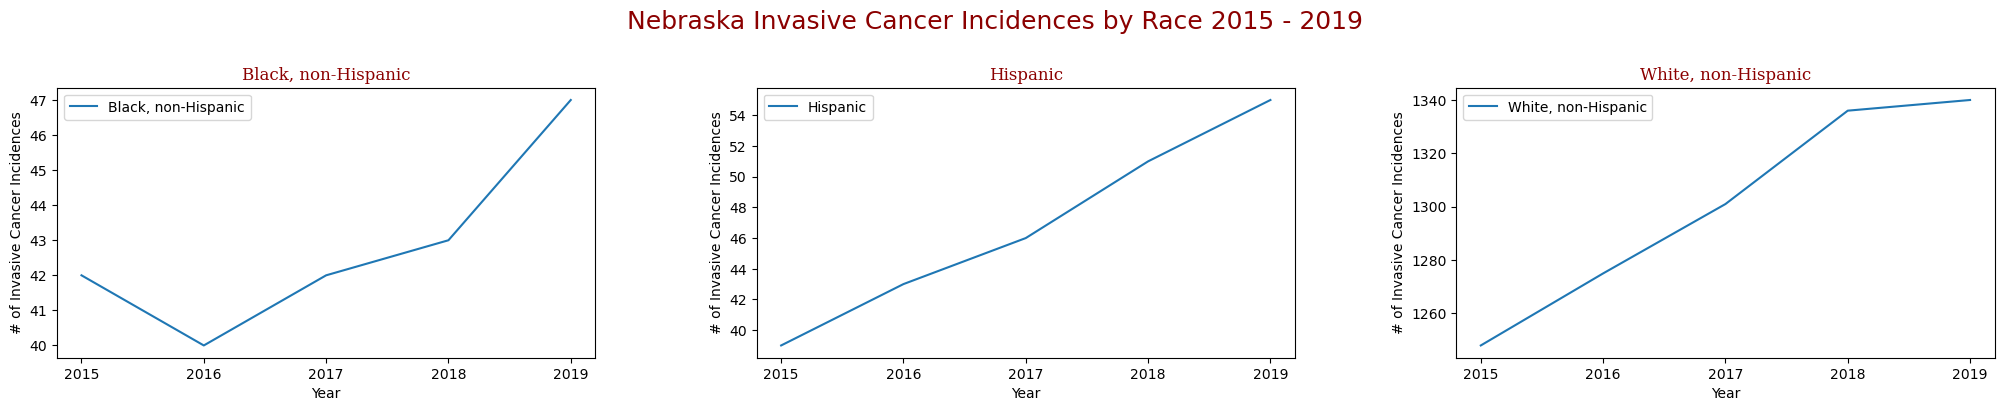

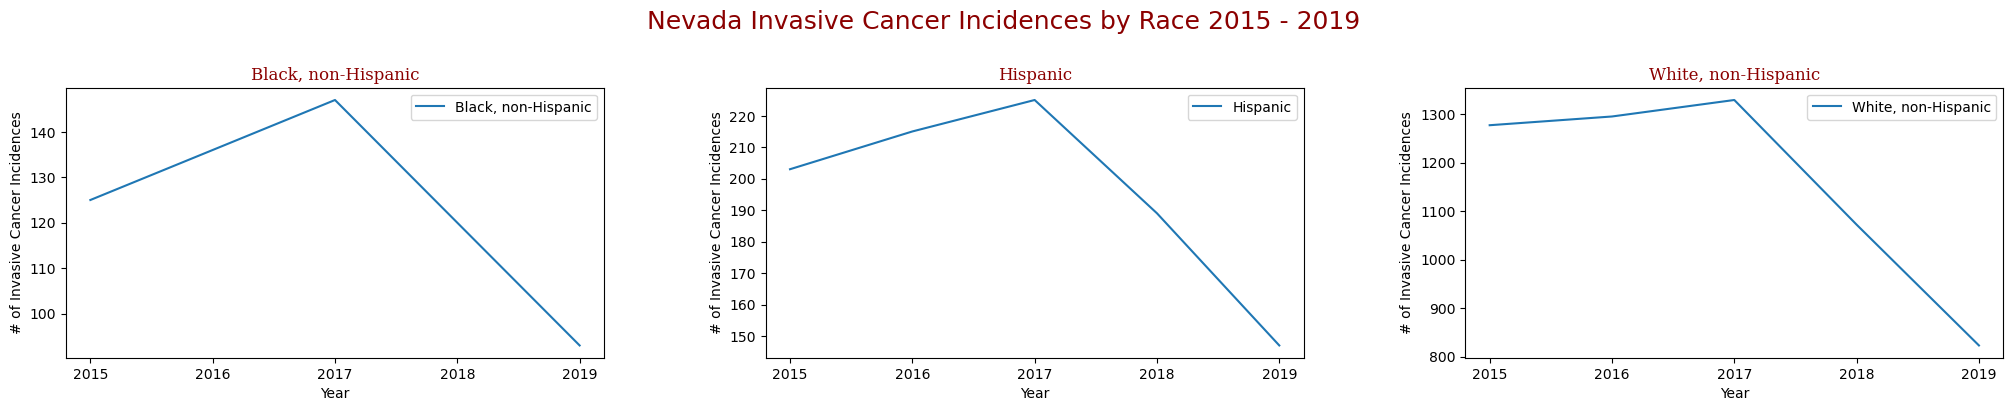

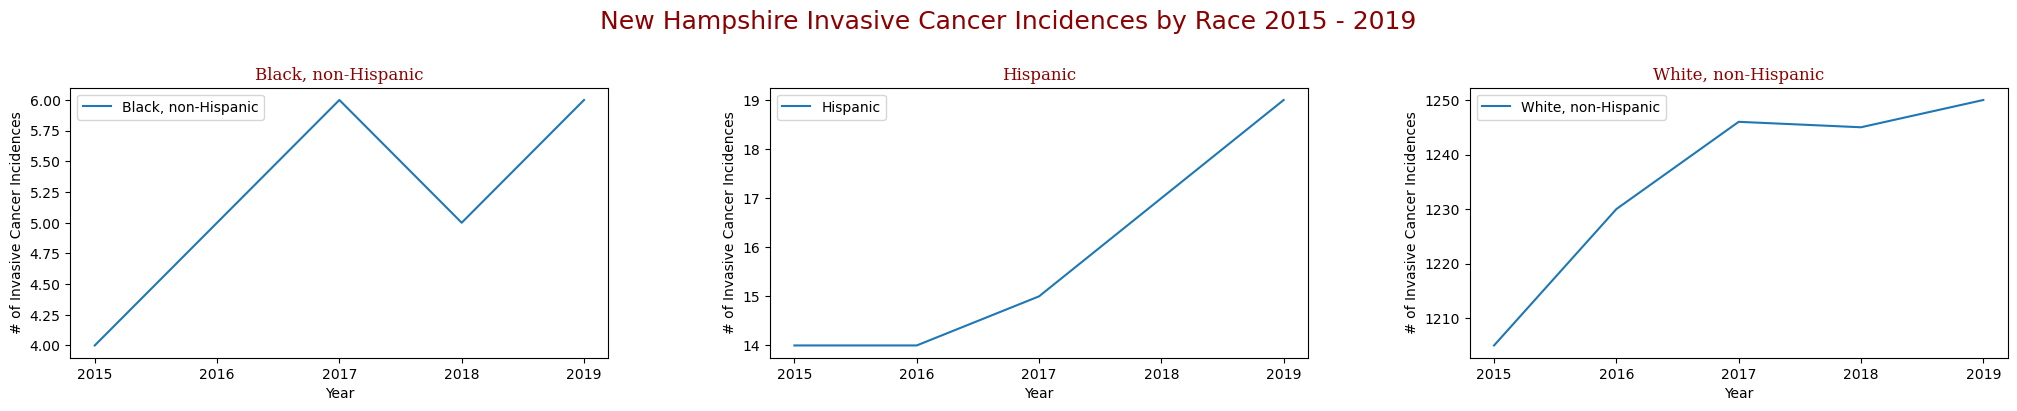

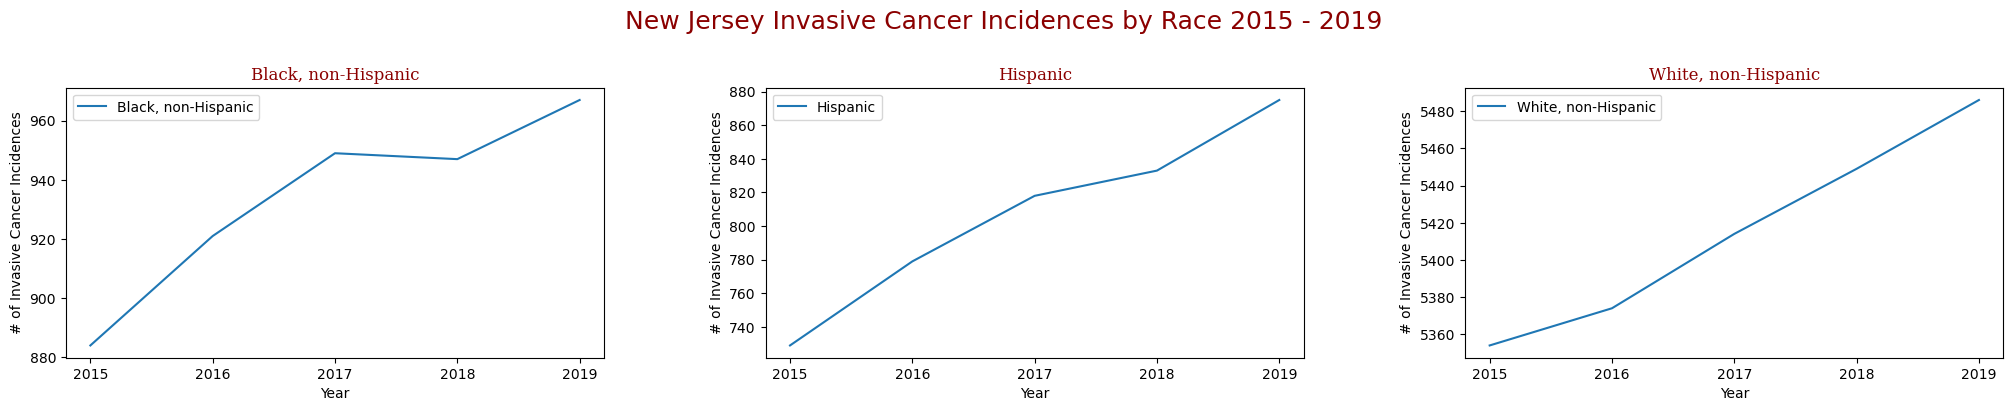

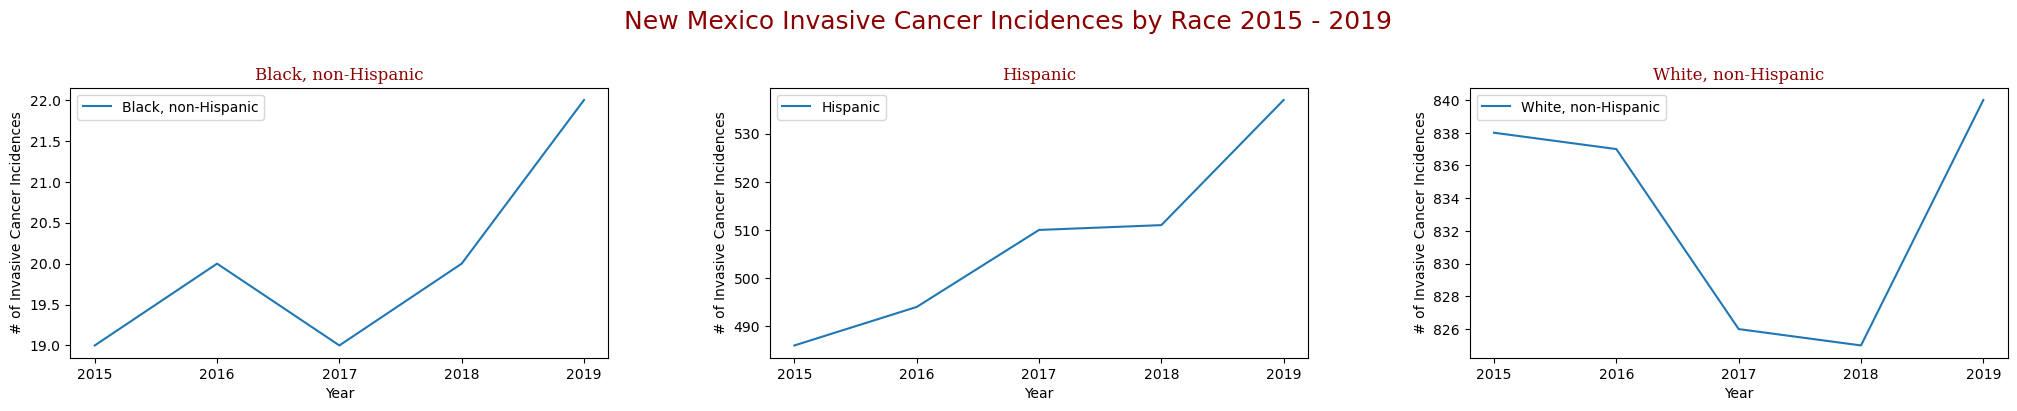

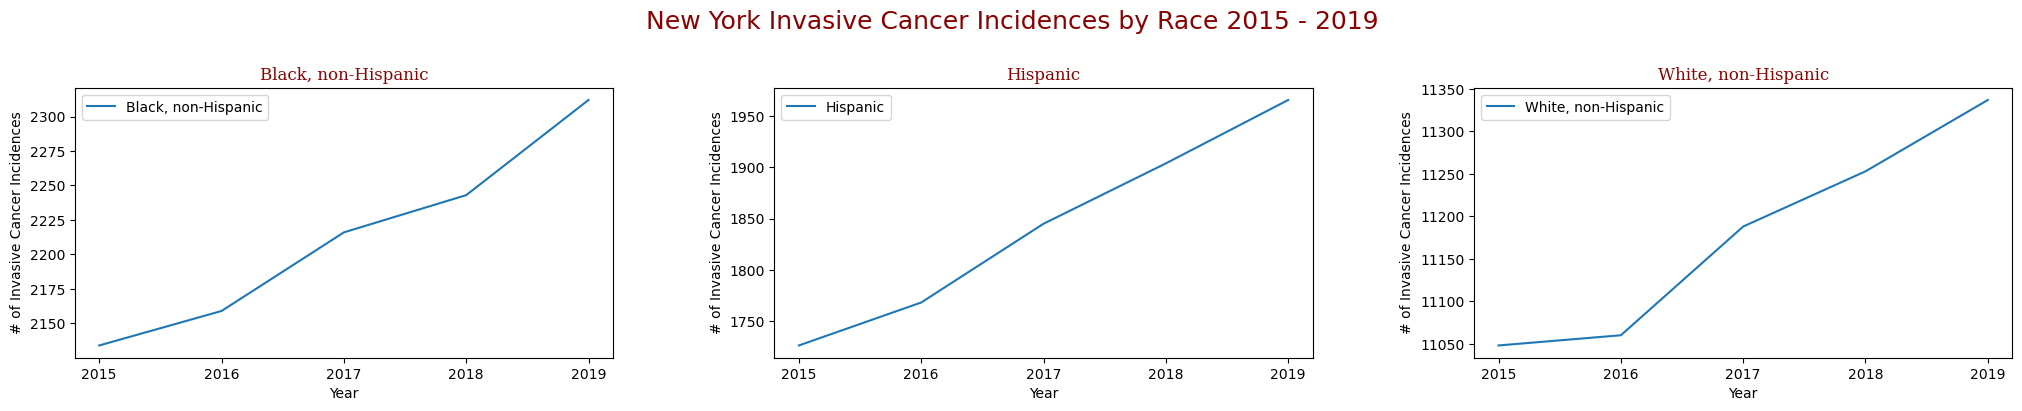

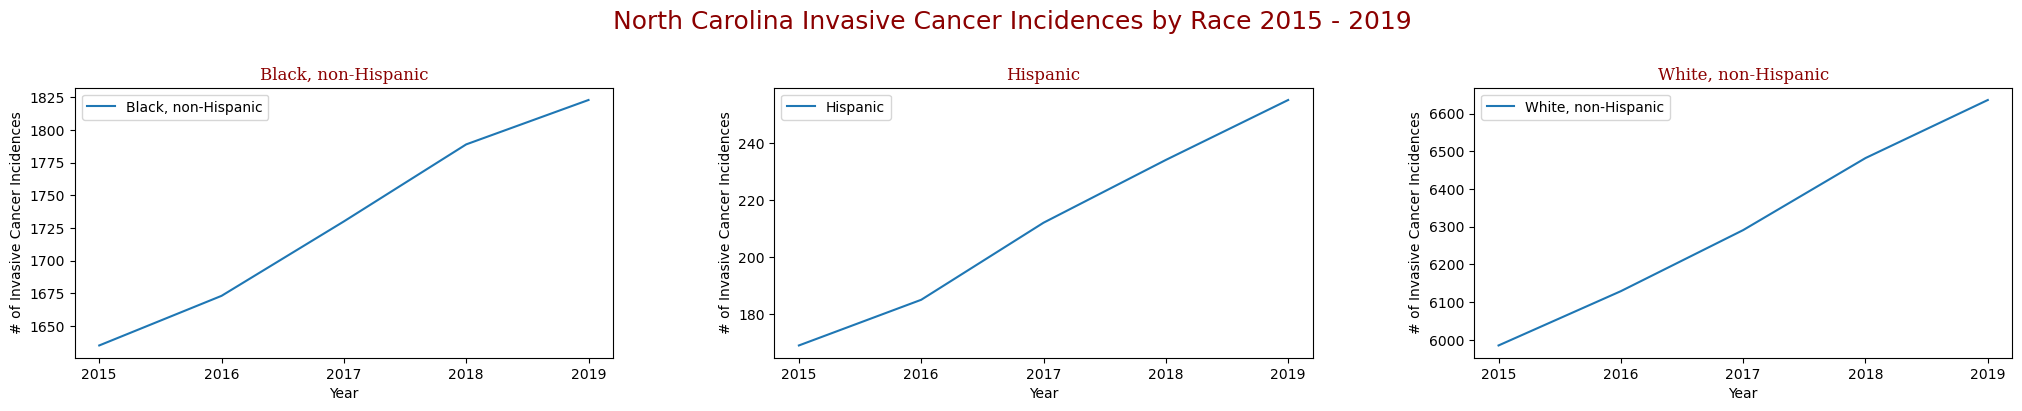

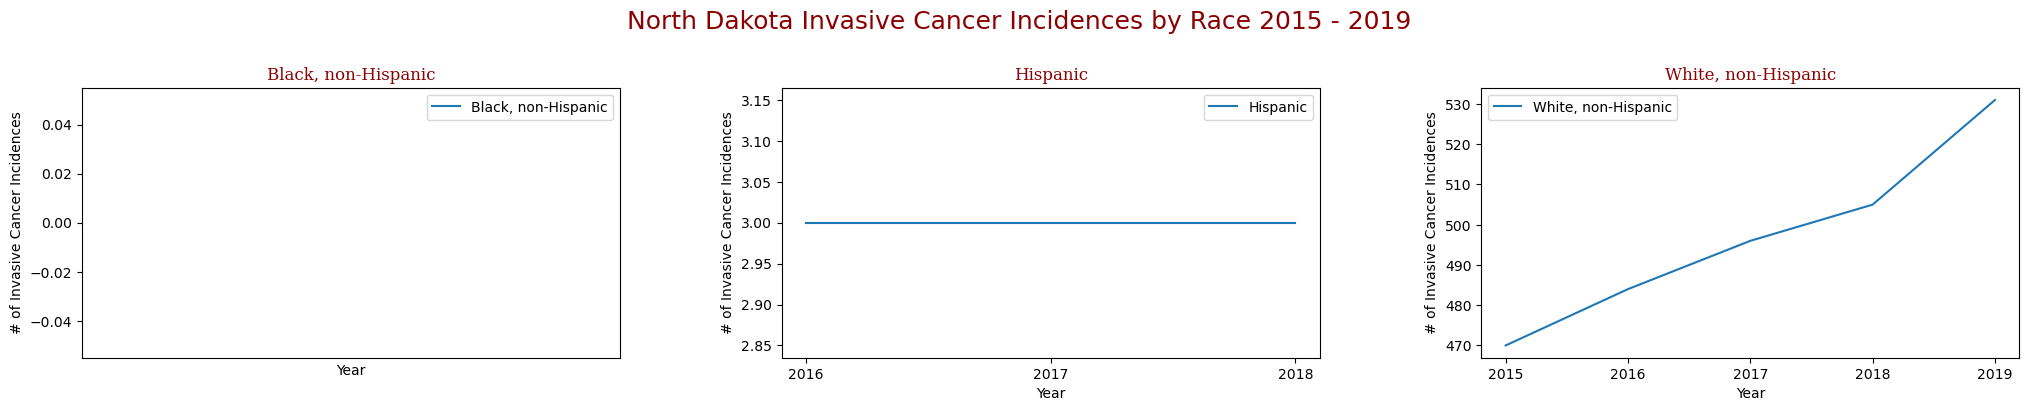

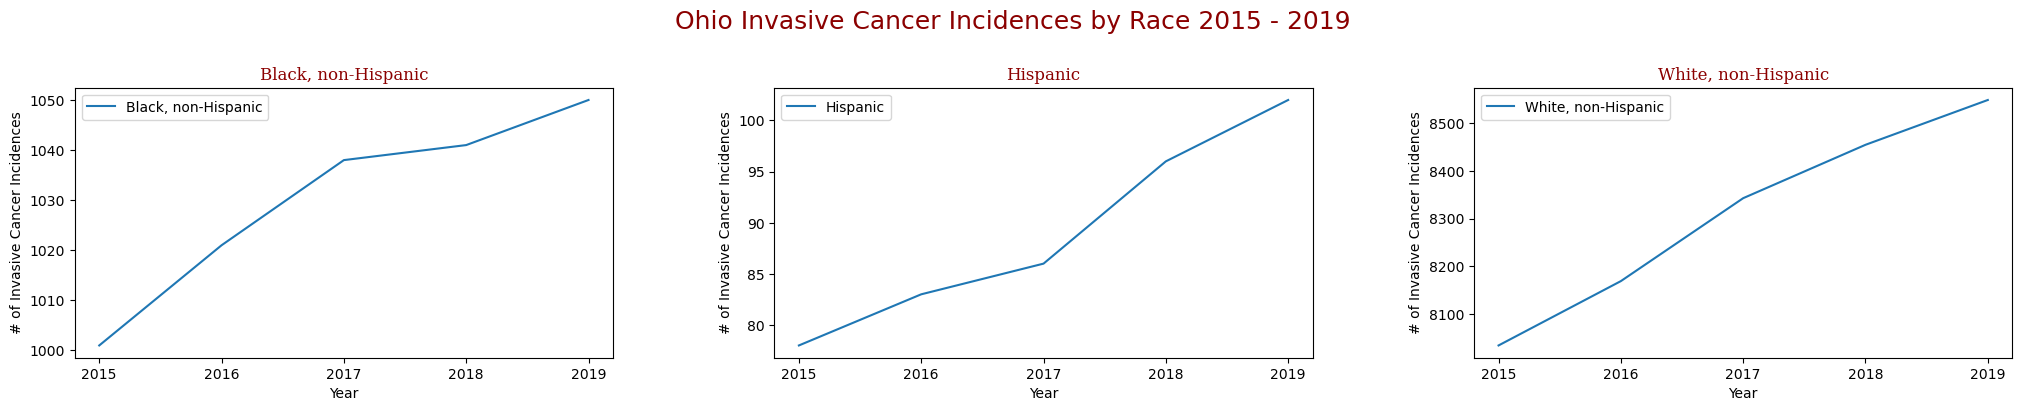

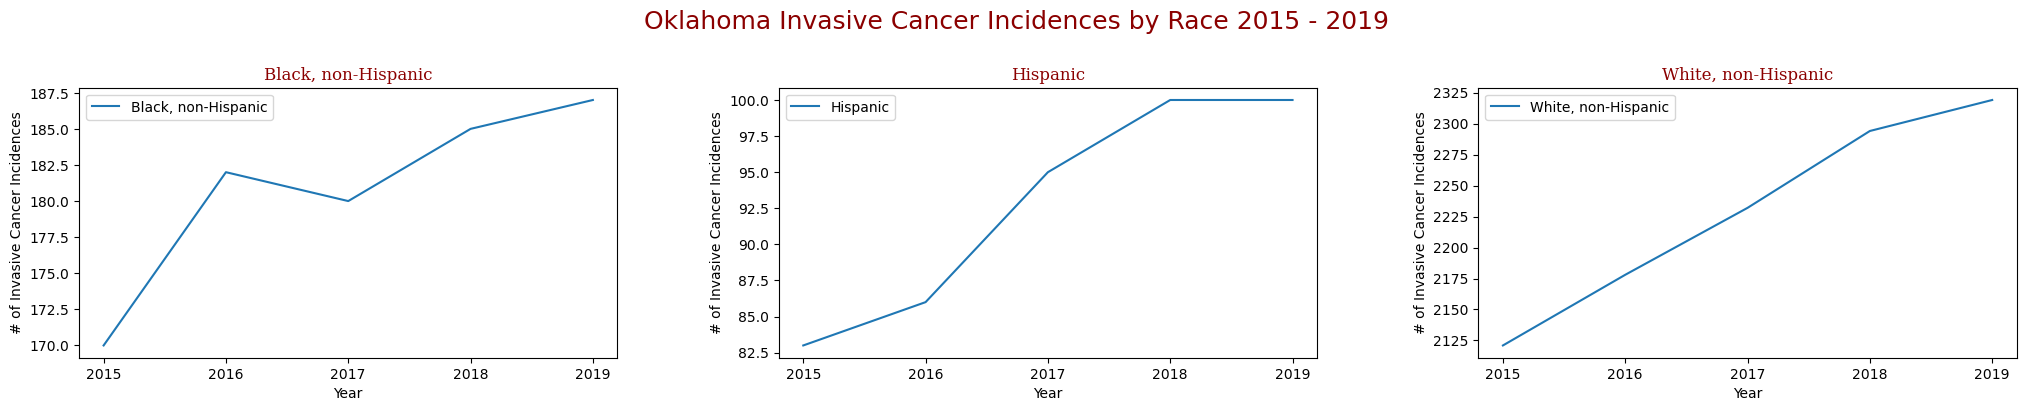

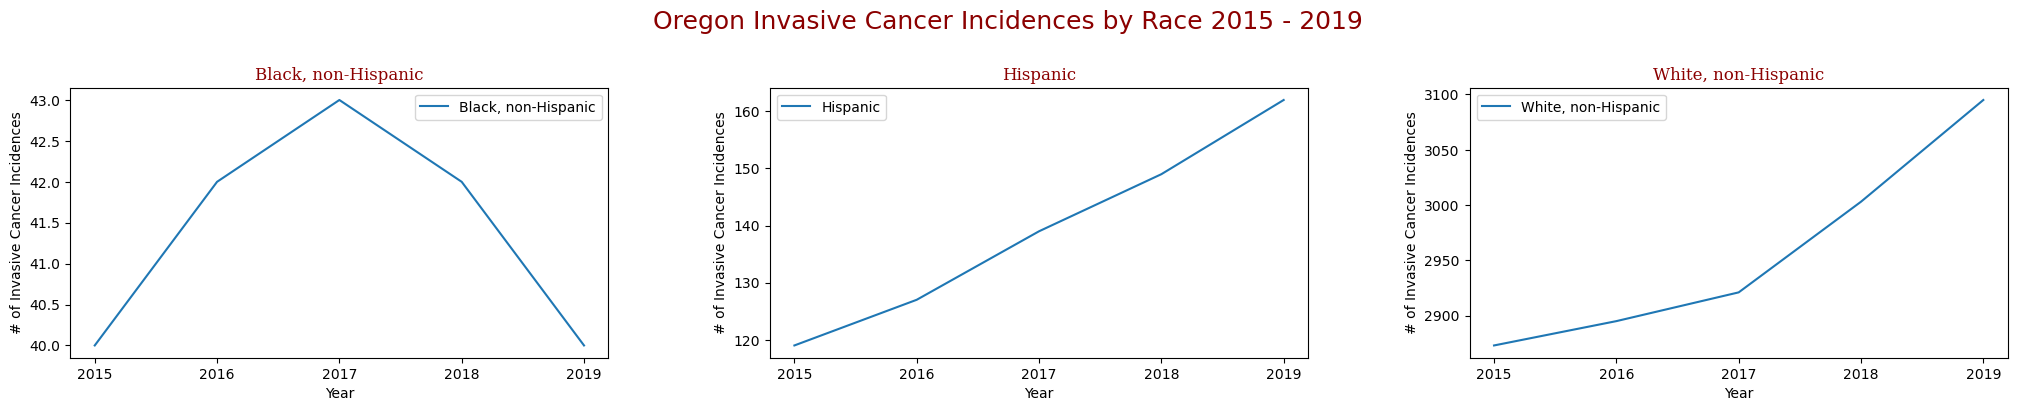

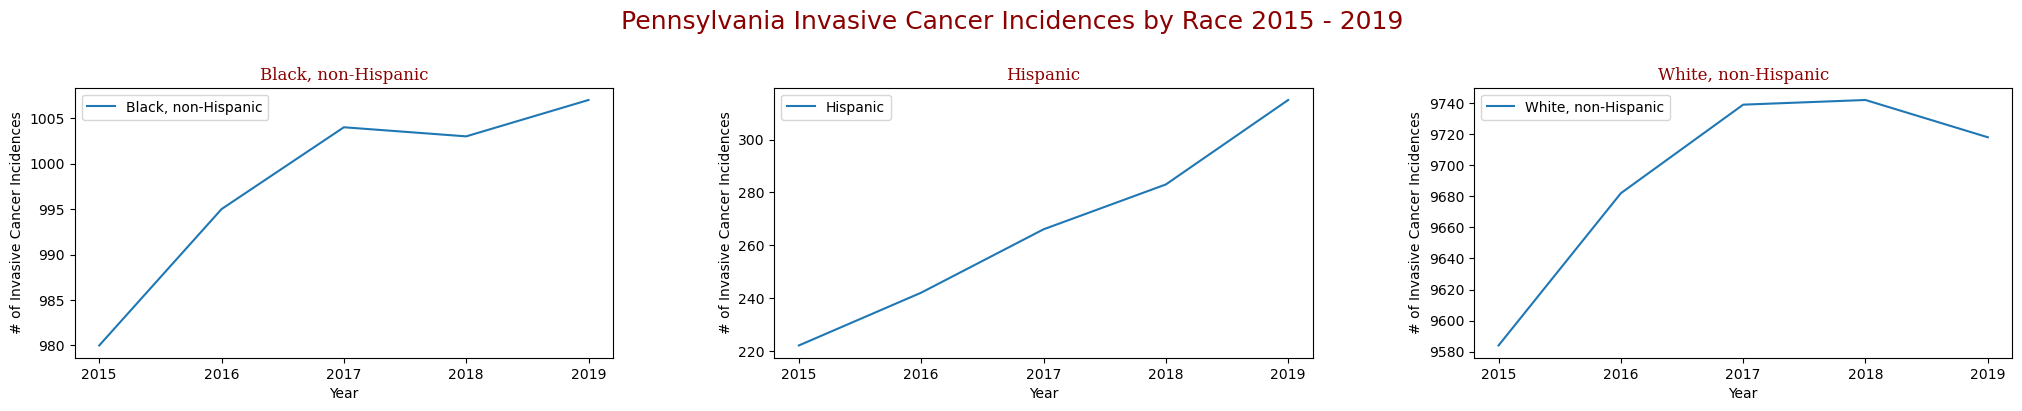

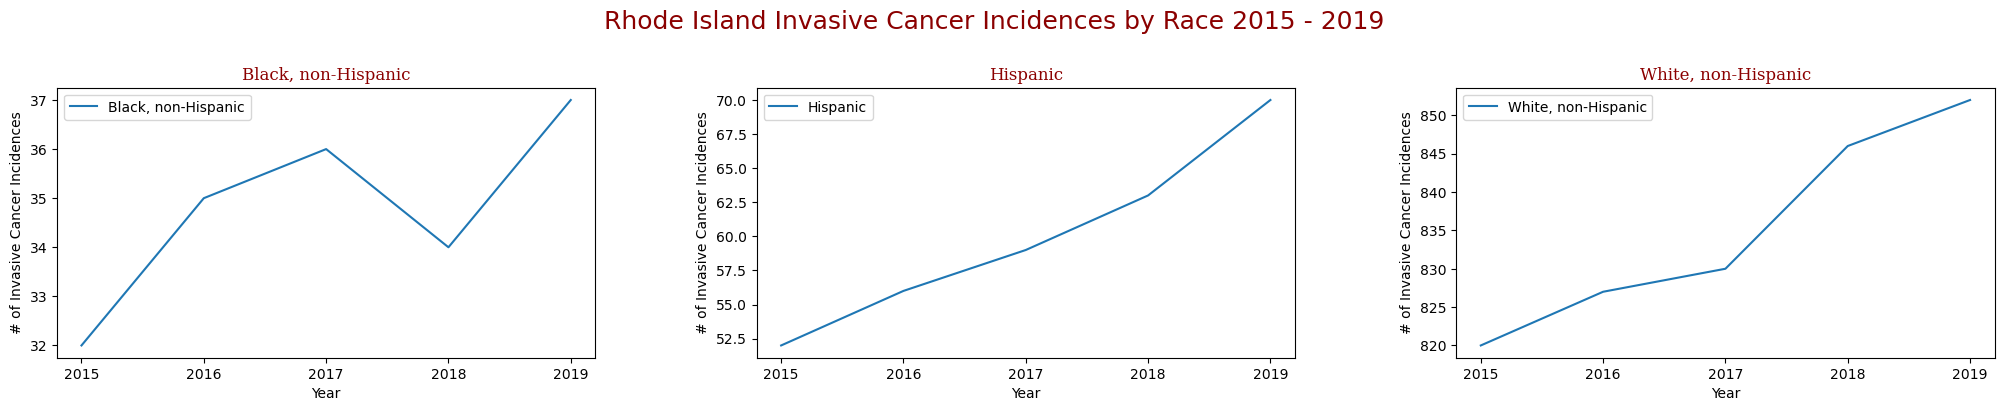

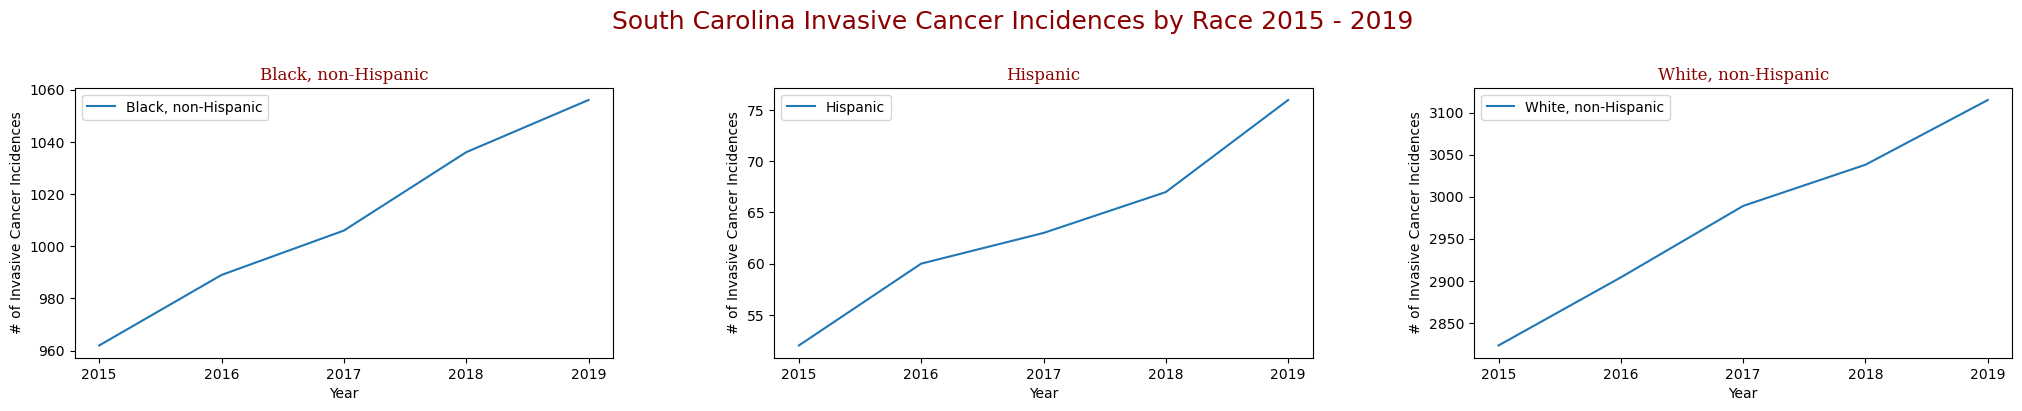

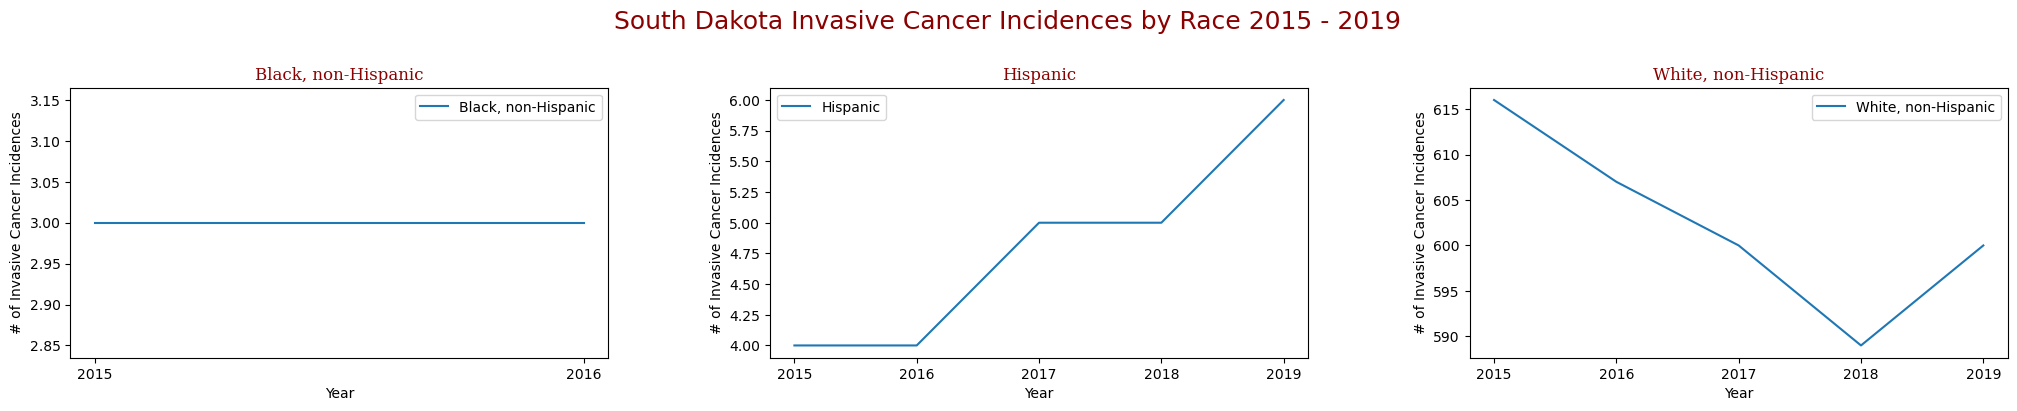

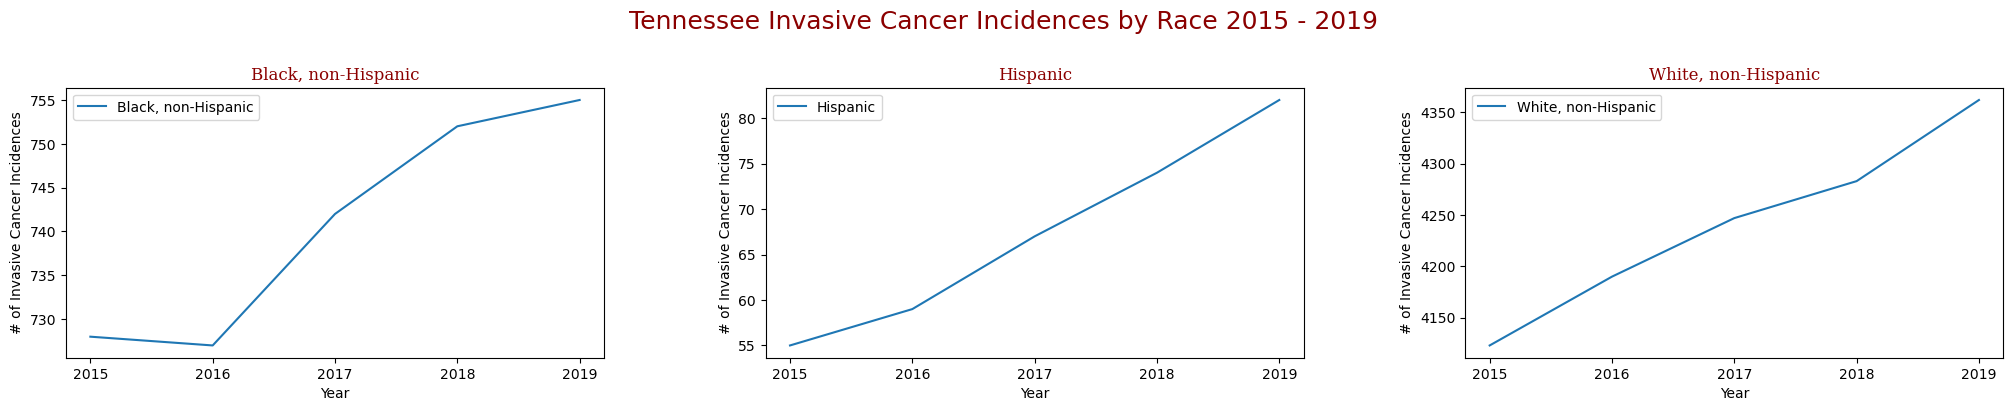

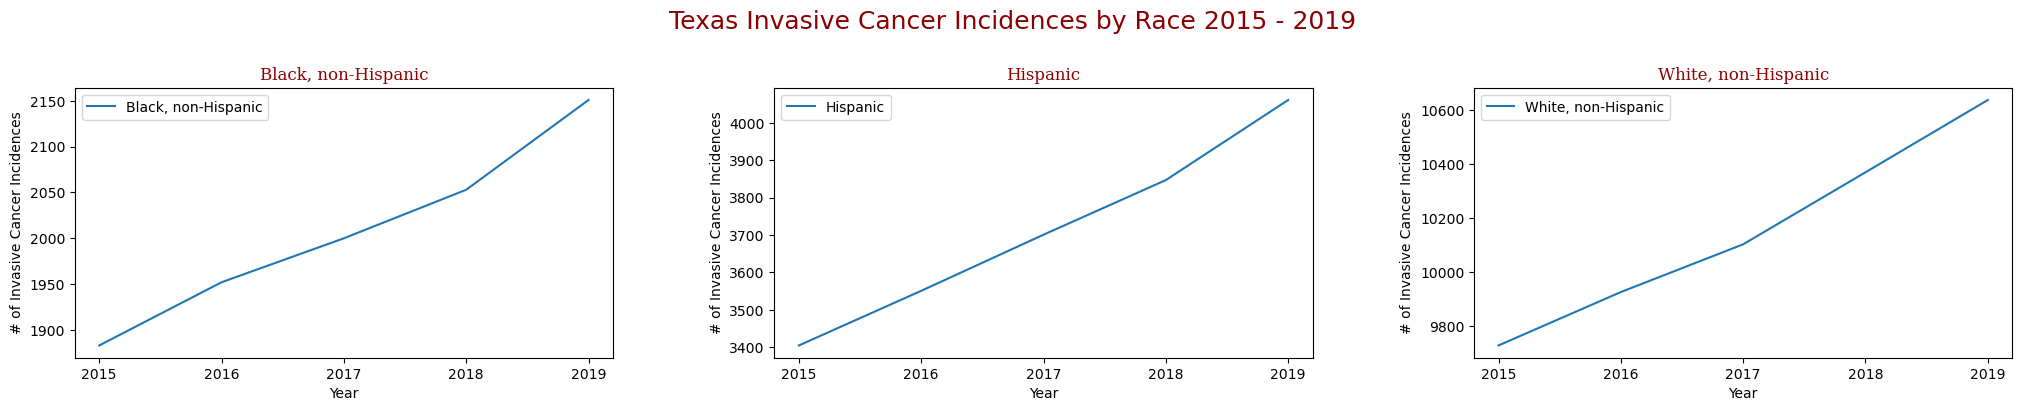

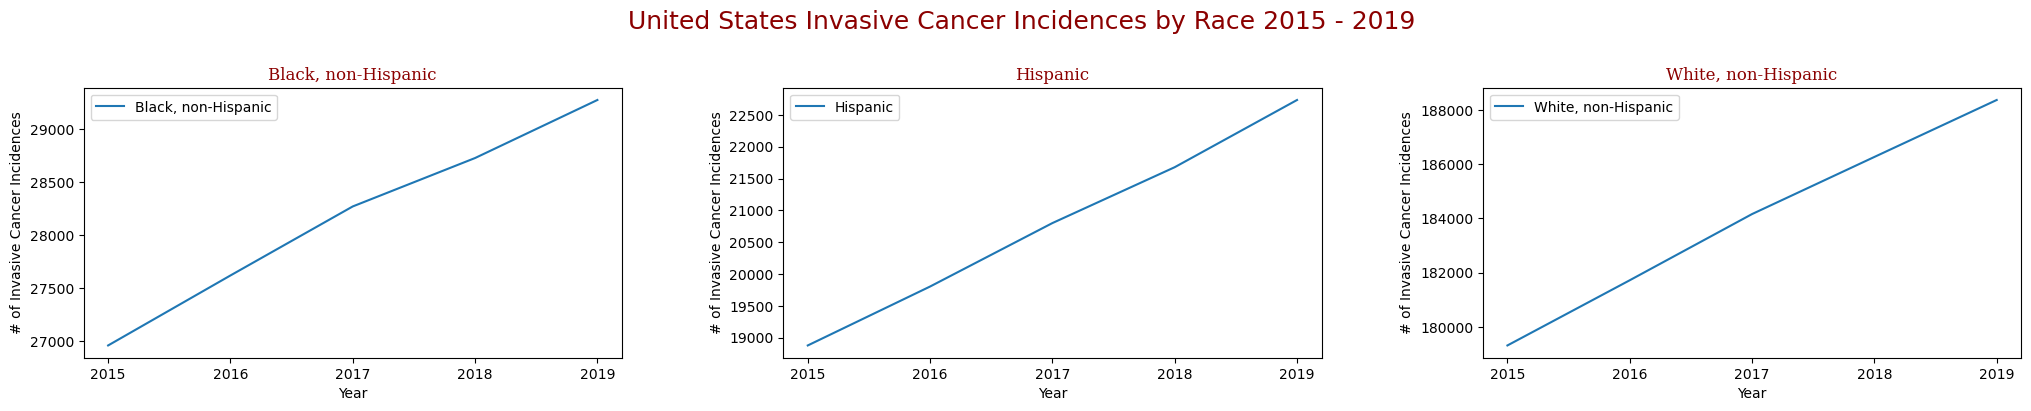

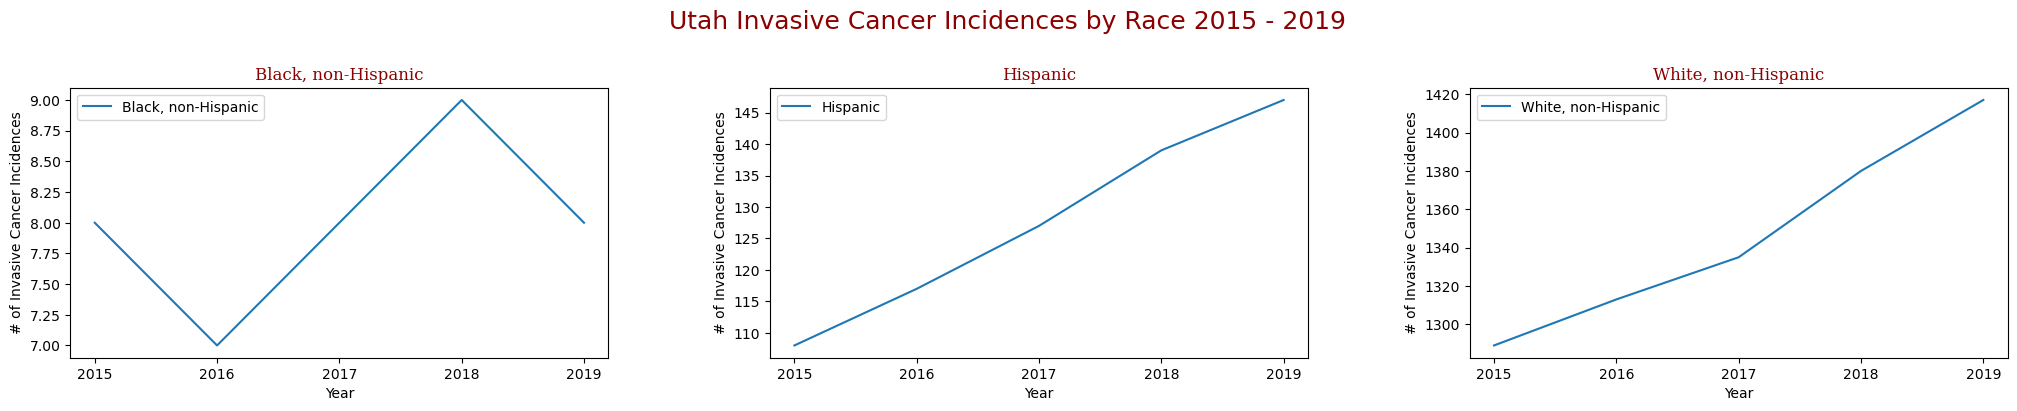

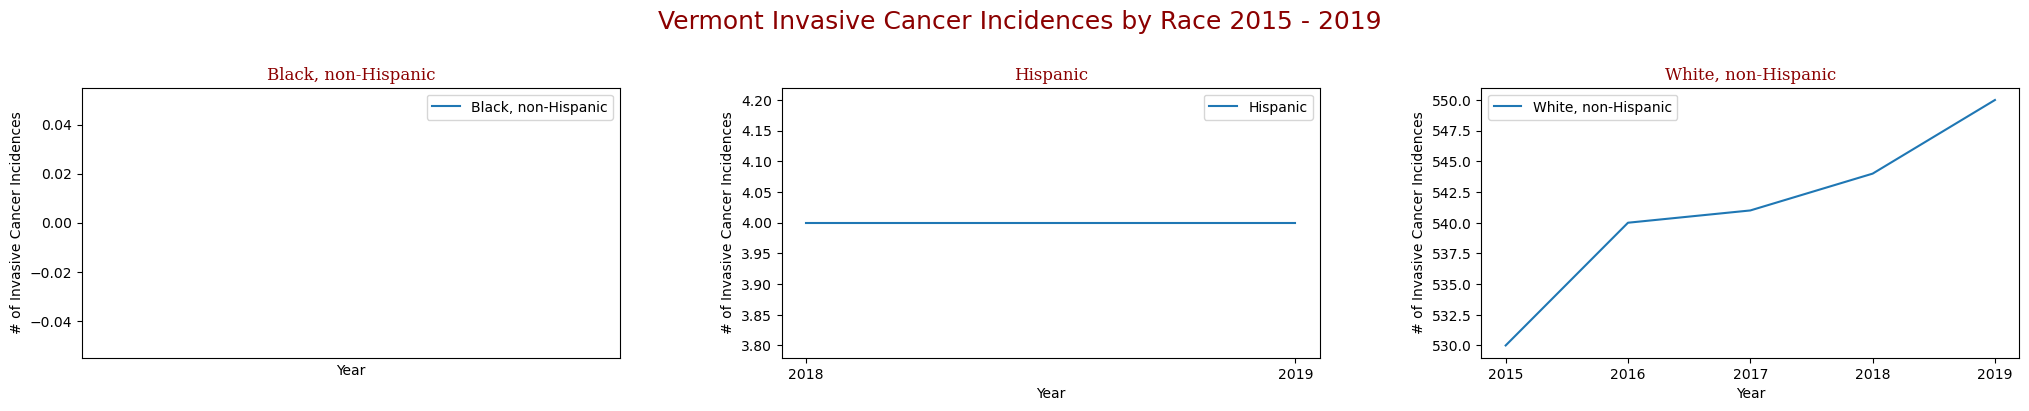

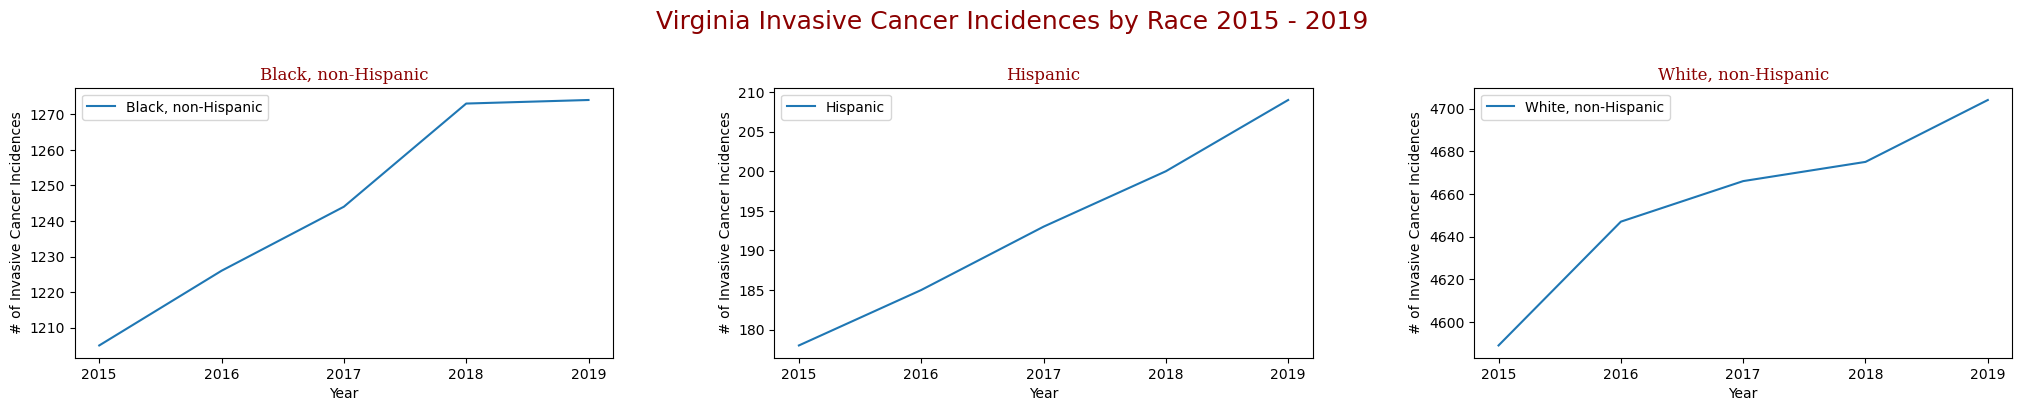

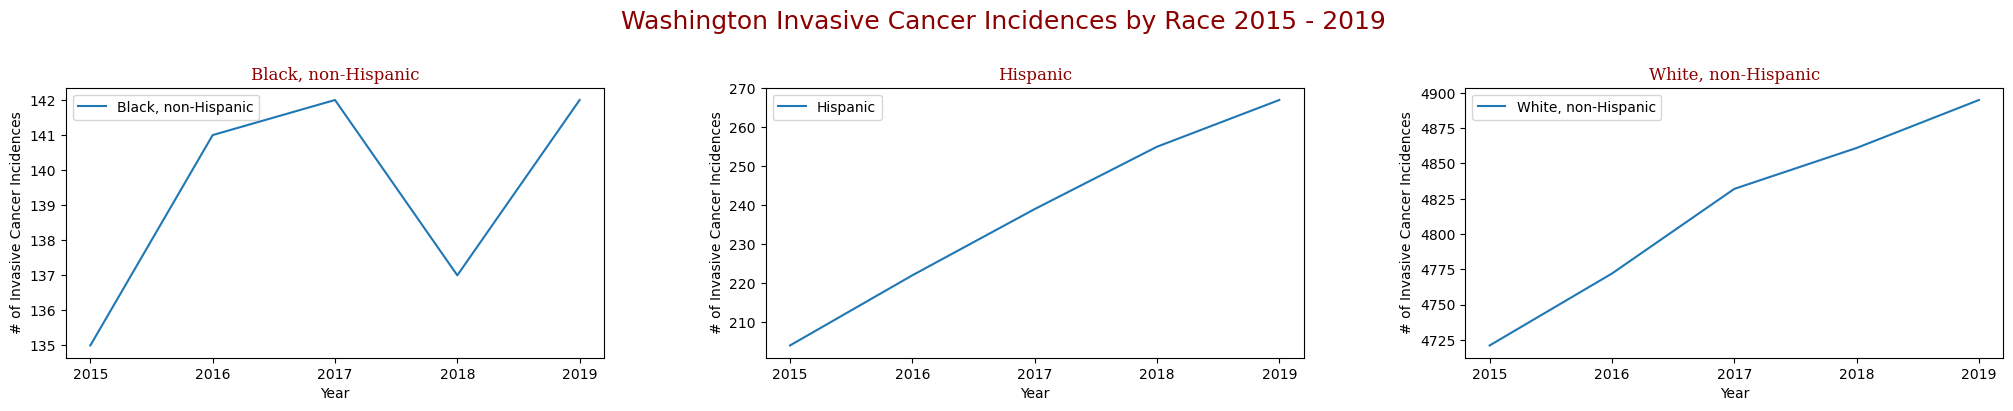

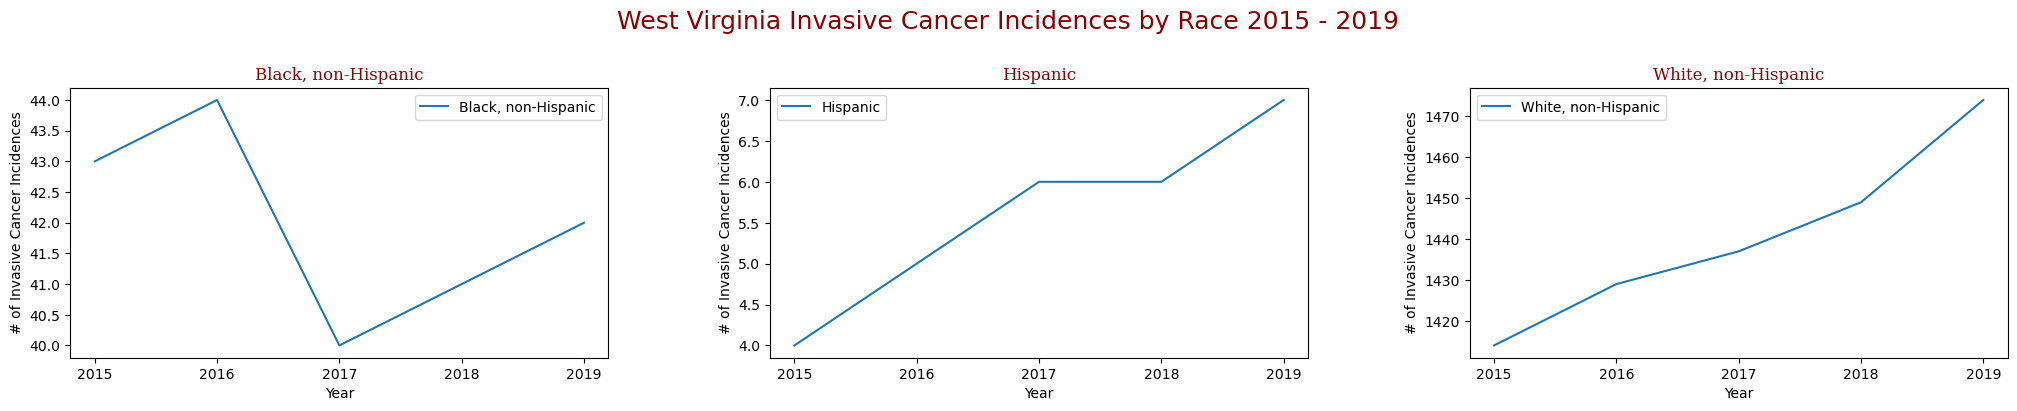

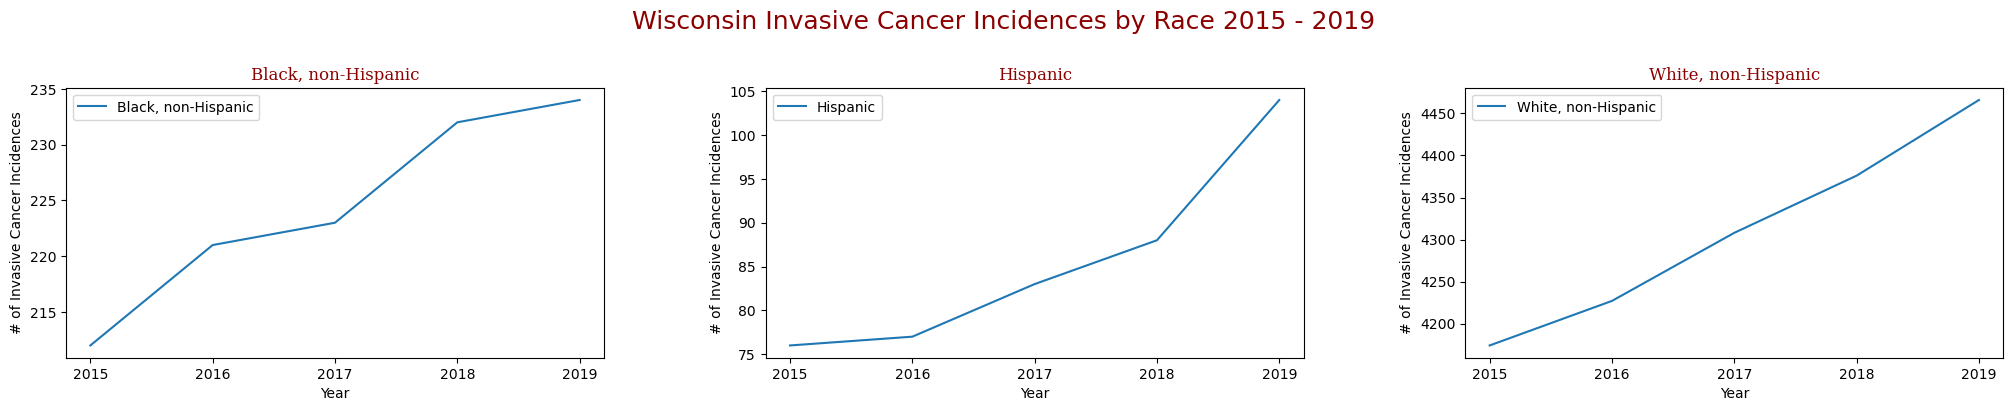

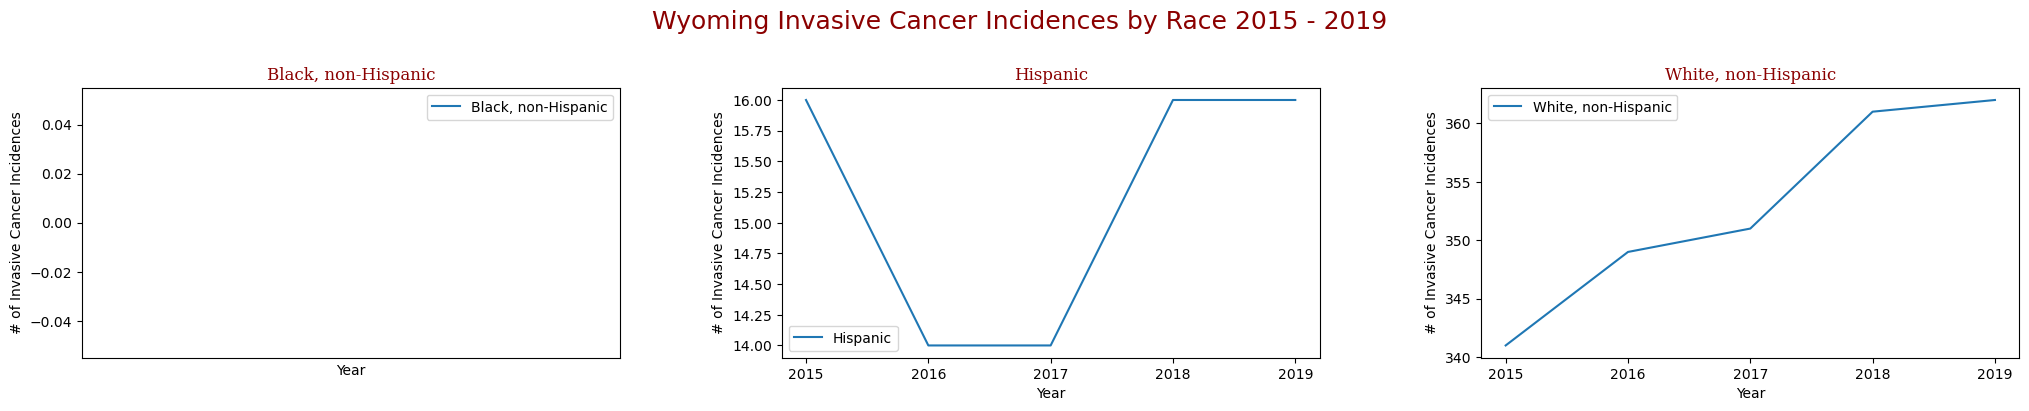

In [38]:
font = {'family': 'serif', 'color': 'darkred', 'weight': 'normal', 'size': 12}

for i, state in df_state.iterrows():
    fig = plt.figure(figsize=(25,6))
    fig.subplots_adjust(wspace=.3, top=.85, bottom=.4)
    fig.suptitle(f'{state[0]} Invasive Cancer Incidences by Race 2015 - 2019', fontsize=18, ha='center', color='darkred')

    for n, race in df3.iterrows():
        ax = fig.add_subplot(1, 3, n + 1)
        x = df2.loc[(df2['Race'] == race[0]) & (df2['State'] == state[0]), 'Year'].values.astype(str)
        y = df2.loc[(df2['Race'] == race[0]) & (df2['State'] == state[0]), 'Insidents'].values.astype(int)
        ax.plot(x, y, label=race[0])
        ax.set_xlabel('Year')
        ax.set_ylabel('# of Invasive Cancer Incidences')
        ax.legend()
        ax.set_title(f'{race[0]}', fontdict=font)
        # fig.tight_layout()
    

In [18]:
csv_data2 = pd.read_csv('C:/C_Drive/Bootcamp/ProjectData/export.csv')

In [ ]:
csv_data2.head()

Year    State  County   Race                       Origin   Sex  \
0  1990  Alabama       1  White  Non-Spanish-Hispanic-Latino  Male   
1  1990  Alabama       1  White  Non-Spanish-Hispanic-Latino  Male   
2  1990  Alabama       1  White  Non-Spanish-Hispanic-Latino  Male   
3  1990  Alabama       1  White  Non-Spanish-Hispanic-Latino  Male   
4  1990  Alabama       1  White  Non-Spanish-Hispanic-Latino  Male   

      Age1year  Count  Unemployed_pct  Med_fam_income  Med_house_income  
0     00 years    239             368            7110              5873  
1  01-04 years    190             368            7110              5873  
2  01-04 years    203             368            7110              5873  
3  01-04 years    220             368            7110              5873  
4  01-04 years    208             368            7110              5873

In [ ]:
# df_pop_clean = df_pop.loc[(df_pop['Race'] == 'Black') | (df_pop['Race'] == 'White')]
df_pop = csv_data2.loc[(csv_data2['Race'] == 'Black') | (csv_data2['Race'] == 'White')]

In [ ]:
# df_pop = csv_data2.groupby(['Year', 'State', 'Race', 'Origin'], as_index=False).agg({'Count': 'sum'})
df_pop_clean = df_pop.groupby(['Year', 'State', 'Race', 'Origin'], as_index=False).agg({'Count': 'sum'})

In [ ]:
df_pop_clean.insert(1,'Race_Clean', 'Race')

In [ ]:
df_pop_clean.head()

Year Race_Clean    State   Race                       Origin    Count
0  1990       Race  Alabama  Black  Non-Spanish-Hispanic-Latino  1020916
1  1990       Race  Alabama  Black      Spanish-Hispanic-Latino     3282
2  1990       Race  Alabama  White  Non-Spanish-Hispanic-Latino  2967680
3  1990       Race  Alabama  White      Spanish-Hispanic-Latino    20084
4  1990       Race   Alaska  Black  Non-Spanish-Hispanic-Latino    21720

In [ ]:
df_pop_clean.loc[(df_pop_clean['Race'] == 'Black') & (df_pop_clean['Origin'] == 'Non-Spanish-Hispanic-Latino'), 'Race_Clean'] = 'Black'
df_pop_clean.loc[(df_pop_clean['Race'] == 'White') & (df_pop_clean['Origin'] == 'Non-Spanish-Hispanic-Latino'), 'Race_Clean'] = 'White'
df_pop_clean.loc[(df_pop_clean['Origin'] == 'Spanish-Hispanic-Latino'), 'Race_Clean'] = 'Hispanic'
df_pop_clean = df_pop_clean.drop('Race', axis=1)
df_pop_clean = df_pop_clean.drop('Origin', axis=1)

In [ ]:
df_pop_clean.head()

Year Race_Clean    State    Count
0  1990      Black  Alabama  1020916
1  1990   Hispanic  Alabama     3282
2  1990      White  Alabama  2967680
3  1990   Hispanic  Alabama    20084
4  1990      Black   Alaska    21720

In [ ]:
df_pop_gb = df_pop_clean.groupby(['Year', 'State'], as_index=False).agg({'Count': 'sum'})

In [ ]:
df_merge = pd.merge(df2, df_pop_gb, on=['Year', 'State'], how='outer')

In [ ]:
df_merge2 = df_merge.loc[(df_merge['Year'] >= 2015) & (~df_merge['Race_Clean'].isna())]

In [ ]:
df_analysis = df_merge2.loc[~df_merge2['Count'].isna()].copy()

In [ ]:
df_analysis['Insidents_per_capita'] = df_analysis['Insidents'].values.astype(int) / (df_analysis['Count'].values / 1000)

In [ ]:
df_analysis.head()

Year Race_Clean    State Insidents      Count  Insidents_per_capita
0  2015      Black  Alabama    5605.0  4740460.0              1.182375
1  2015   Hispanic  Alabama     200.0  4740460.0              0.042190
2  2015      White  Alabama   19601.0  4740460.0              4.134831
3  2016      Black  Alabama    5750.0  4749439.0              1.210669
4  2016   Hispanic  Alabama     210.0  4749439.0              0.044216

In [ ]:
df_merge_state = df_analysis.groupby('State', as_index=False)['State'].first()

In [ ]:
df_merge_race = df_analysis.groupby('Race_Clean', as_index=False)['Race_Clean'].first()

In [ ]:
df_merge_year = df_analysis.groupby('Year', as_index=False)['Year'].first()

C:\Users\inlik\AppData\Local\Temp\ipykernel_11988\2748182295.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(25,6))


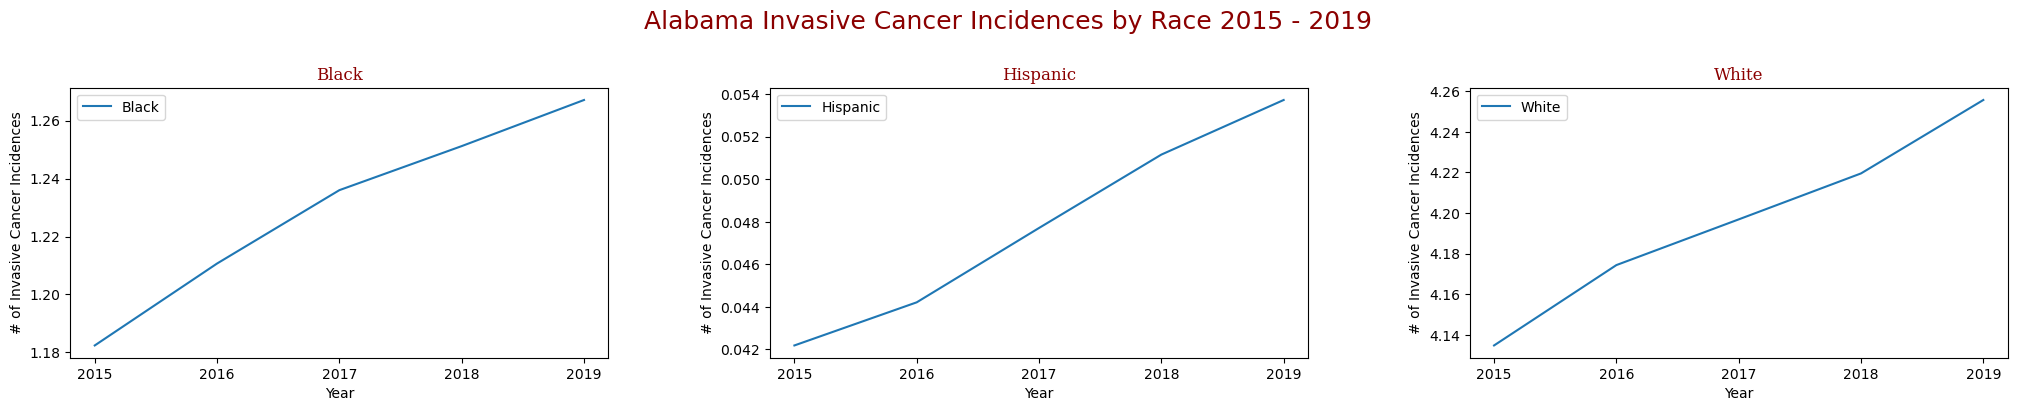

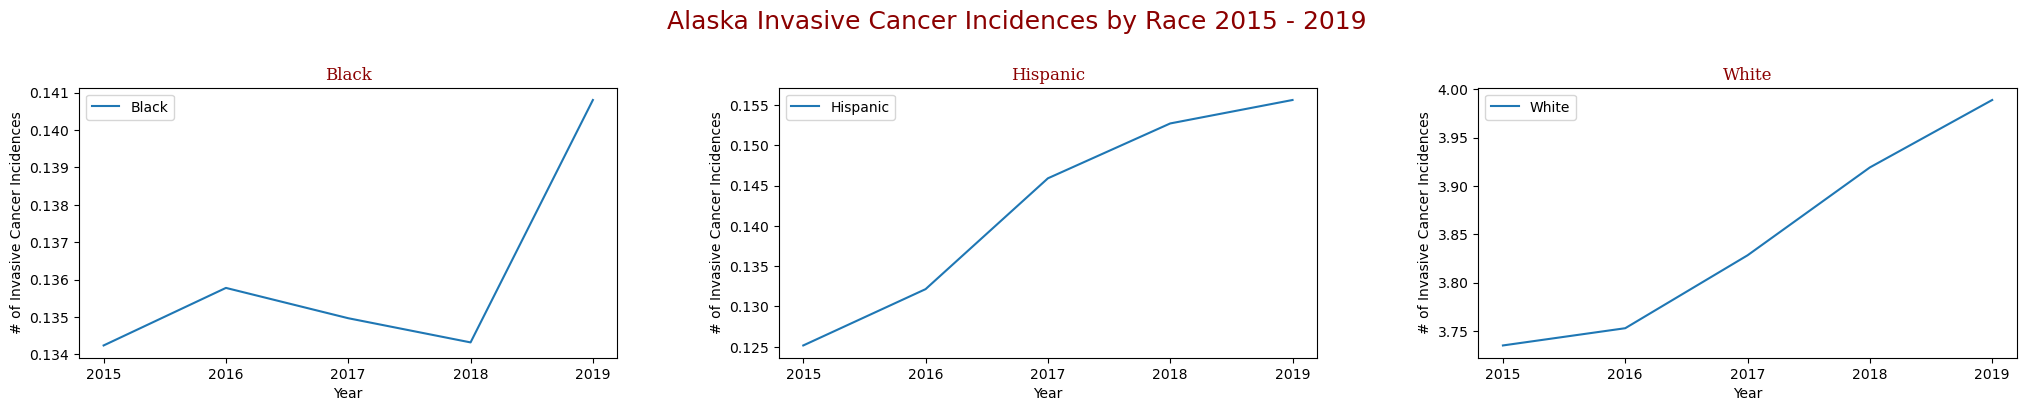

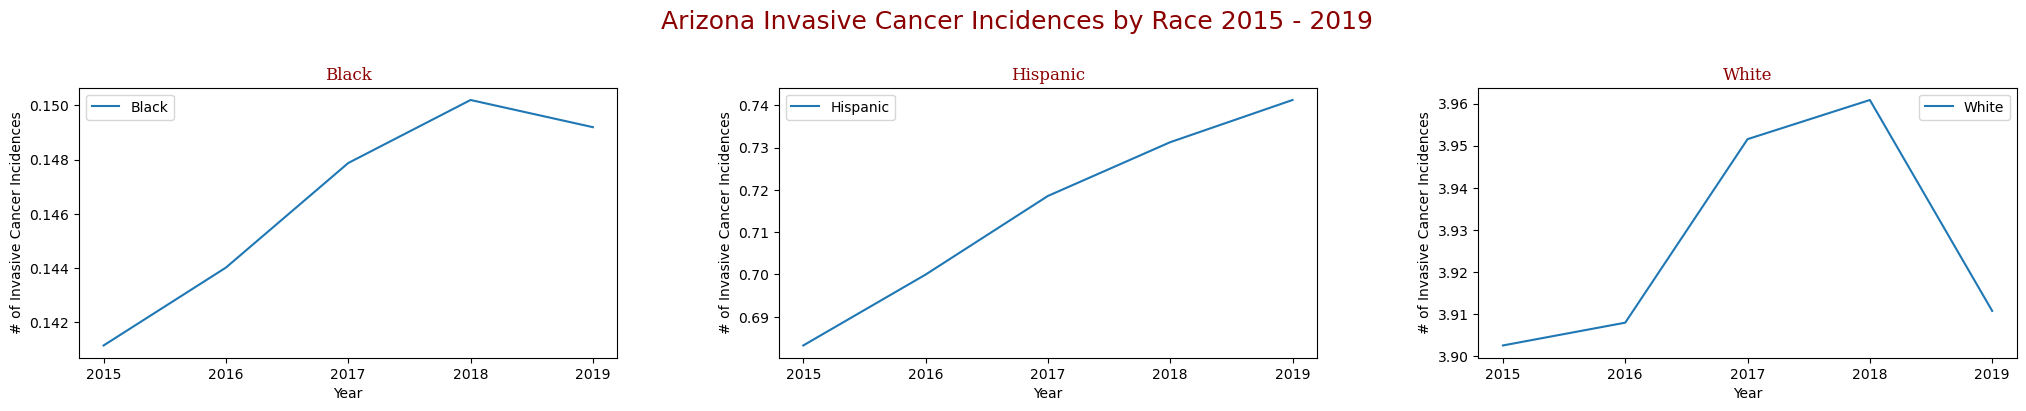

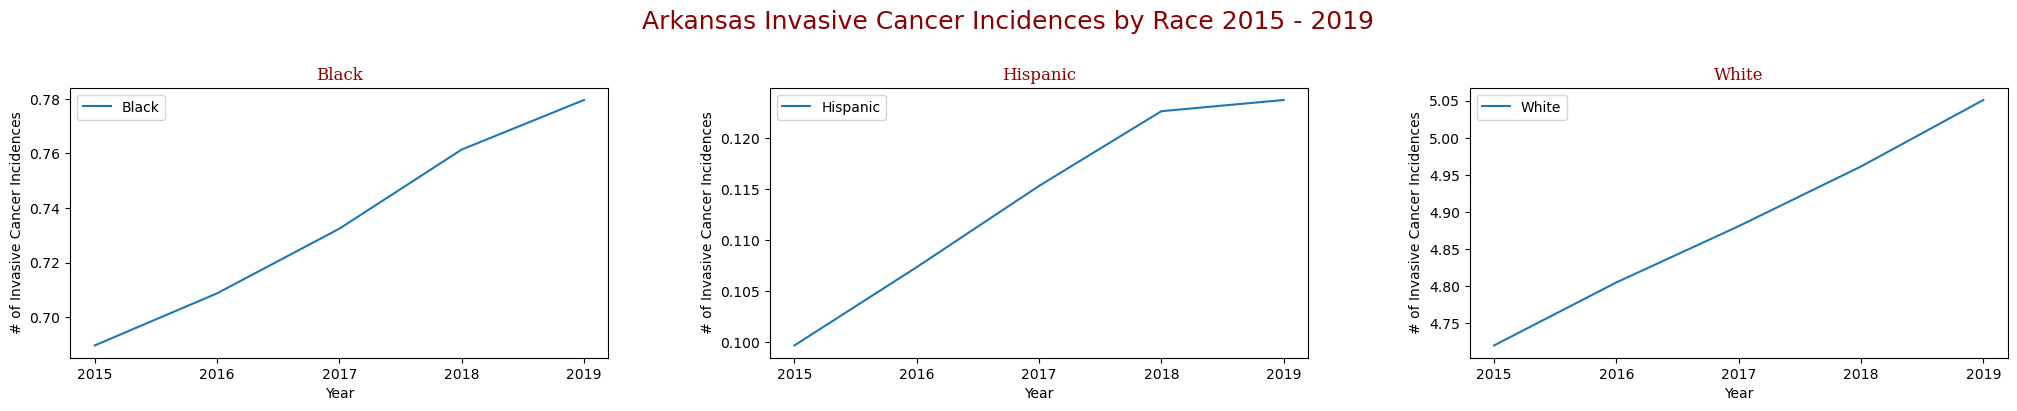

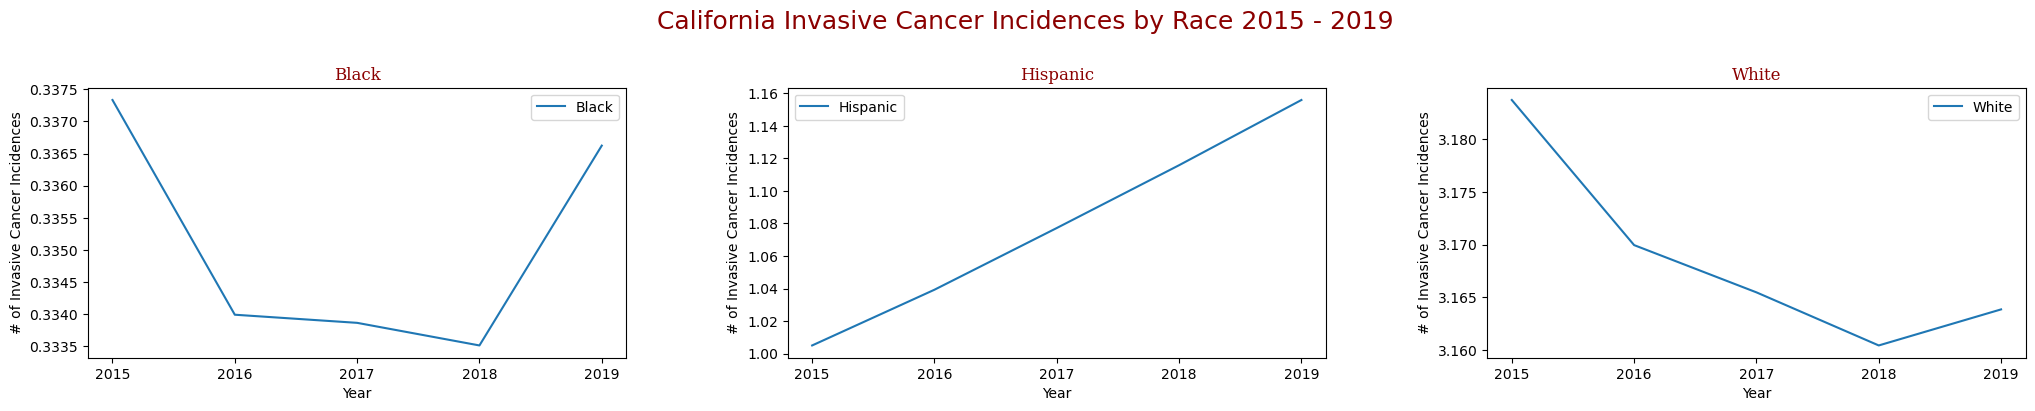

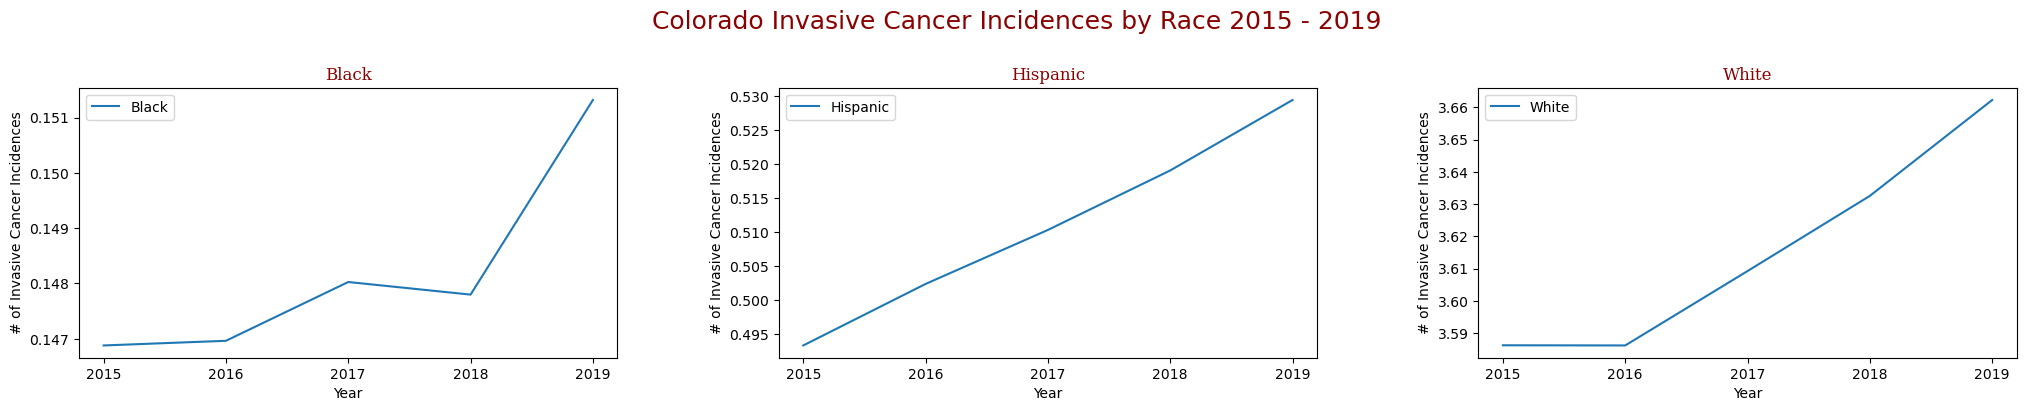

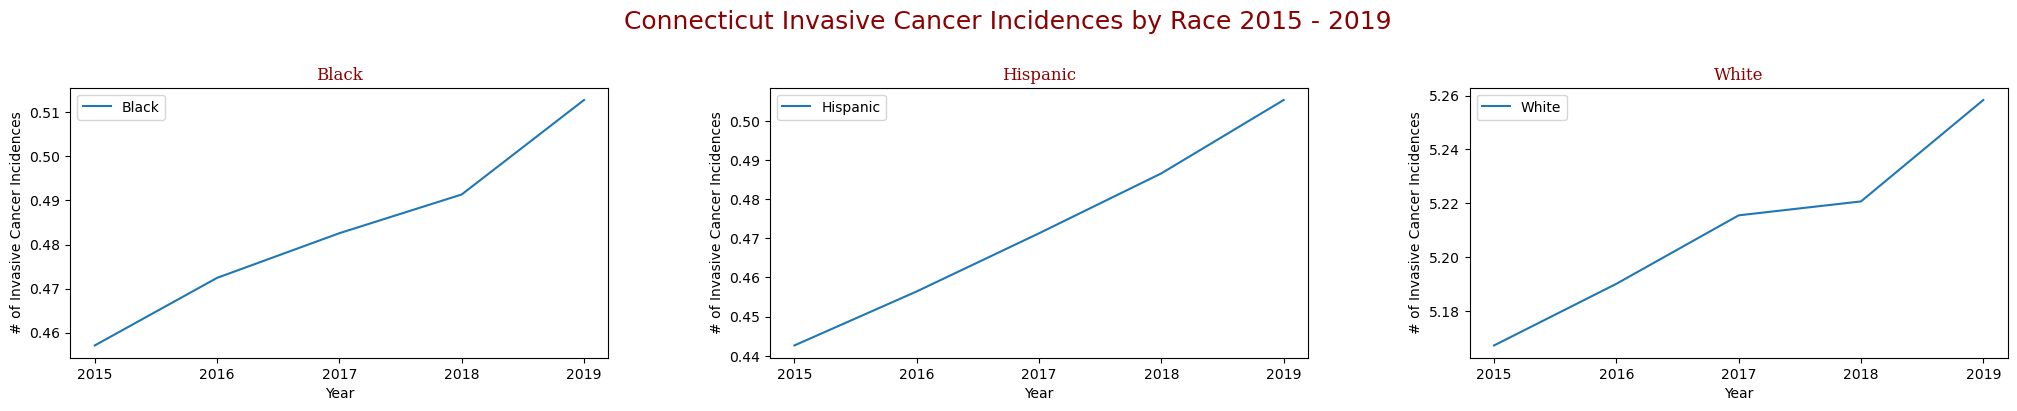

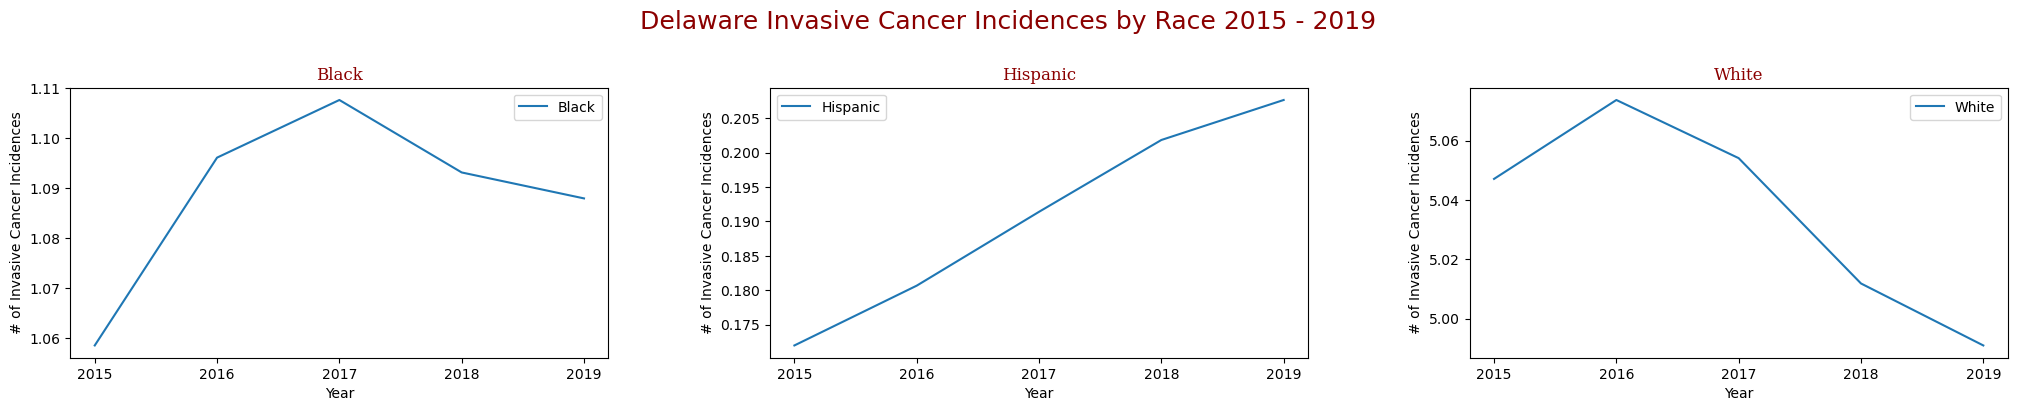

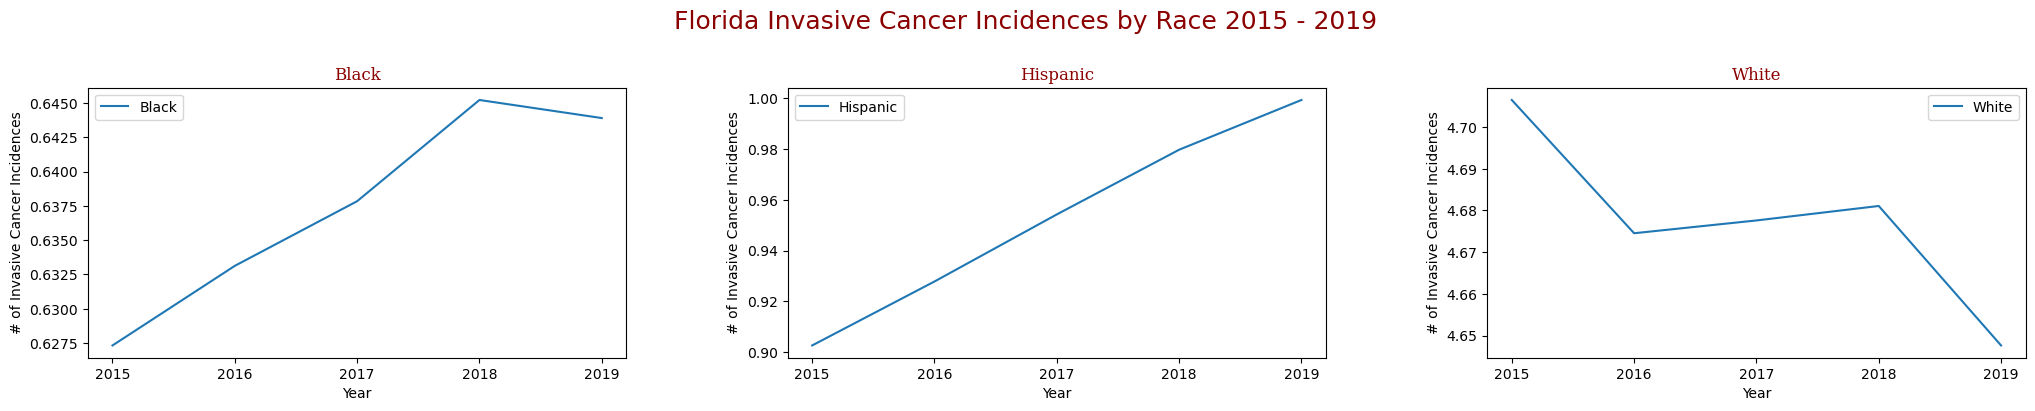

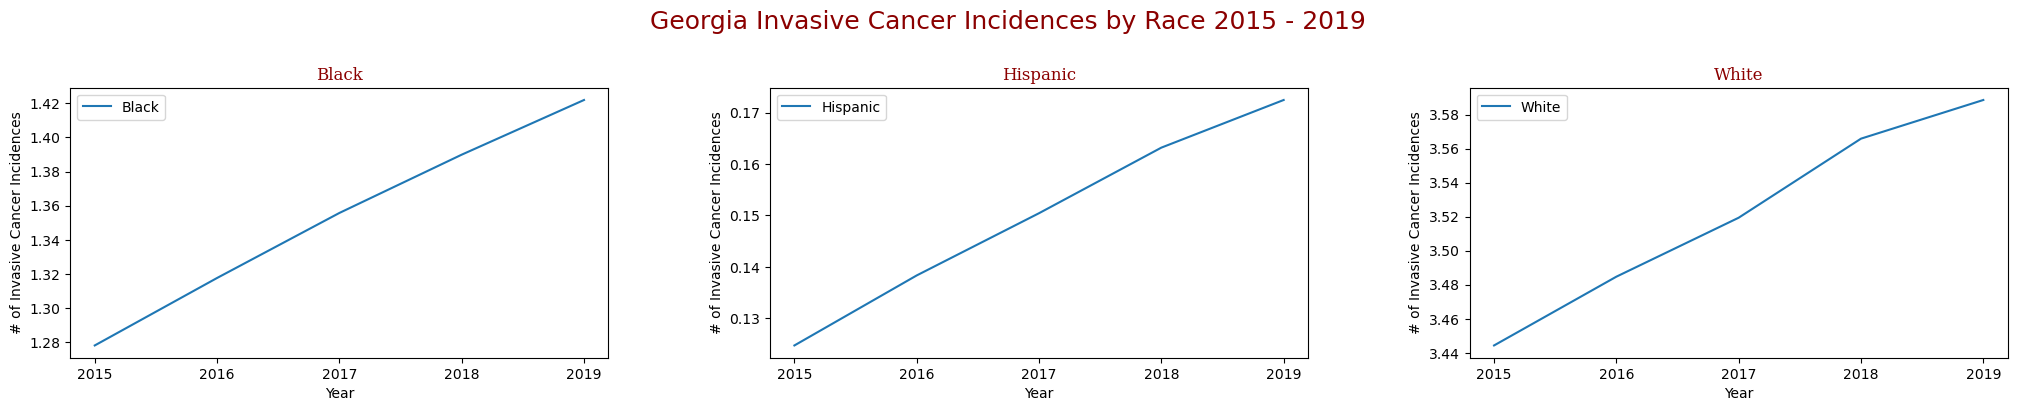

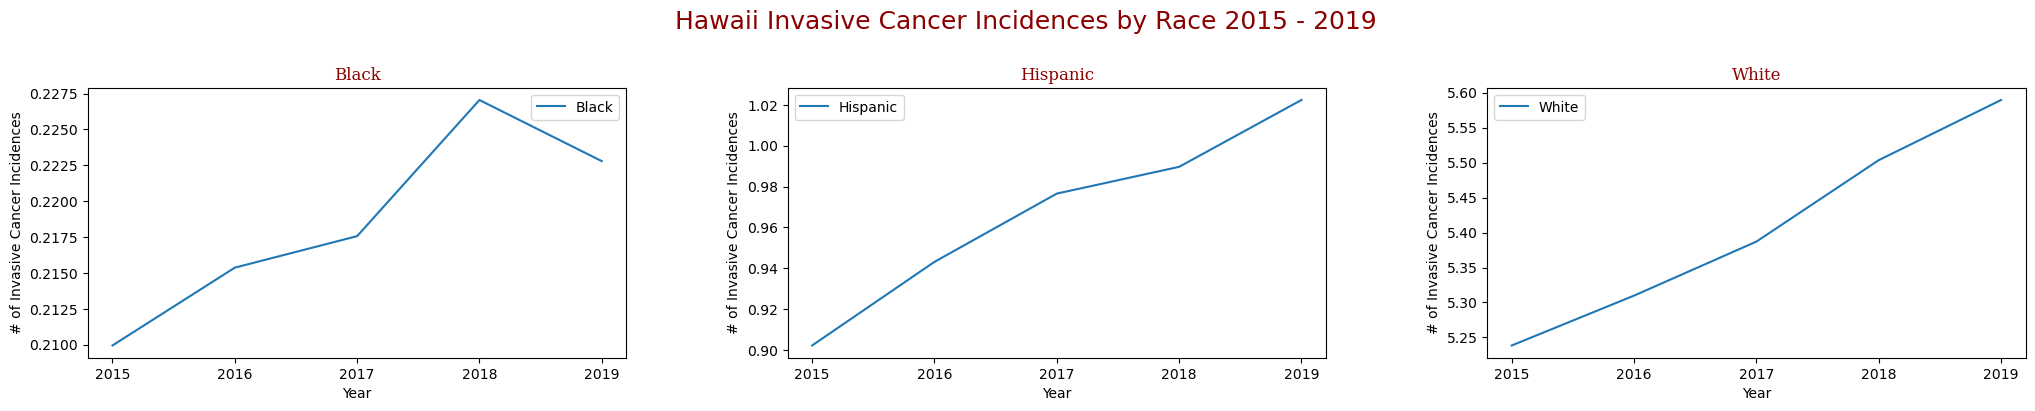

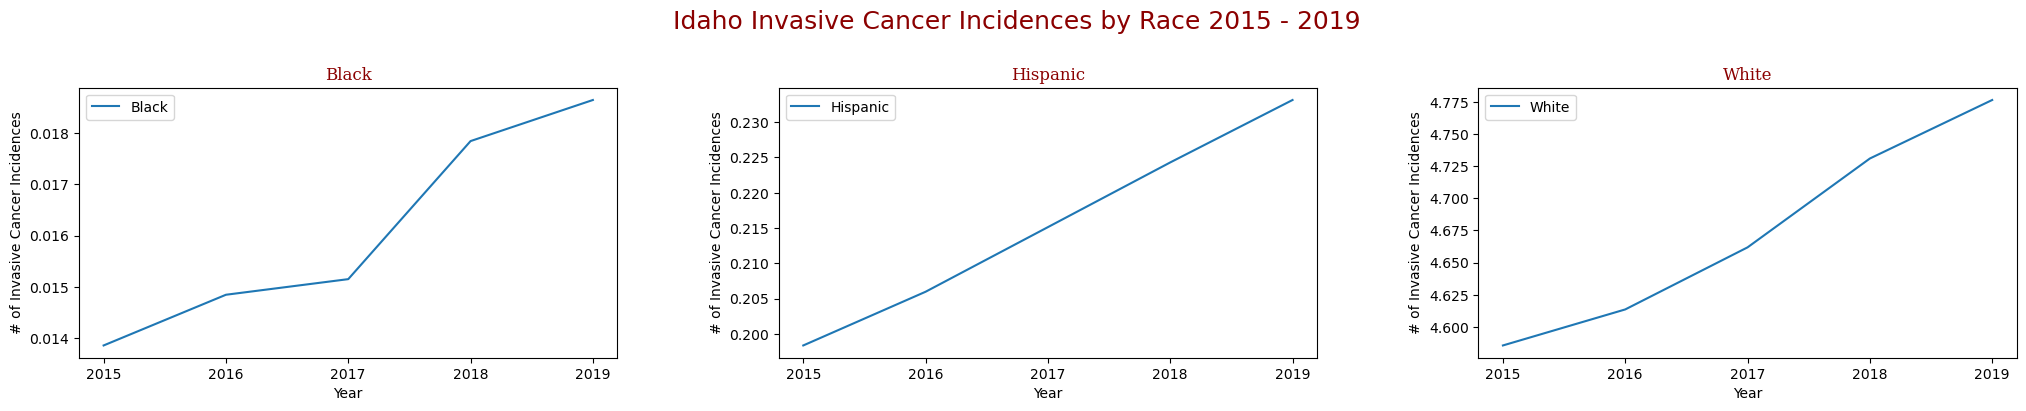

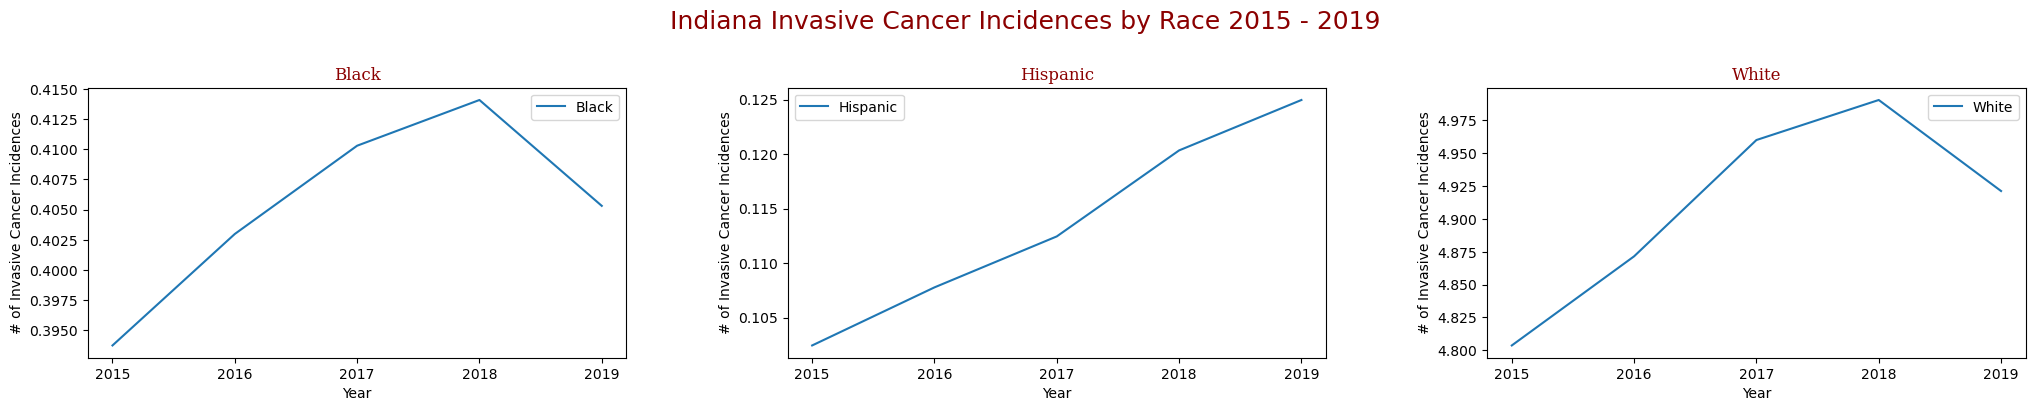

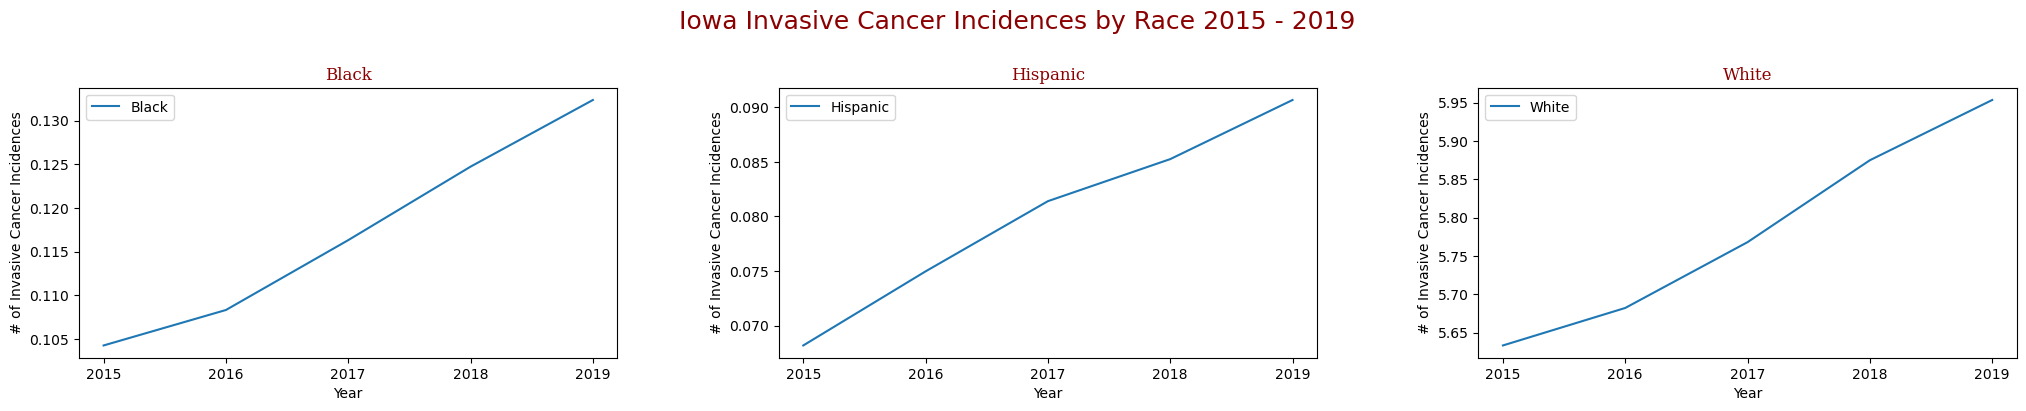

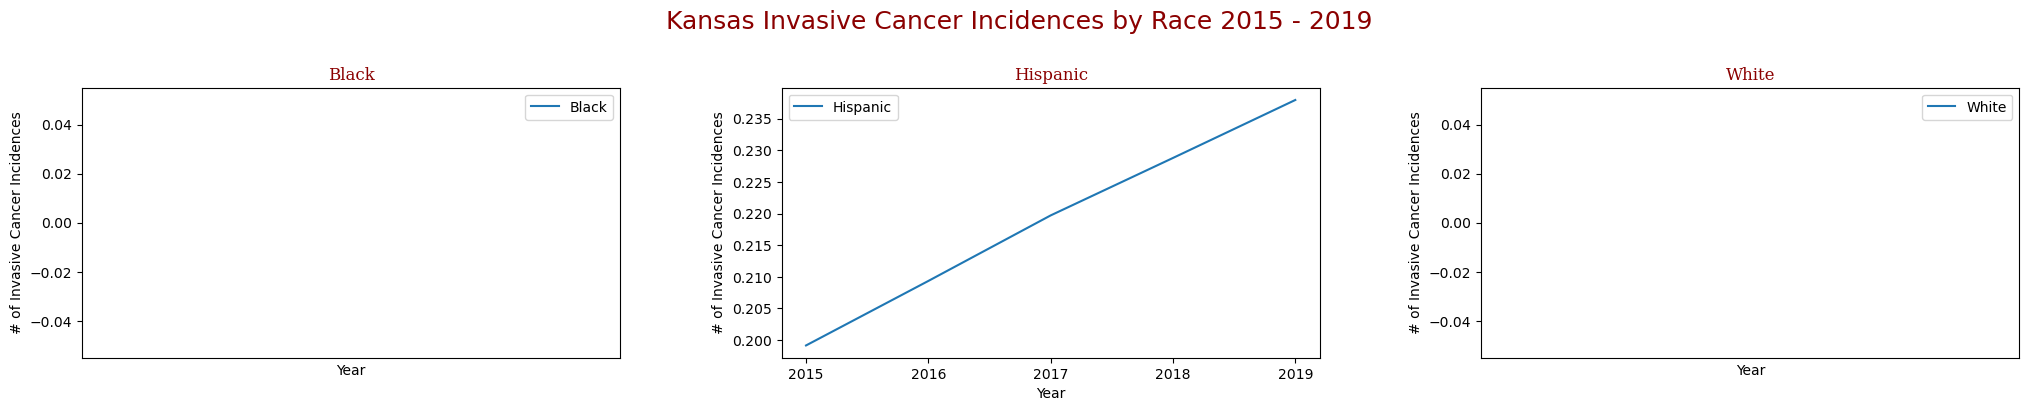

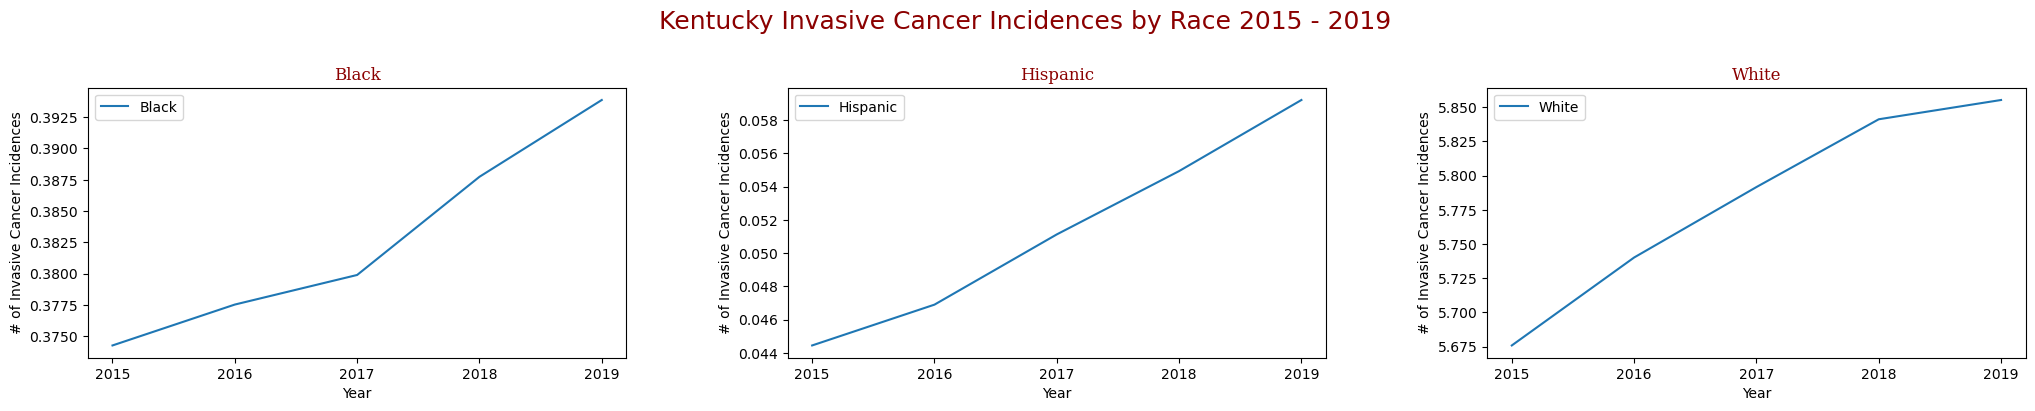

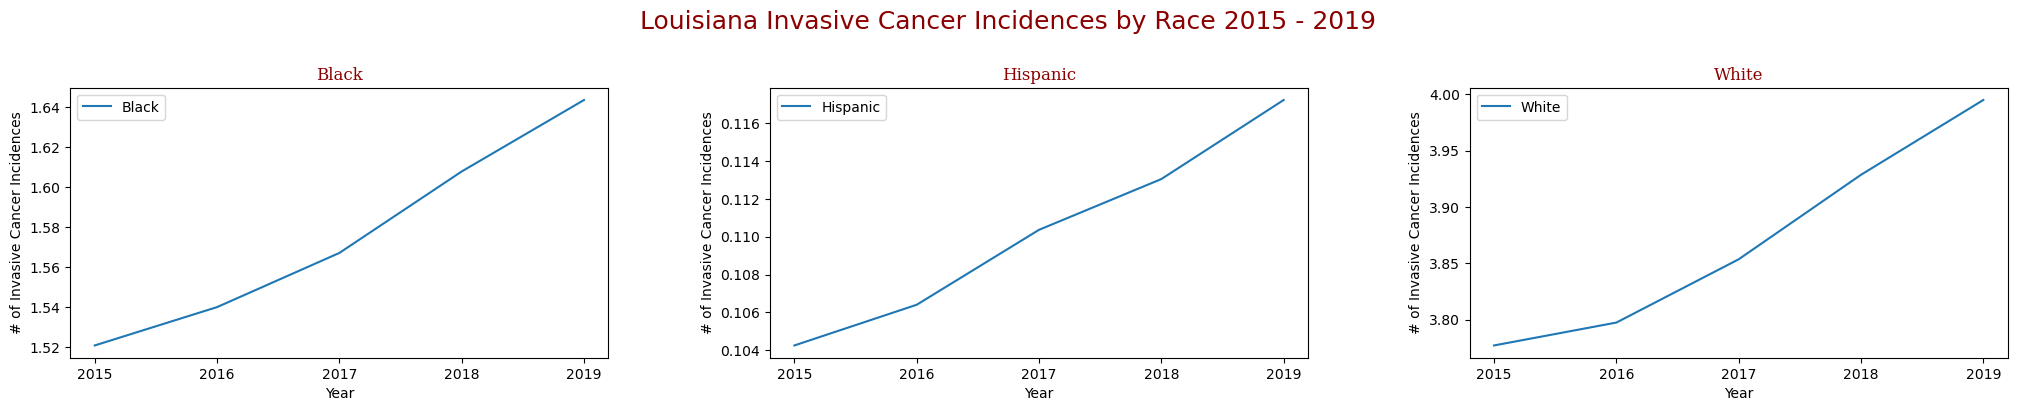

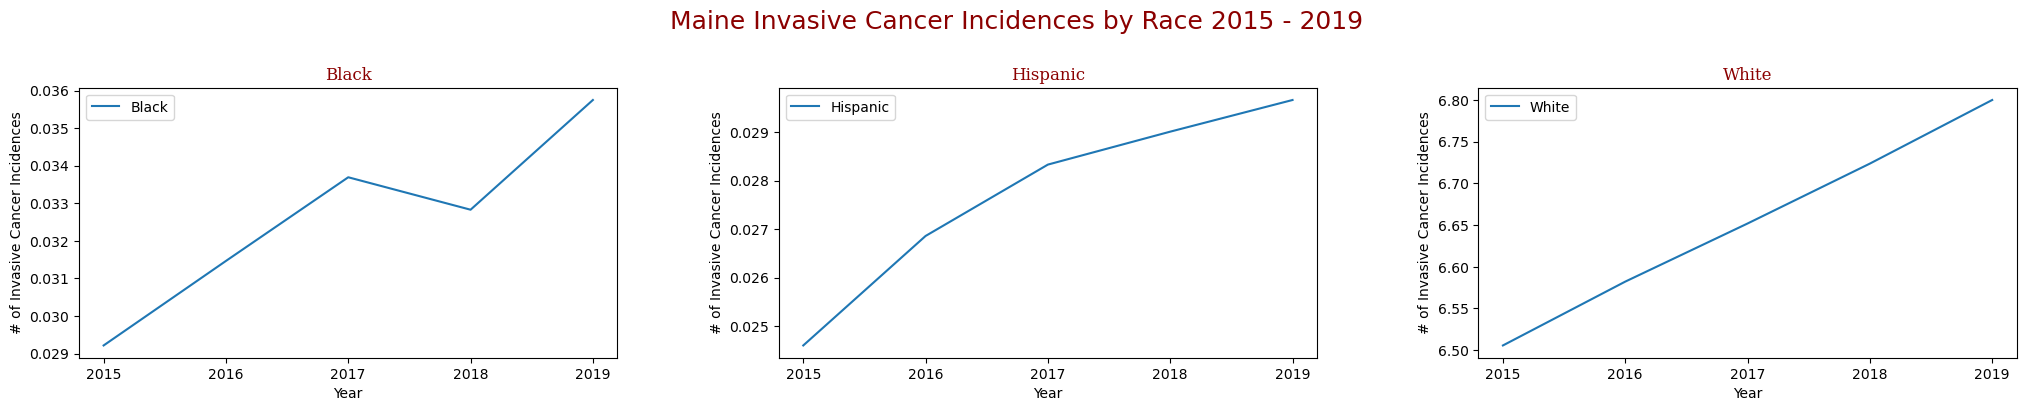

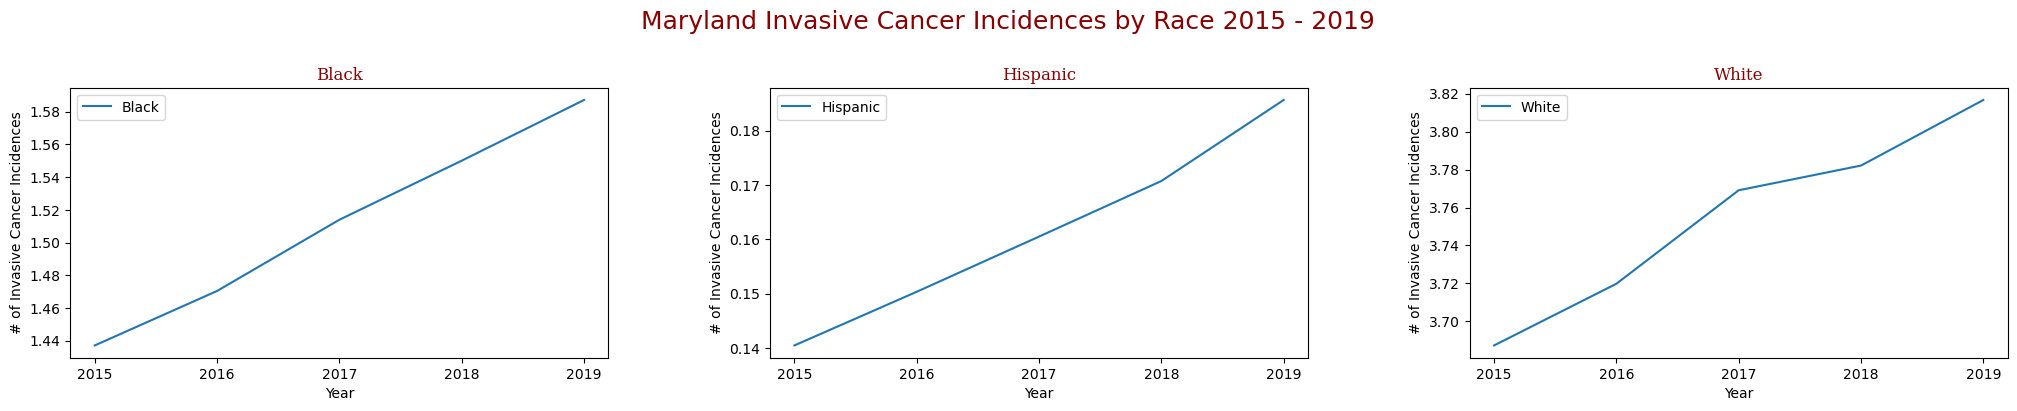

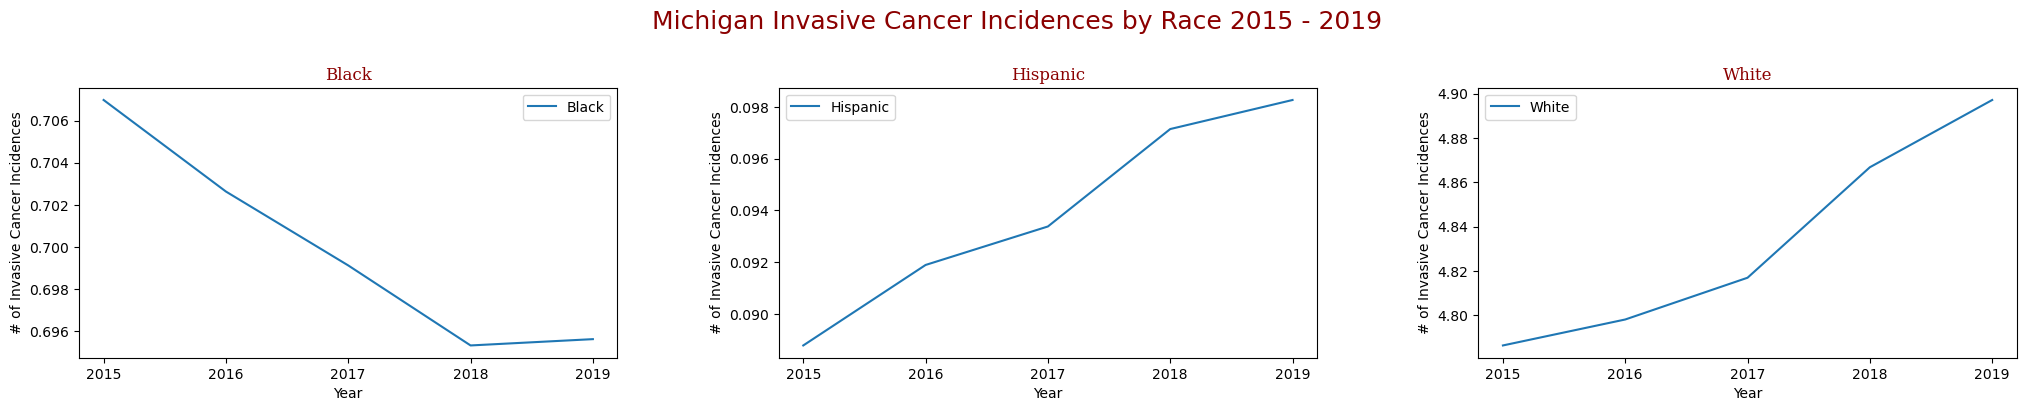

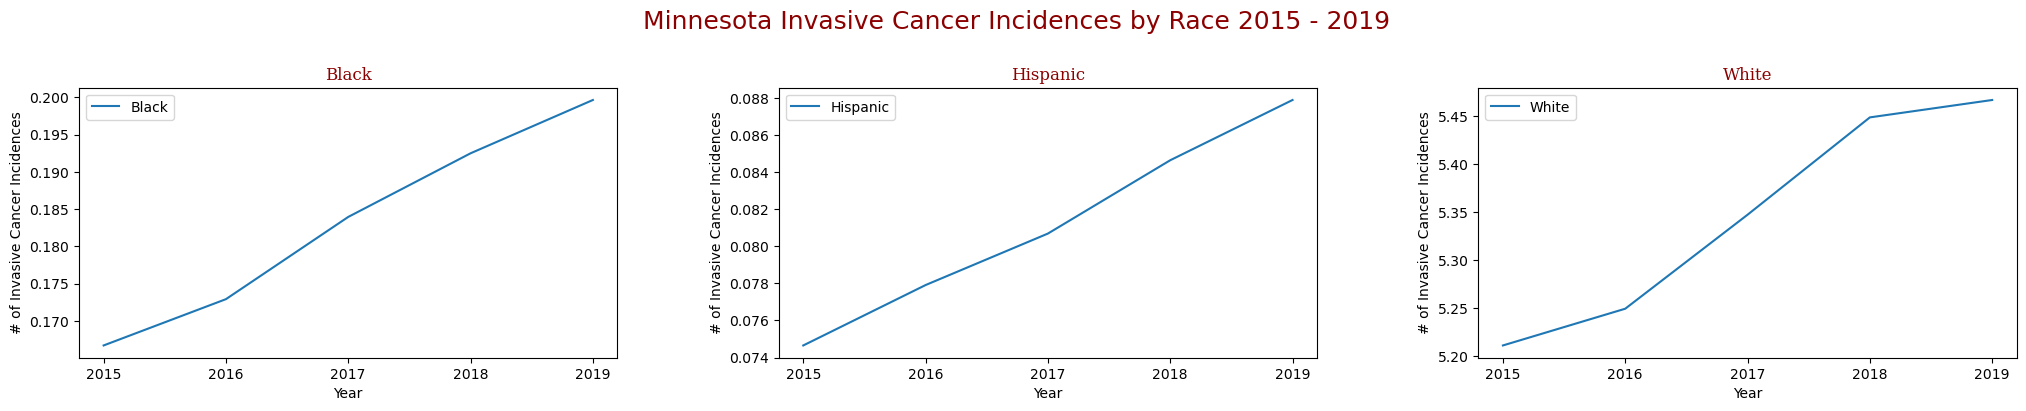

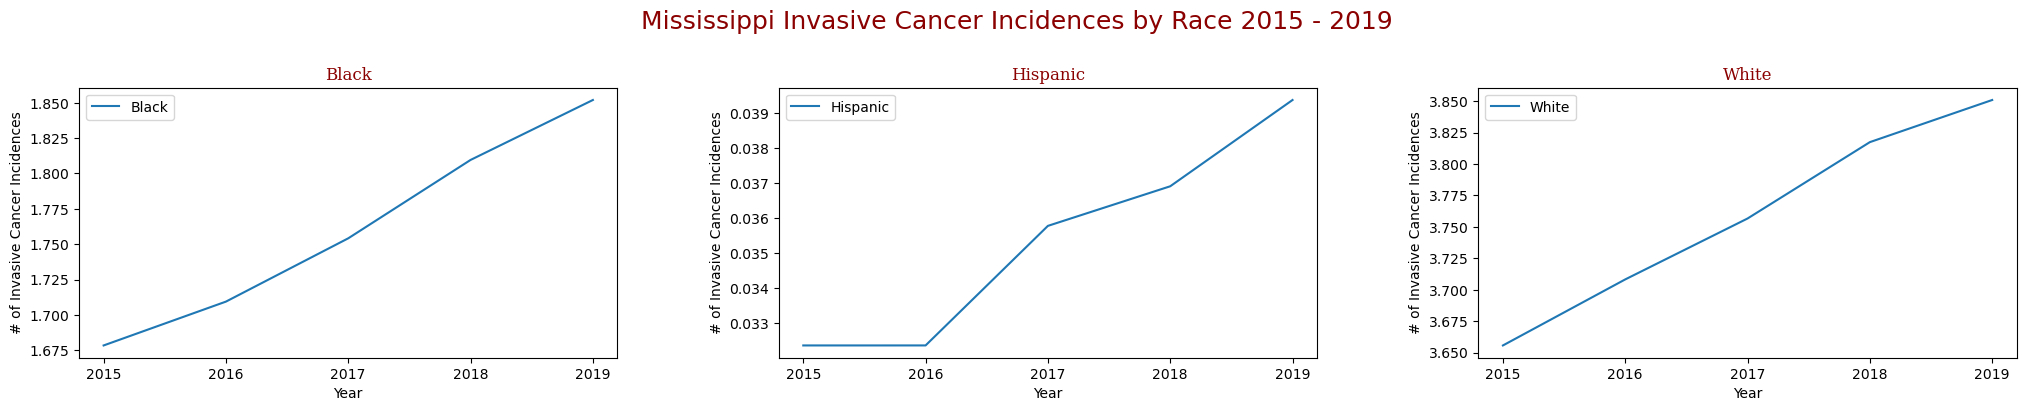

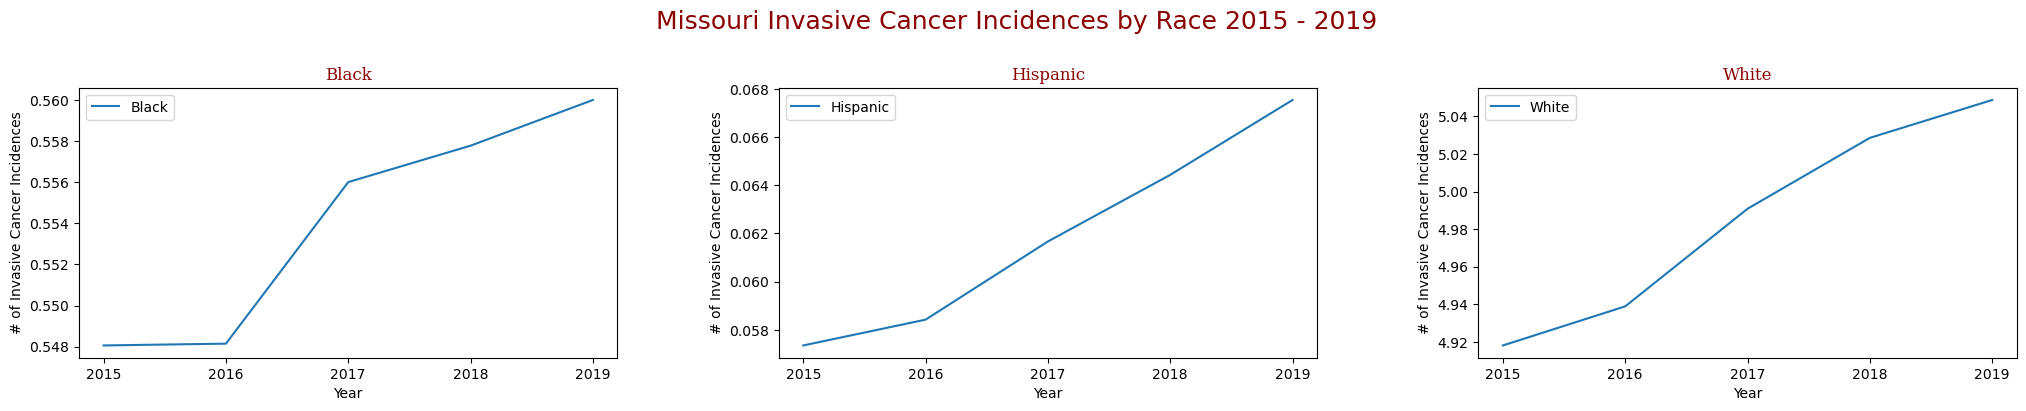

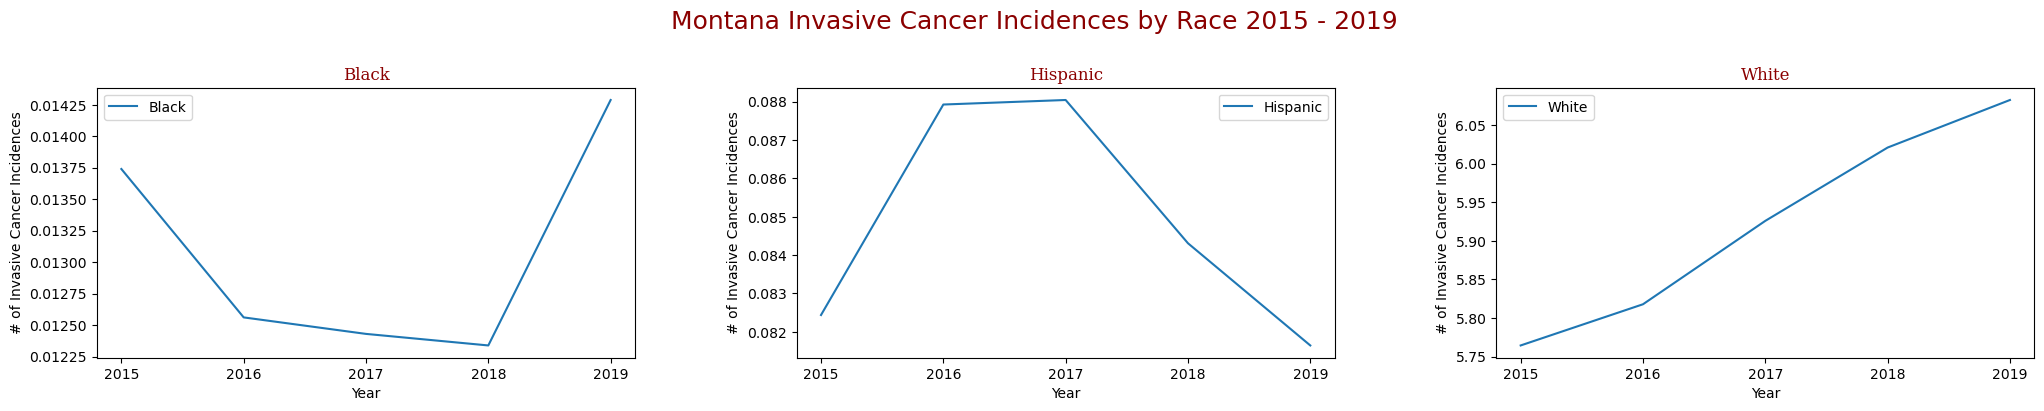

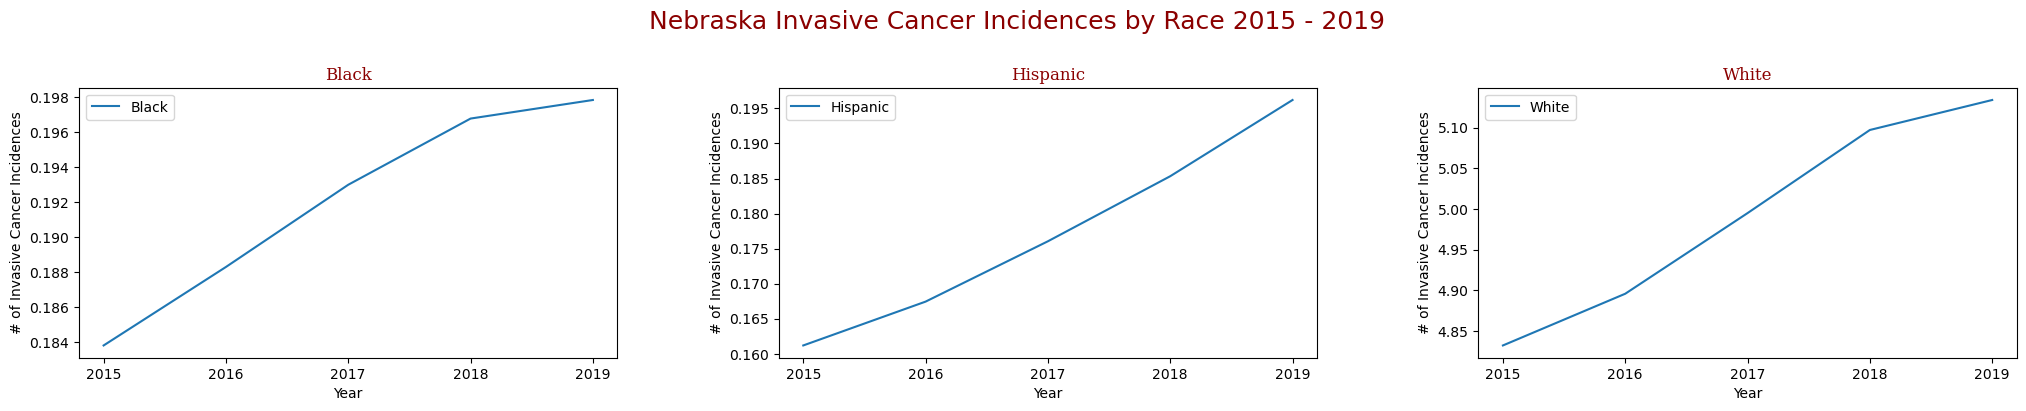

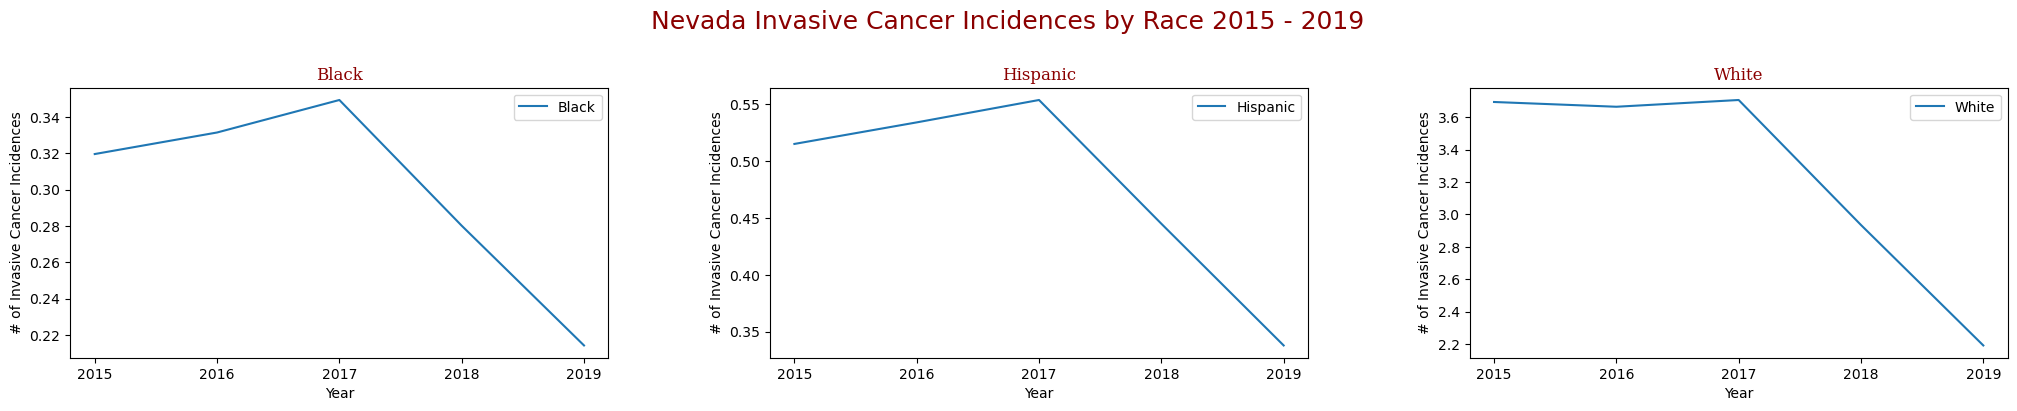

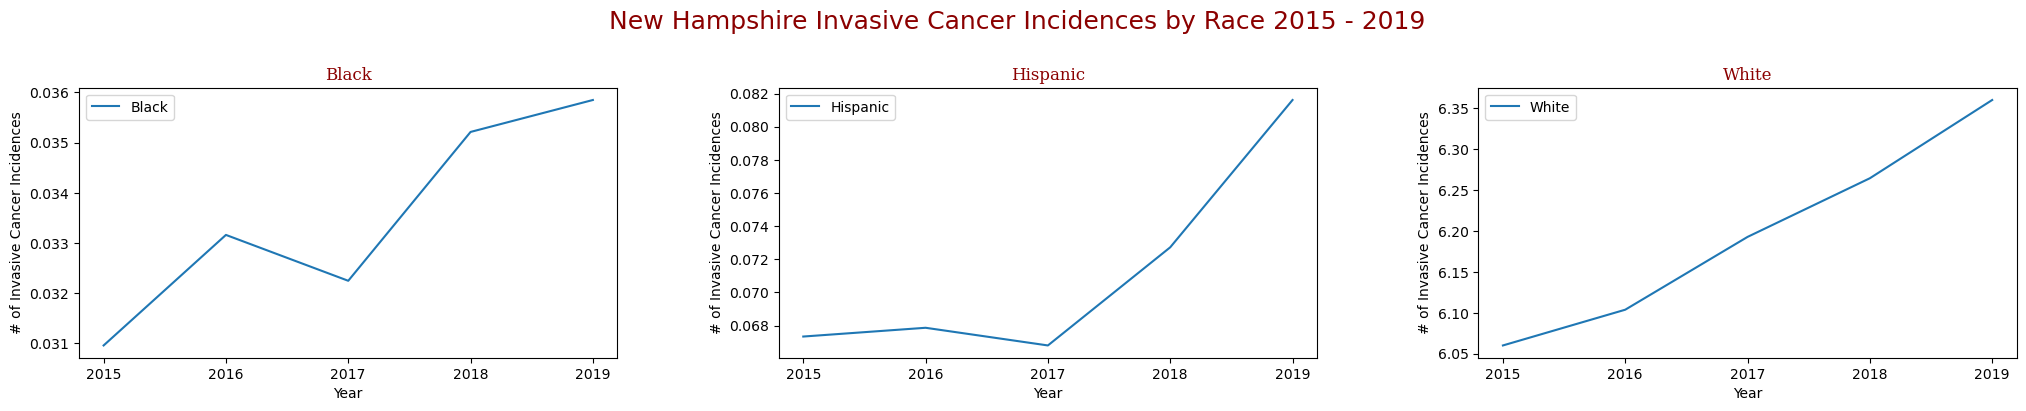

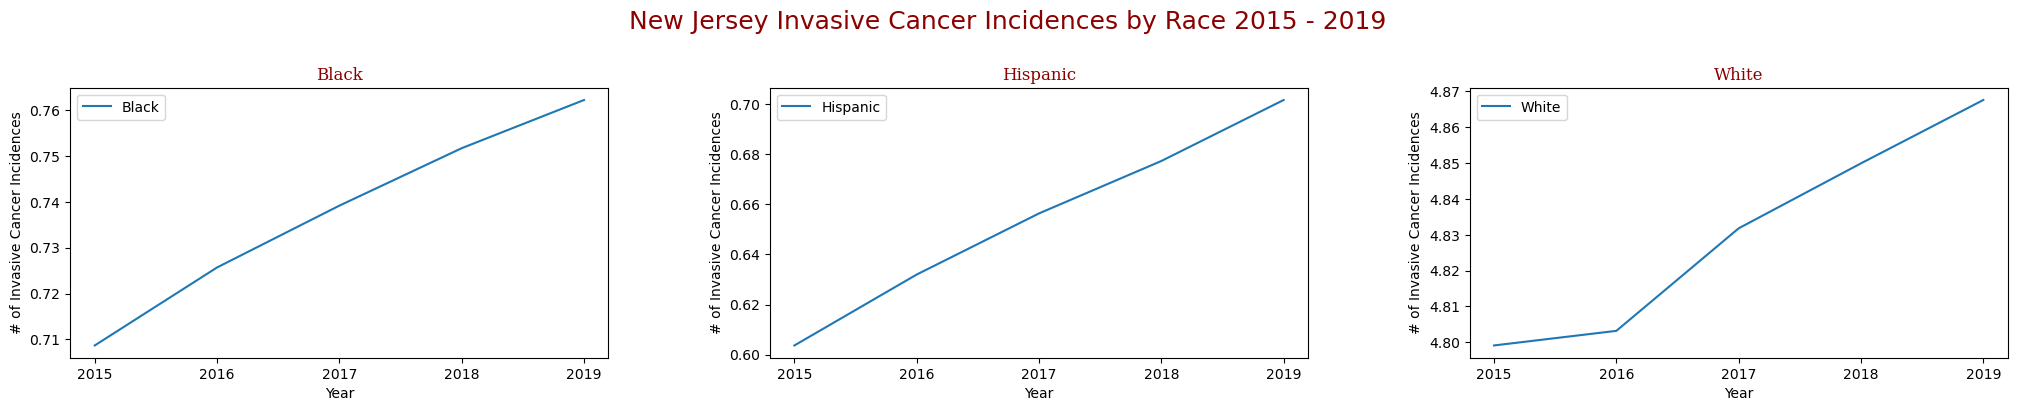

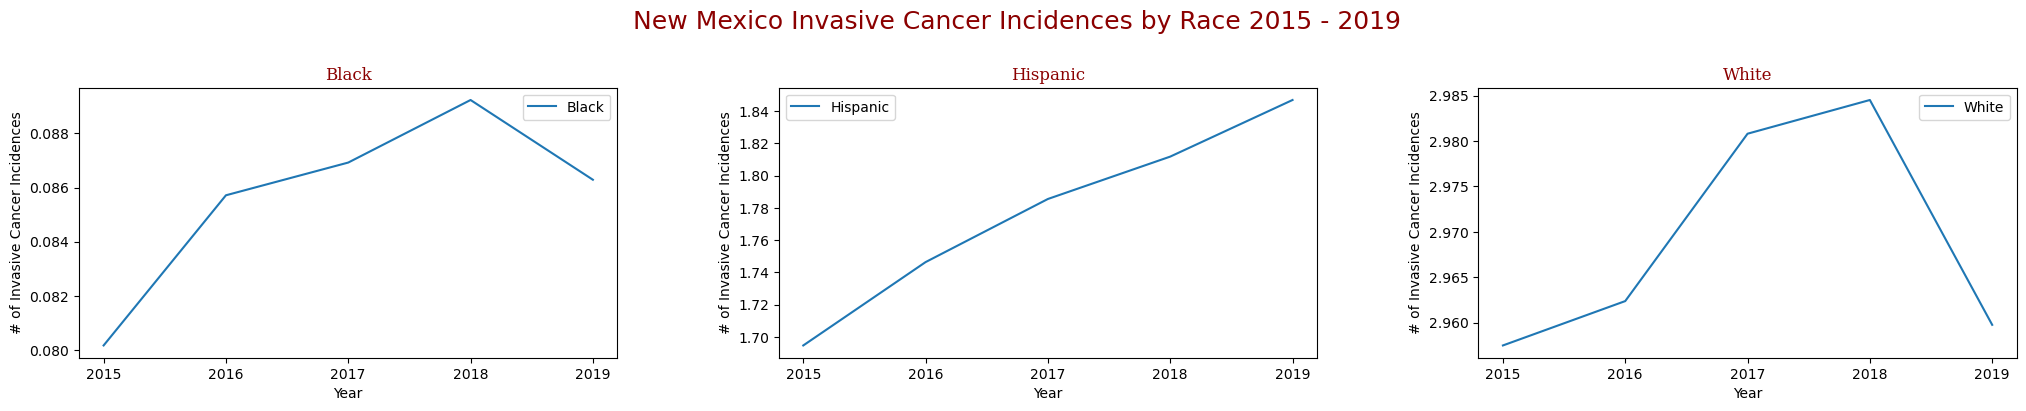

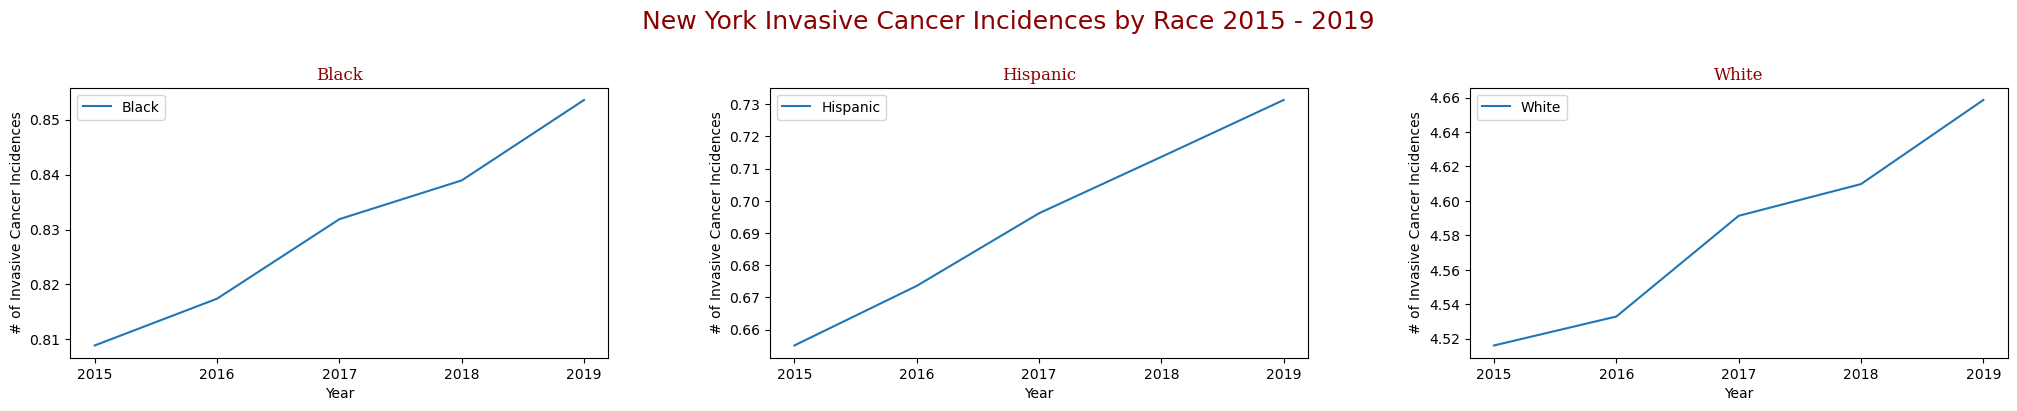

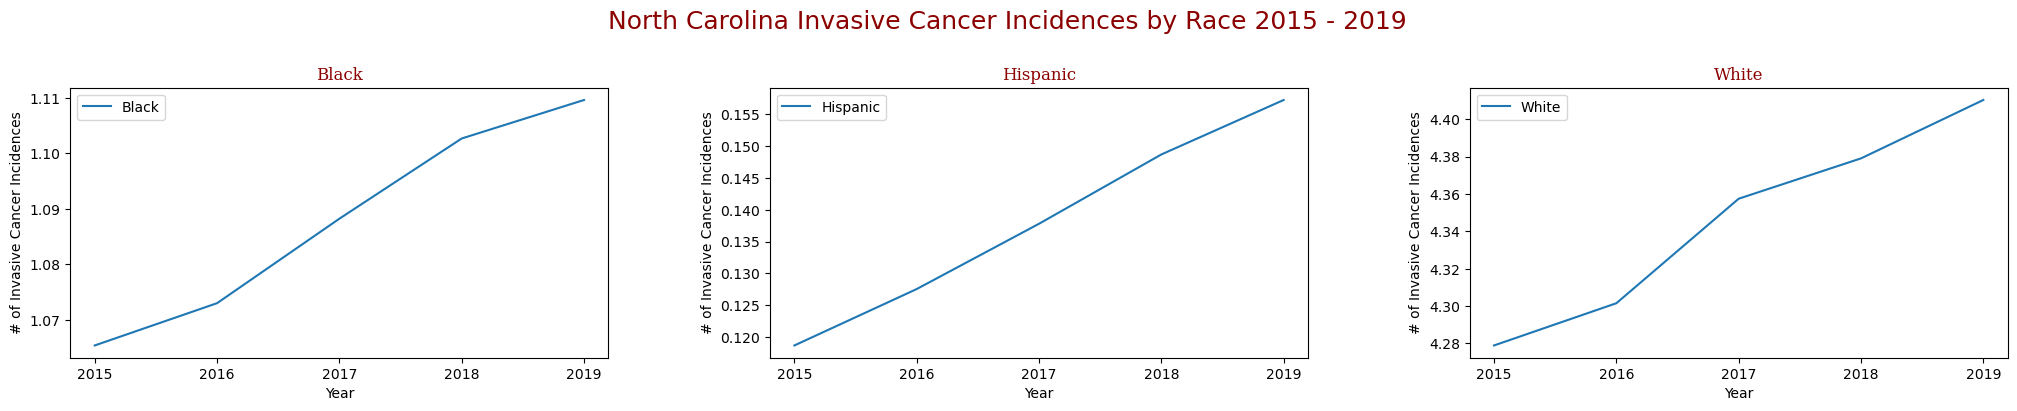

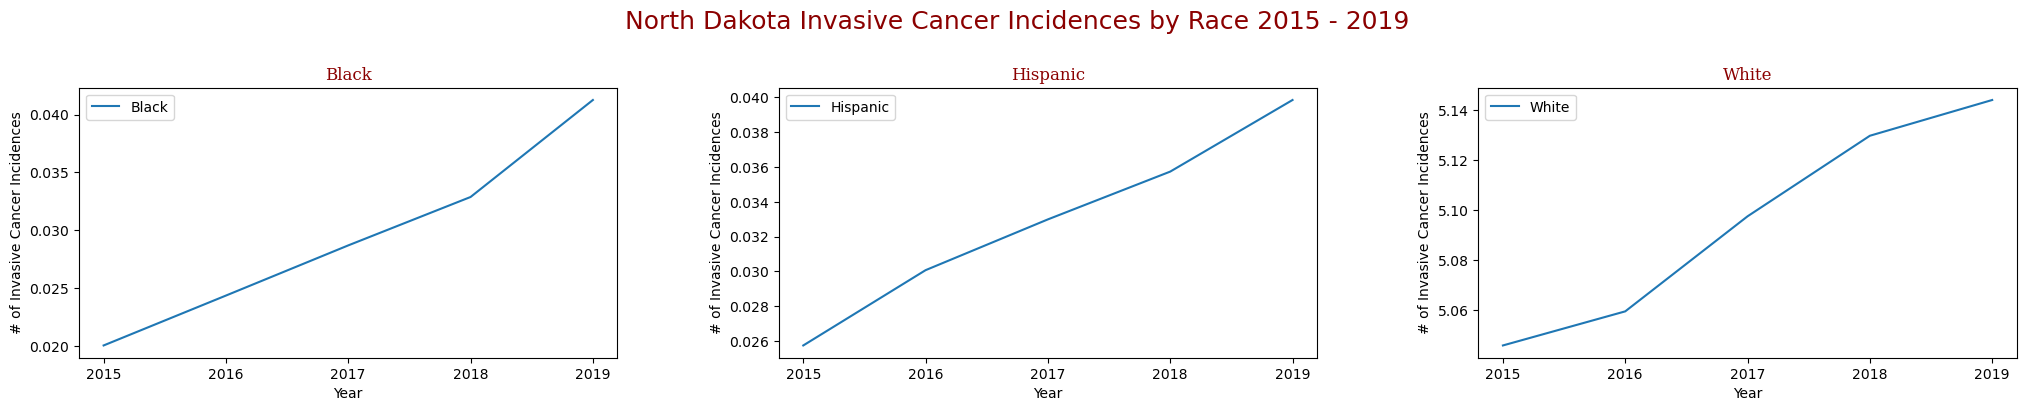

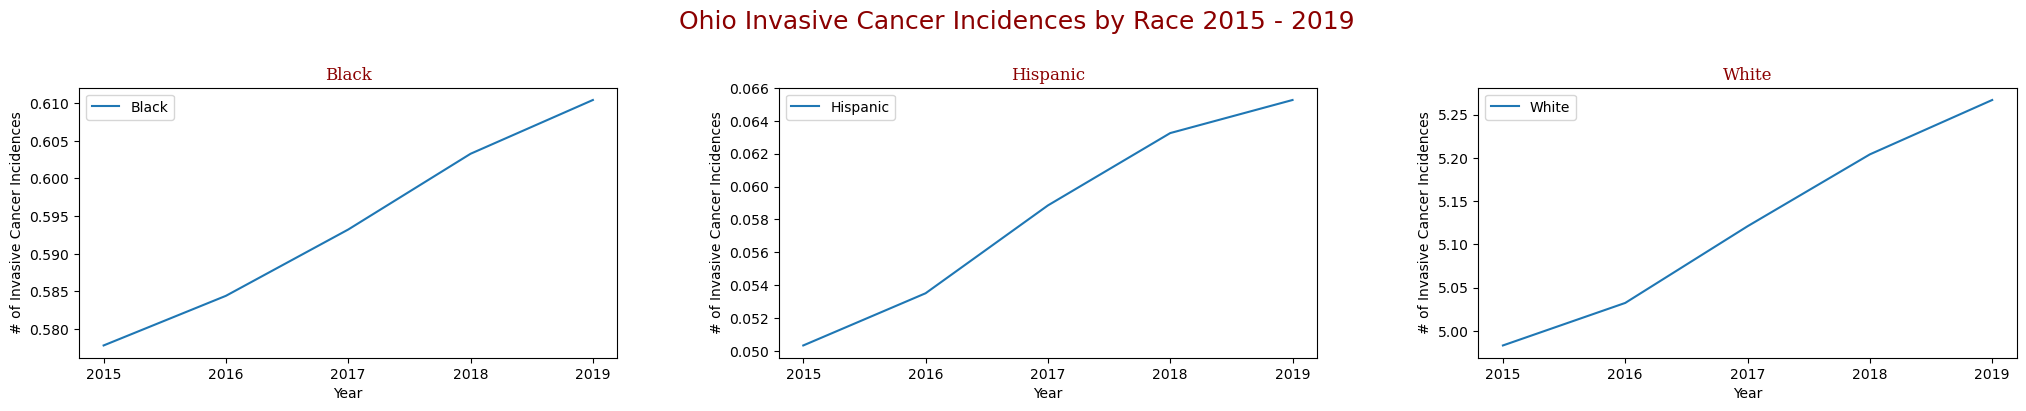

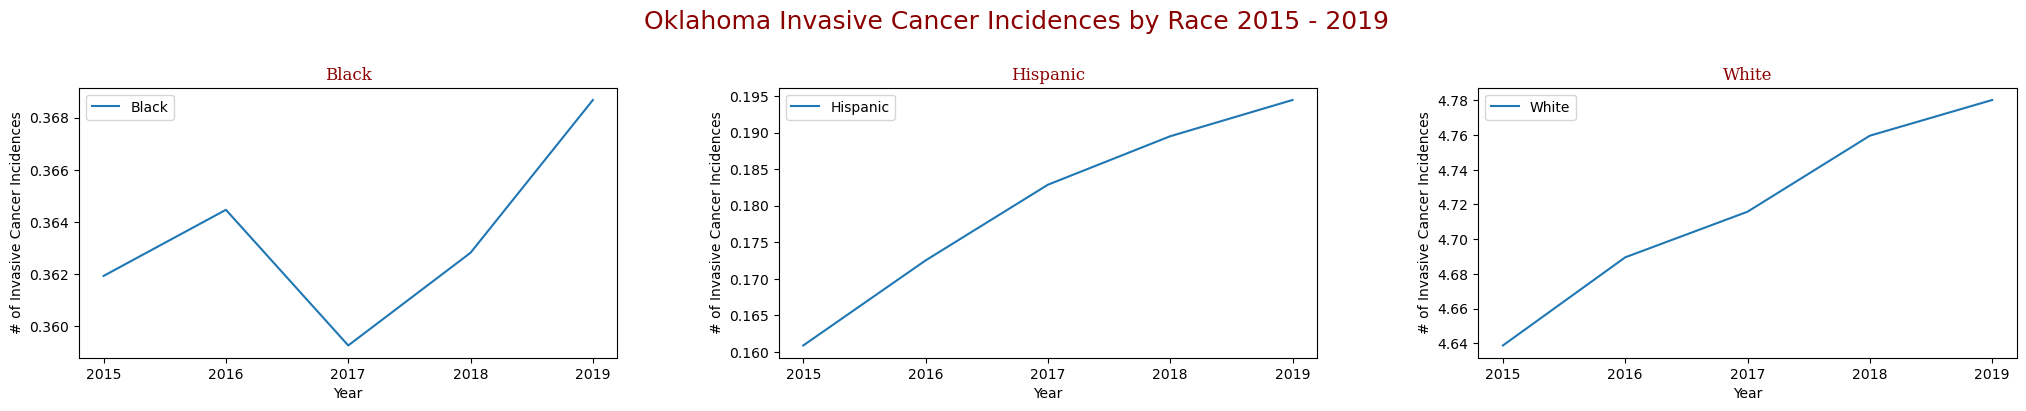

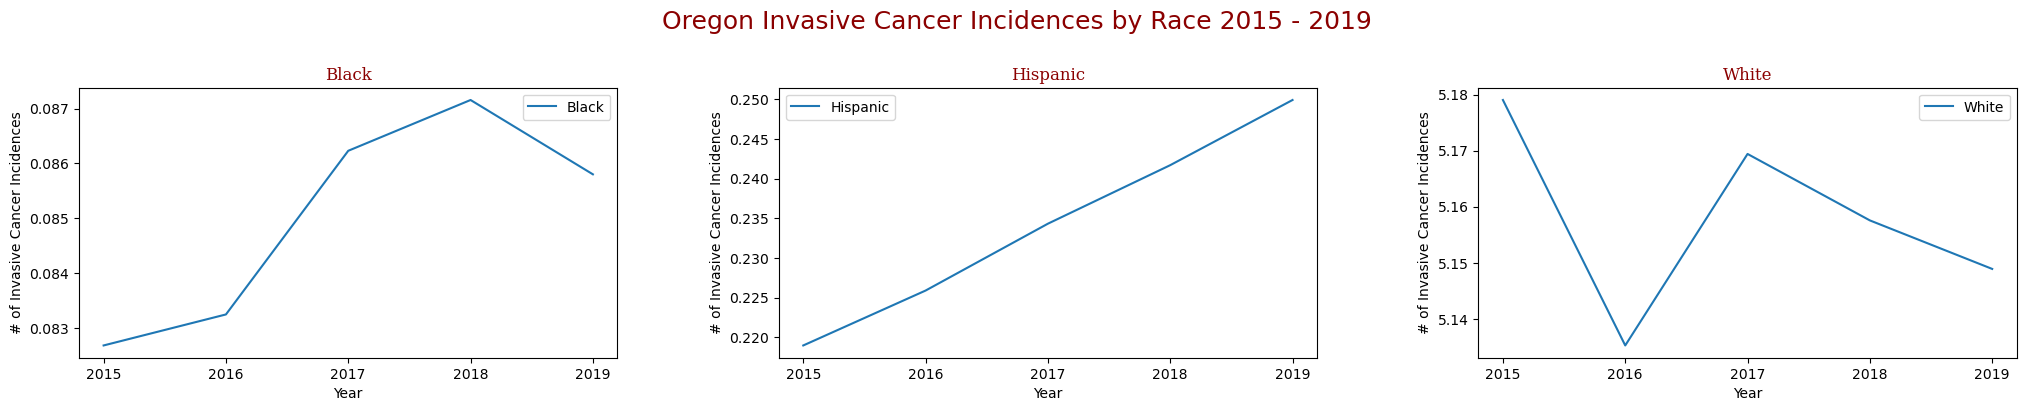

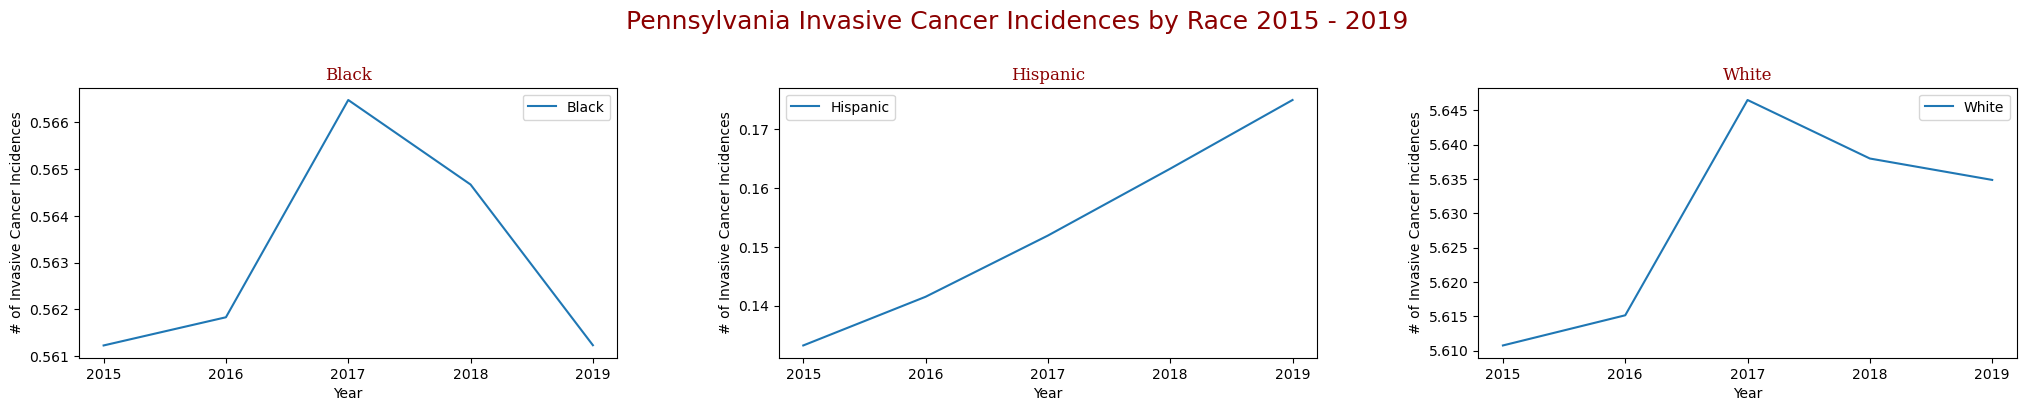

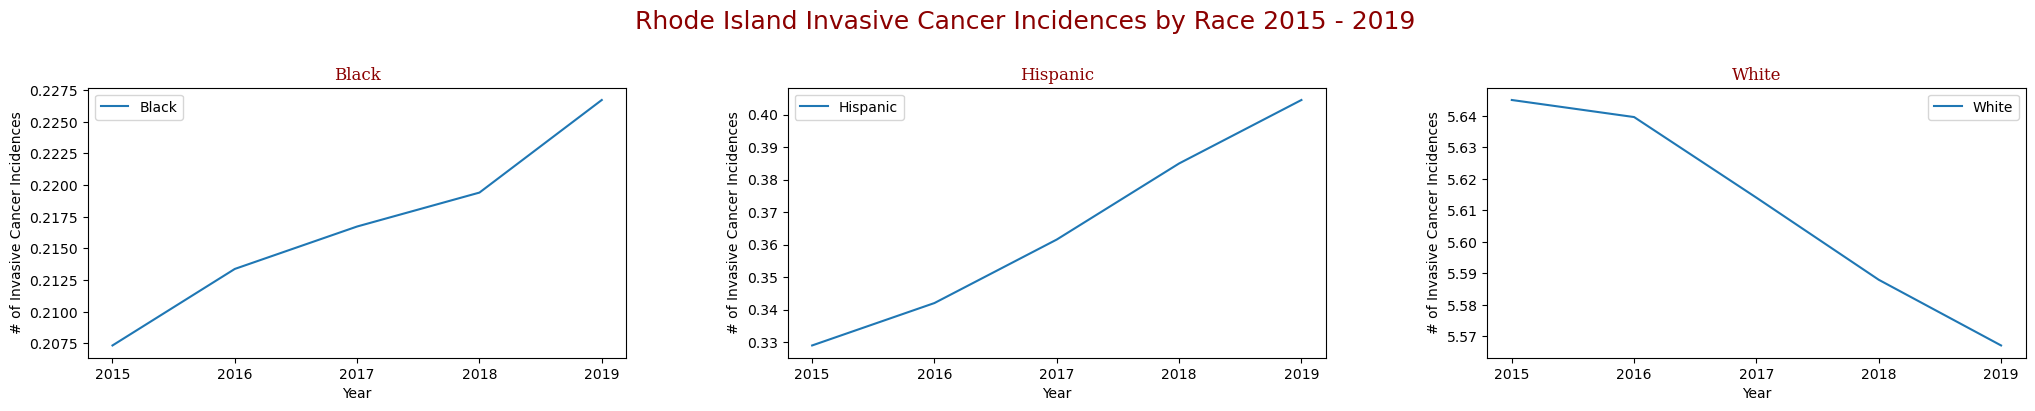

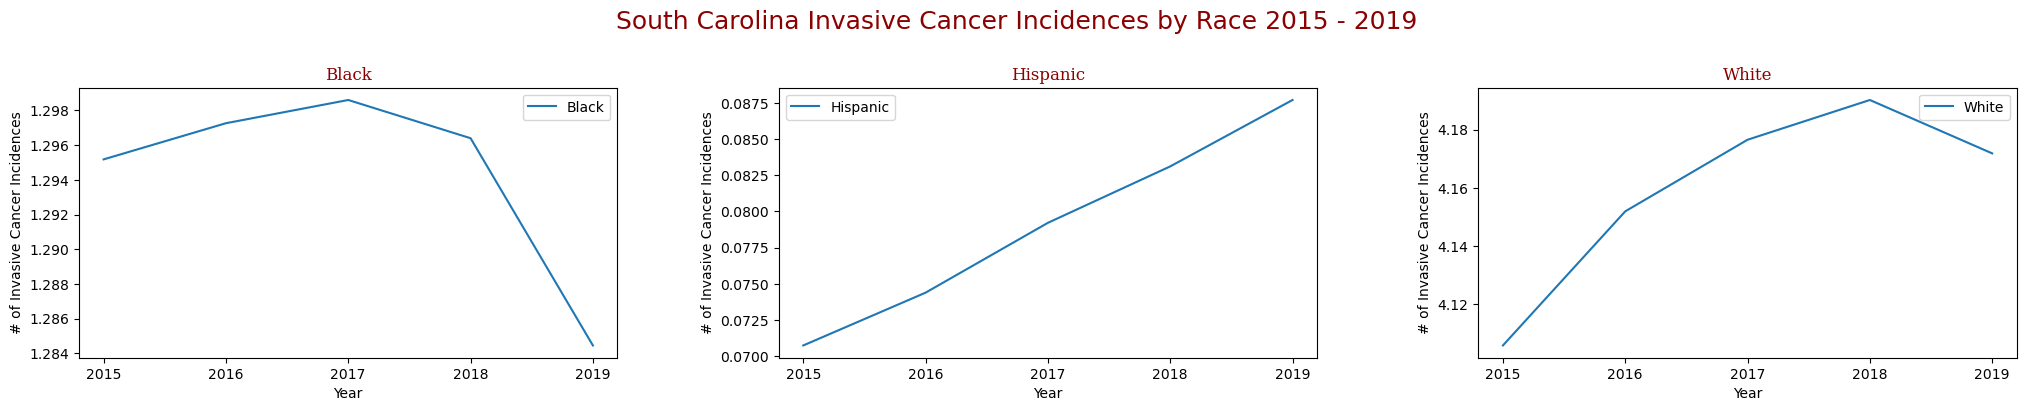

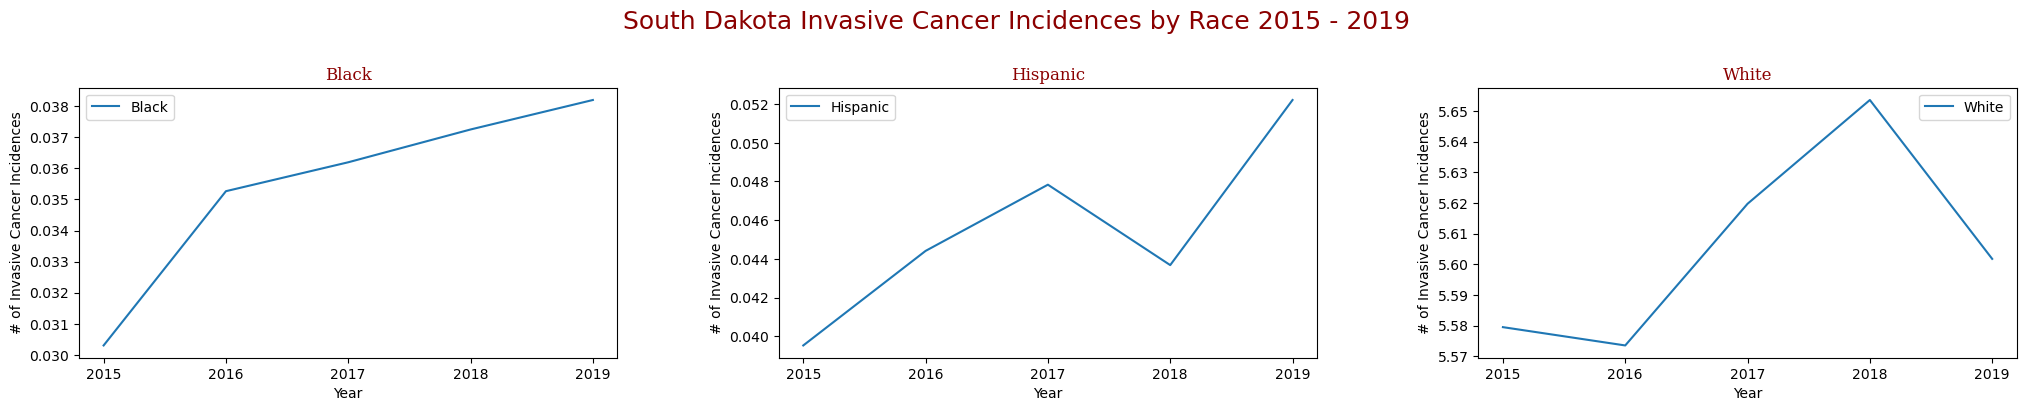

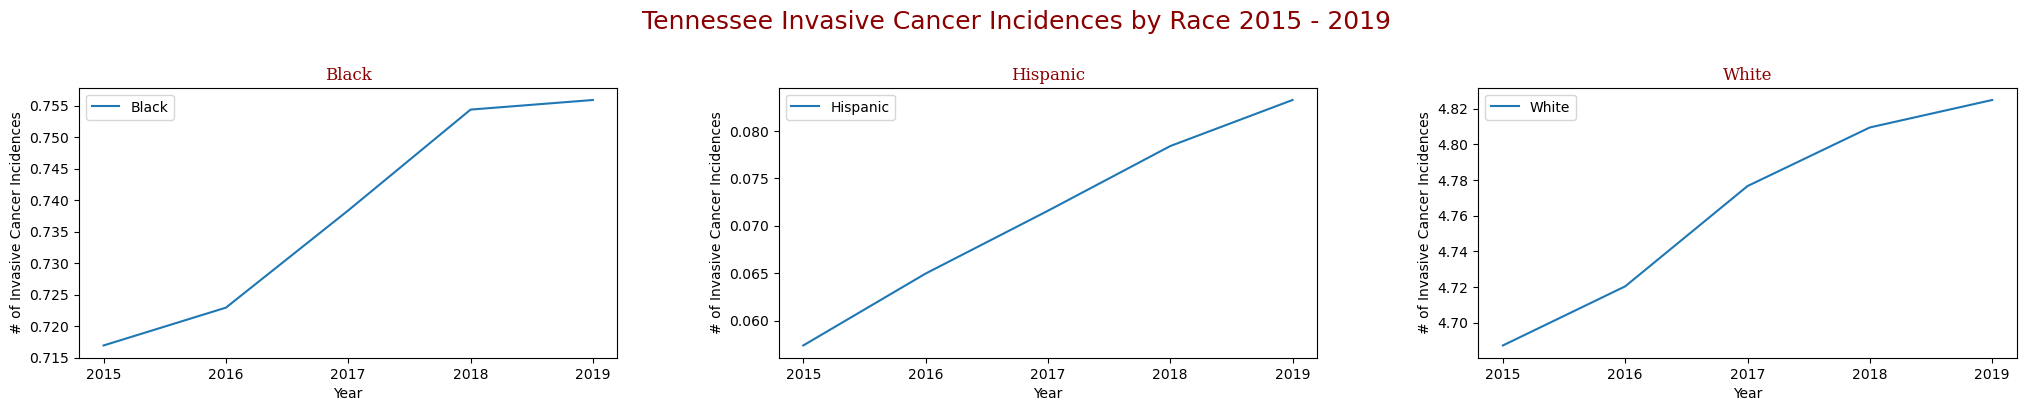

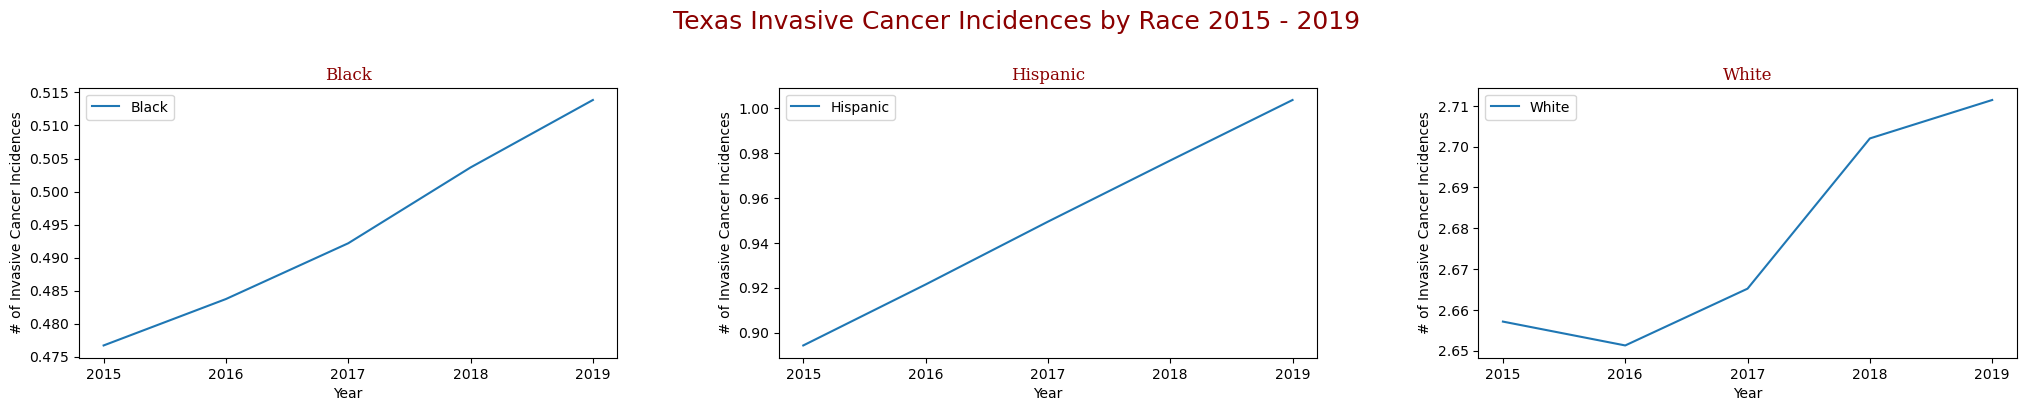

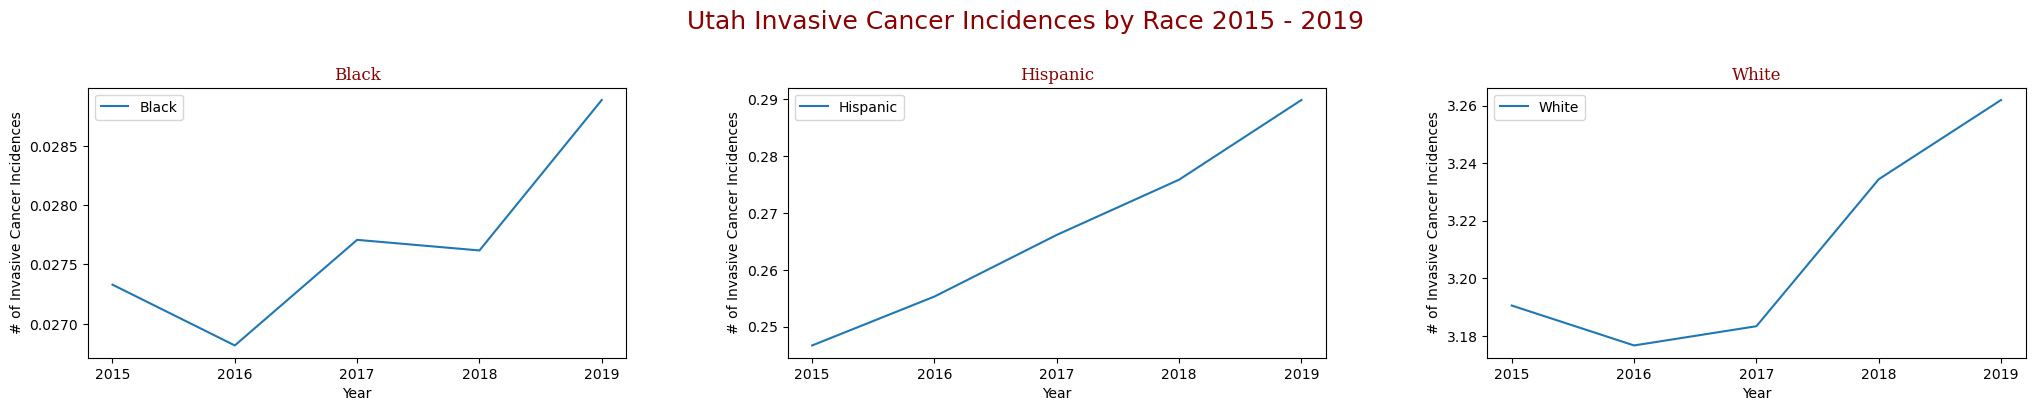

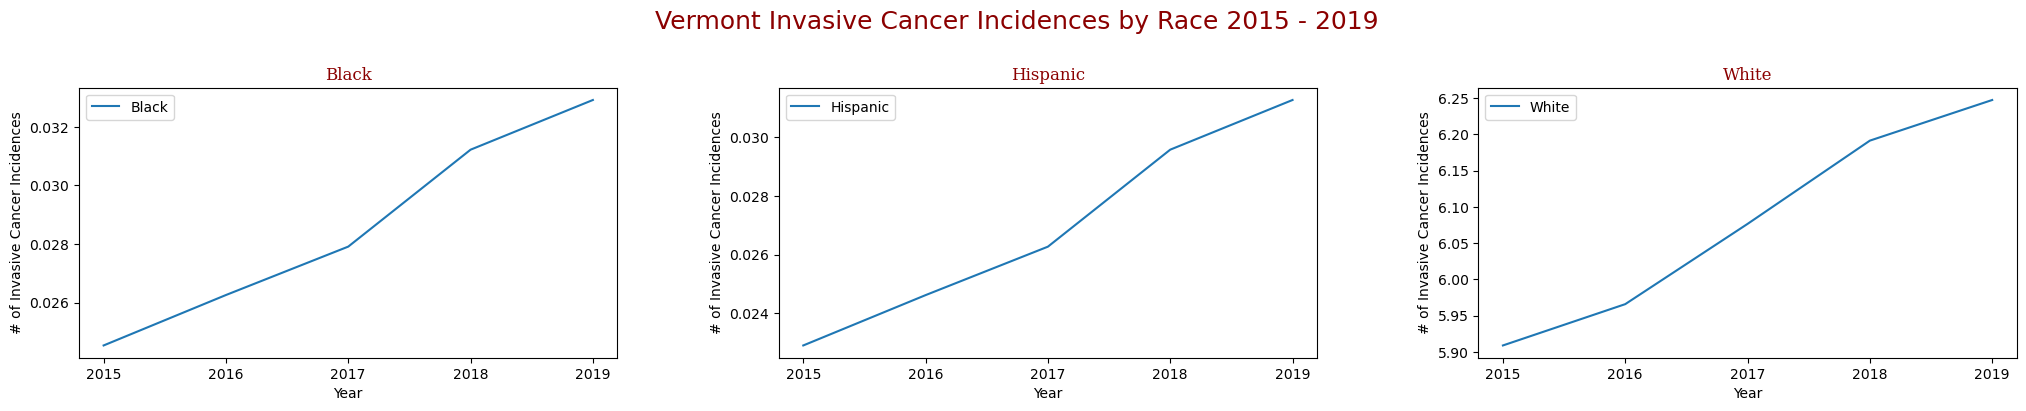

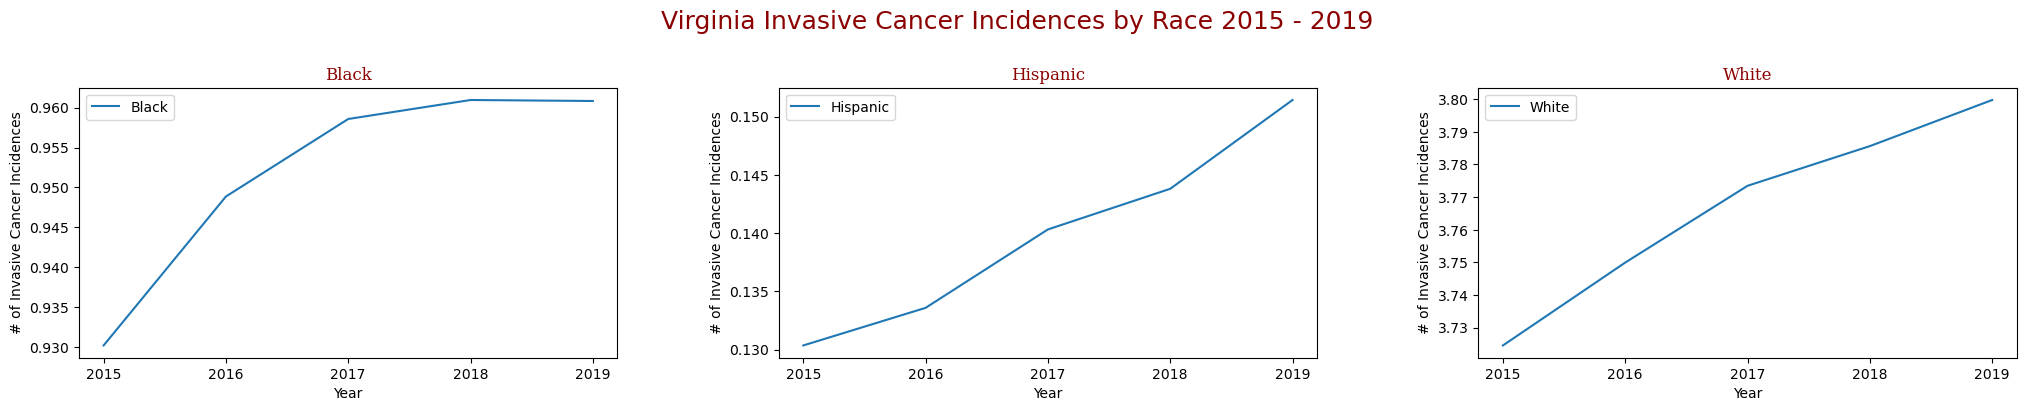

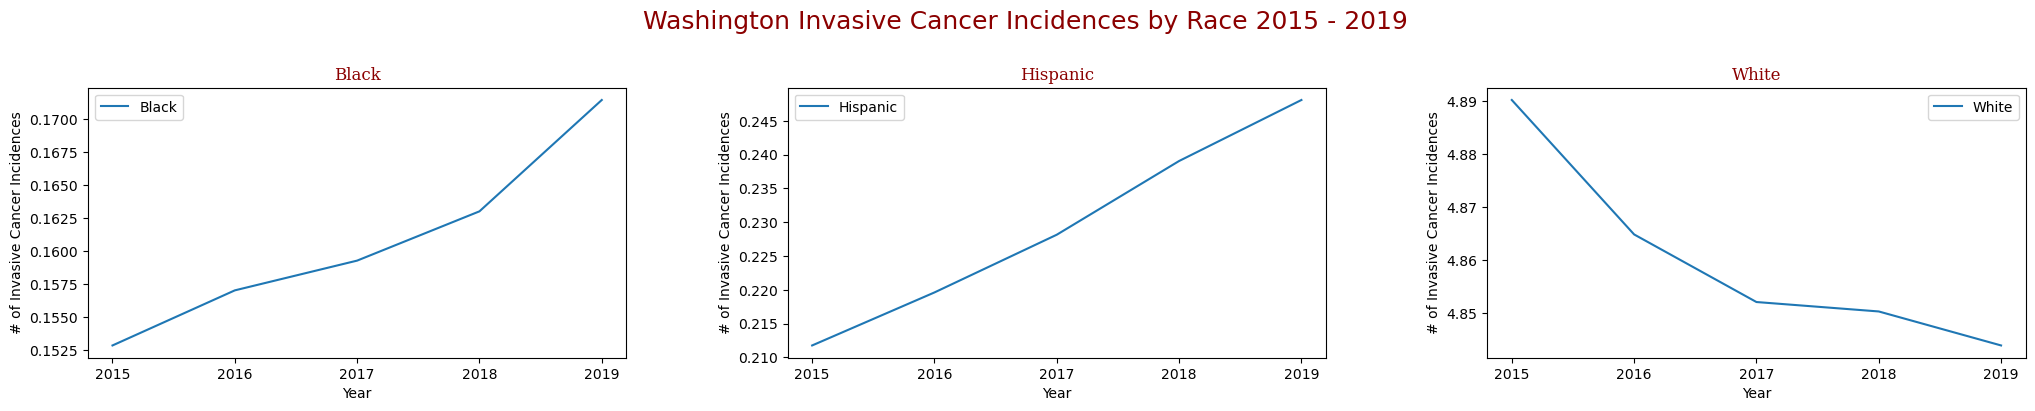

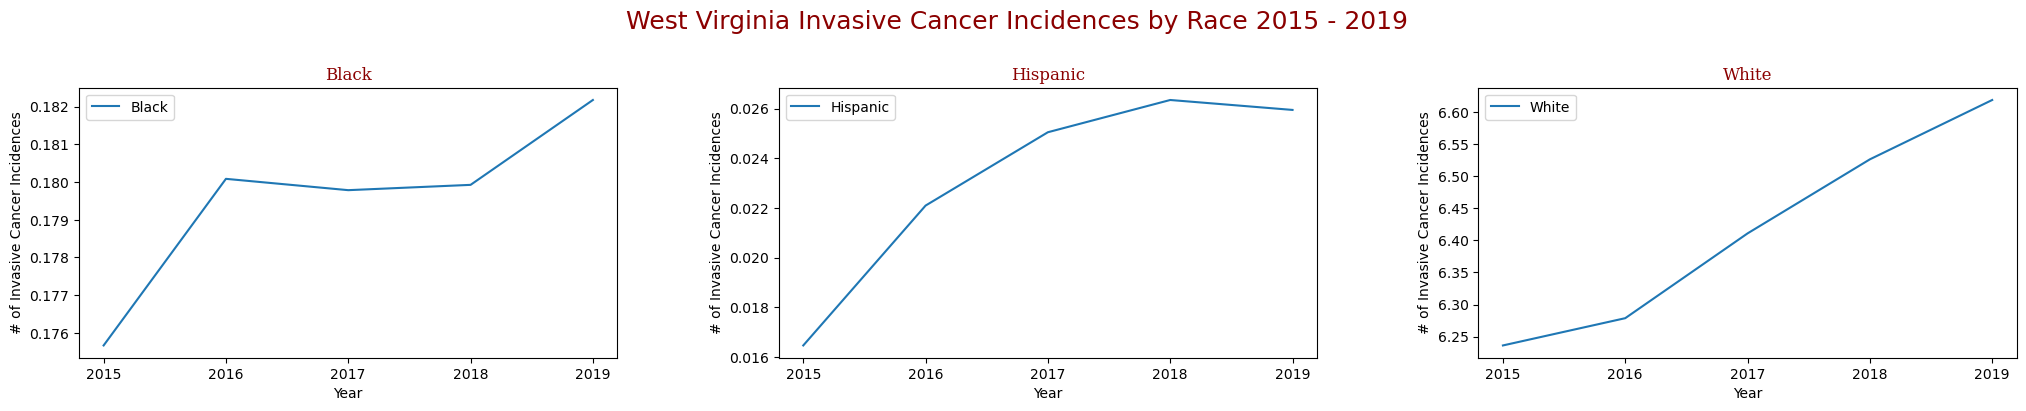

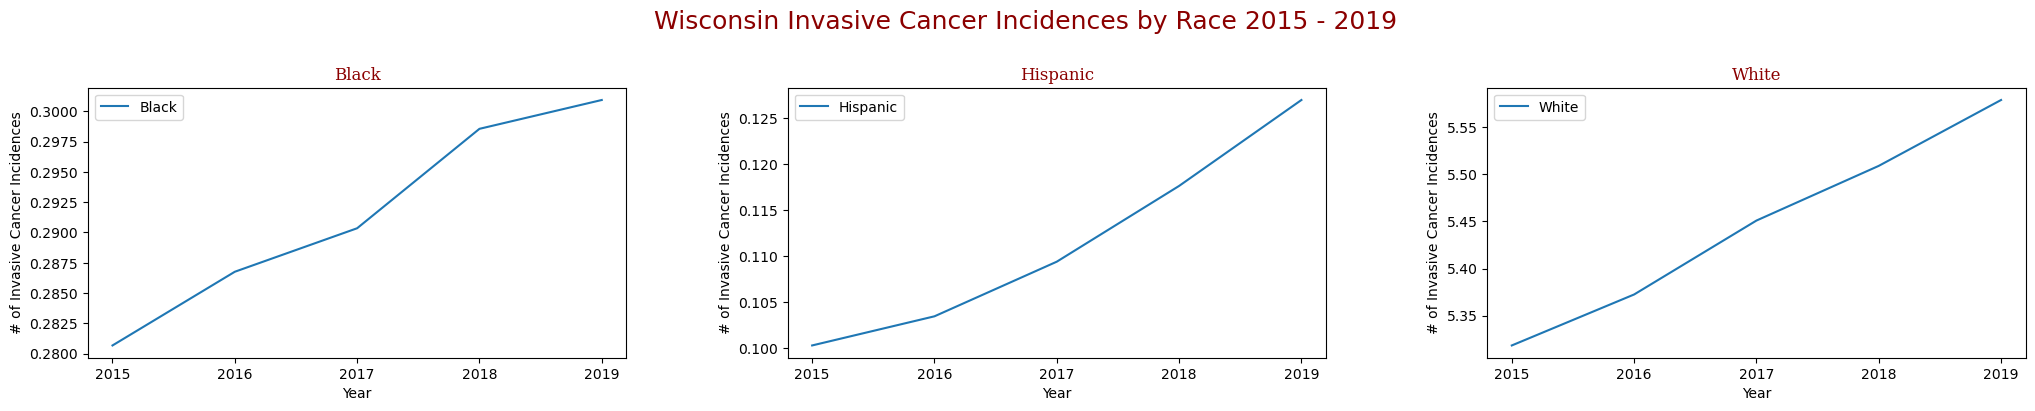

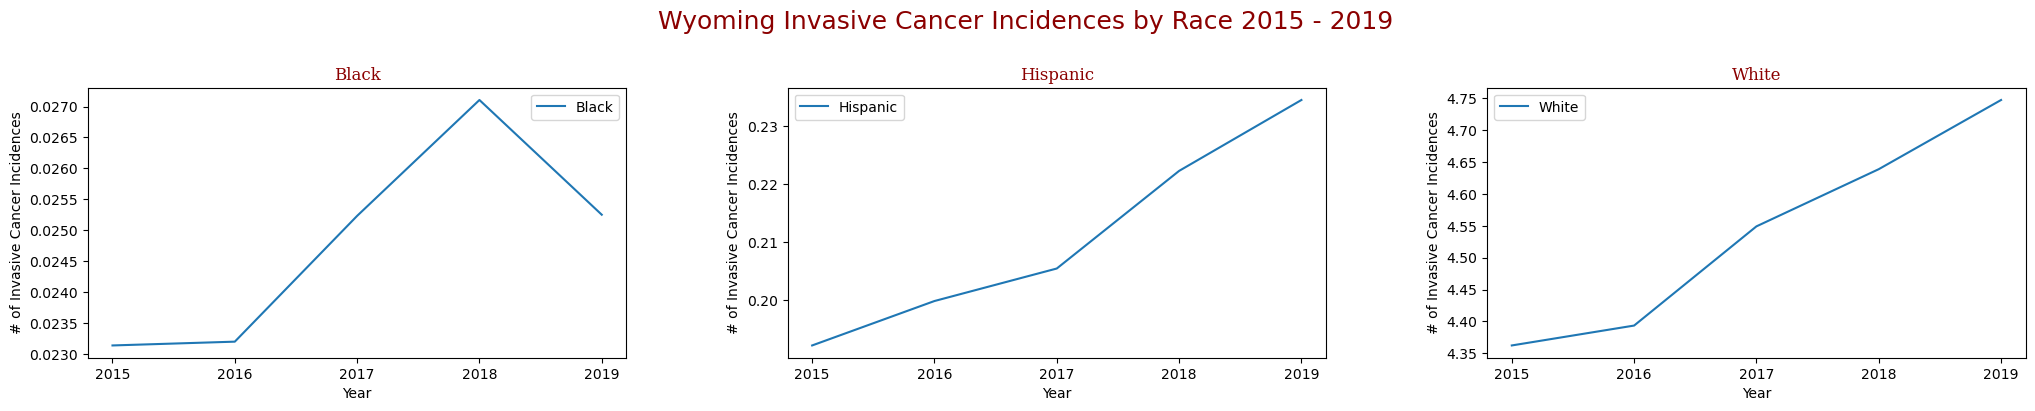

In [ ]:
font = {'family': 'serif', 'color': 'darkred', 'weight': 'normal', 'size': 12}

# for i, state in df_merge_state.iterrows():
fig = plt.figure(figsize=(25,6))
fig.subplots_adjust(wspace=.3, top=.85, bottom=.4)
fig.suptitle(f'{state[0]} Invasive Cancer Incidences by Race 2015 - 2019', fontsize=18, ha='center', color='darkred')

for n, race in df_merge_race.iterrows():
    ax = fig.add_subplot(1, 3, n + 1)
    x = df_analysis.loc[(df_analysis['Race_Clean'] == race[0]), 'Year'].values.astype(str)
    y = df_analysis.loc[(df_analysis['Race_Clean'] == race[0]), 'Insidents_per_capita'].values.astype(float)
    ax.plot(x, y, label=race[0])
    ax.set_xlabel('Year')
    ax.set_ylabel('# of Invasive Cancer Incidences')
    ax.legend()
    ax.set_title(f'{race[0]}', fontdict=font)
    # fig.tight_layout()
    

In [ ]:
output = df_pop

In [ ]:
bob = [{'A': '~'}, {'B': 'iu'}]
dave = pd.DataFrame(bob)

In [ ]:
dave.loc[dave['A'] == '~']

A    B
0  ~  NaN

In [ ]:
filename = 'C:/C_Drive/Bootcamp/ProjectData/output-%s.xlsx' % get_dt()
with pd.ExcelWriter(filename) as writer:
    output.to_excel(writer, sheet_name='data')

In [ ]:
filename = 'C:/C_Drive/Bootcamp/ProjectData/output.xlsx'
with pd.ExcelWriter(filename) as writer:
    output.to_excel(writer, sheet_name='data').astype